# EDA Contents 

## 'Placeholder'

# WIP

## Imports

### Main

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import chess
import io
import sys
# import chess.pgn
from io import StringIO

import plotly.express as px
import plotly.graph_objects as go

import joblib
from tempfile import mkdtemp
import re

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from tempfile import mkdtemp
from sklearn.pipeline import Pipeline
# from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix,\
                            make_scorer, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


from stockfish import Stockfish

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
# plt.style.use('seaborn')

---

### Helpers

In [4]:
# import sys
# sys.modules.pop('detecting_cheaters_in_chess_helpers')

In [5]:
import detecting_cheaters_in_chess_helpers as hp

['Event', 'Site', 'Date', 'Round', 'White', 'Black', 'Result',
       'BlackClock', 'BlackElo', 'BlackIsComp', 'BlackRD', 'ECO',
       'FICSGamesDBGameNo', 'PlyCount', 'Time', 'TimeControl', 'WhiteClock',
       'WhiteElo', 'WhiteRD', 'emt', 'moves', 'WhiteIsComp', 'NoComp']

-----

## DFs, Pickles, Checks

### Many pickles (or json)

#### 2022

In [ ]:
# raw_2022_list = [pd.read_json(
#     f'C:/Users/MaNiL/Desktop/data/capstone/raw/json/2022/ficsgamesdb_20220{num-17}_CvH_movetimes_2648{num}.json') for num in \
#                 range(18, 27)]

In [ ]:
# raw_2022_list[0].head(1)

In [ ]:
# raw_2022 = pd.concat(raw_2022_list).reset_index(drop=True)
# raw_2022.shape

In [ ]:
# # pickle 2022
# joblib.dump(raw_2022, 'C:/Users/MaNiL/Desktop/data/capstone/preprocessed/2022_CvH.pkl')

#### 2021 and 2020

In [ ]:
# raw_2021 = joblib.load('./data/2021_CvH.pkl')

In [ ]:
# raw_2020 = joblib.load('./data/2020_CvH.pkl')

#### 2019 and 2018

In [ ]:
# raw_2019_2018_list = [pd.read_json(
#     f'C:/Users/MaNiL/Desktop/data/capstone/raw/json/{year}/ficsgamesdb_{year}_CvH_movetimes_2648{val}.json')\
#                       for year, val in zip(['2019', '2018'], ['15', '16'])]

In [ ]:
# raw_2019_2018_list[0].head(1)

In [ ]:
# raw_2019_2018_list[1].head(1)

In [ ]:
# raw_2019_2018 = pd.concat(raw_2019_2018_list).reset_index(drop=True)

In [ ]:
# # # pickle 2019 and 2018
# joblib.dump(raw_2019_2018_list[0], 'C:/Users/MaNiL/Desktop/data/capstone/preprocessed/2019_CvH.pkl')
# joblib.dump(raw_2019_2018_list[1], 'C:/Users/MaNiL/Desktop/data/capstone/preprocessed/2018_CvH.pkl')

### Mass concatenation

In [ ]:
# raw_2022
# raw_2021
# raw_2020
# raw_2019_2018

In [ ]:
# # on vostro laptop
# raw_pickle_list = [joblib.load(f'C:/Users/MaNiL/Desktop/data/capstone/preprocessed/{year}_CvH.pkl') for \
#          year in np.arange(2022, 2017, -1)] # load the pickles from 2022 to 2018 inclusive

In [ ]:
# sum([df_.shape[0] for df_ in raw_pickle_list])==pd.concat(raw_pickle_list).shape[0]

In [ ]:
# big_df = hp.concatenate_cleaned_pickles(raw_pickle_list)

In [ ]:
# X, y = hp.X_y_split_simple(big_df)

# y = hp.y_convert_to_ohe_vec(y)

In [ ]:
# y.head()

-----

### Mass concatenation test

#### Only 2022

In [ ]:
# raw_2022 = joblib.load('C:/Users/MaNiL/Desktop/data/capstone/preprocessed/2022_CvH.pkl')

In [ ]:
# raw_2022 = hp.change_comp_columns(raw_2022)

In [ ]:
# raw_2022 = raw_2022.drop(columns=['Taco'])
# KeyError: "['Taco'] not found in axis"


In [ ]:
# def X_y_split_simple(df):
#     X_ = df.drop(columns=['WhiteIsComp', 'BlackIsComp', 'NoComp'])
#     y_ = df.loc[:,['WhiteIsComp', 'BlackIsComp', 'NoComp']]
#     return X_, y_

In [ ]:
# X_, y_ = hp.X_y_split_simple(raw_2022)

In [ ]:
# y_.head()

In [ ]:
# y_ = hp.y_convert_to_ohe_vec(y_)
# y_.head()

In [ ]:
# y_.shape

In [ ]:
# def y_convert_to_ohe_vec(y):
#     '''
#     Note: Loss will have to be 'categorical_crossentropy' if y's are one-hot-encoded, 'sparse_categorical_crossentropy' if y's are integers.
    
#     If all games contain a cheater, return integers for y where:
#         0 indicates white was cheating
#         1 indicates black was cheating
        
#     If any games contain no cheaters, return one-hot-encoded arrays for y where:
#         [1,0,0] indicates white was cheating
#         [0,1,0] indicates black was cheating
#         [0,0,1] indicates no-one was cheating
        
        
#     Have a check for explicit 'options=3' where user can input options value, or check len(y.columns)==3
#     '''
#     if len(y.columns)==3:
#         if all(y.NoComp==0):
#             y_ = pd.DataFrame(np.where(y.WhiteIsComp==1, 0, 1), columns=['0_WhiteIsComp_1_BlackIsComp'])
#             return y_
#         else:
#             y_ = pd.DataFrame([[row] for row in y.values], columns=['WhiteIsComp_BlackIsComp_NoComp'])
#             return y_        
#     else:
#         return(print('Function only currently supporting y having WhiteIsComp, BlackIsComp, and NoComp'))

In [ ]:
# all(y_.NoComp==0)

In [ ]:
# (y_.WhiteIsComp==1).head()

In [ ]:
# np.where(y_.WhiteIsComp==1, 0, 1)

In [ ]:
# y_t = y_.copy()
# y_t['0_WhiteIsComp_1_BlackIsComp'] = np.where(y_t.WhiteIsComp==1, 0, 1)

In [ ]:
# y_t.head(5)

In [ ]:
# y_tt = pd.DataFrame(np.where(y_.WhiteIsComp==1, 0, 1), columns=['0_WhiteIsComp_1_BlackIsComp'])
# y_tt

In [ ]:
# for row in y_.values:
#     print(row)

# pd.DataFrame([[row] for row in y_.values], columns=['WhiteIsComp_BlackIsComp_NoComp'])

In [ ]:
# y_test_ = y_convert_to_ohe_vec(y_)
# y_test_

-----

#### Only 2021 and 2020

In [ ]:
# only have these two years on one-drive
# raw_p = [raw_2021, raw_2020]

In [ ]:
# df_2021_2020 = pd.concat(list_cleaned_p).reset_index(drop=True)

In [ ]:
# df_2021_2020.head(2)

In [ ]:
# sns.pairplot(df_2021_2020)
# plt.show()

In [ ]:
# X = df_2021_2020.drop(columns=['WhiteIsComp', 'BlackIsComp', 'NoComp'])
# y = df_2021_2020.loc[:,['WhiteIsComp', 'BlackIsComp', 'NoComp']]

In [ ]:
# X.head(2)

In [ ]:
# # %%timeit
# test_=X.copy()

# # test_[['TimeControl_Base', 'TimeControl_Inc']]=[
# #     (str.split(x, sep='+')[0], str.split(x, sep='+')[1]) for x in X.TimeControl.values] # 117 ms ± 1.82 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# # test_[['TimeControl_Base', 'TimeControl_Inc']]=[
# #     (str.split(x, sep='+')) for x in X.TimeControl.values] # 110 ms ± 14.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# test_[['TimeControl_Base', 'TimeControl_Inc']]=[
#     (int(str.split(x, sep='+')[0]), int(str.split(x, sep='+')[1])) for x in X.TimeControl.values]


# test_

-----

#### 2022 to 2018 inclusive

In [ ]:
# # on vostro laptop
# raw_p = [joblib.load(f'C:/Users/MaNiL/Desktop/data/capstone/raw/pickles/{year}_CvH.pkl') for \
#          year in np.arange(2022, 2017, -1)] # load the pickles from 2022 to 2018 inclusive

In [ ]:
# list_cleaned_p = hp.clean_pickles(raw_p)

In [ ]:
# sum([df_.shape[0] for df_ in list_cleaned_p])

In [ ]:
# pd.concat(list_cleaned_p).shape

In [ ]:
# sum([df_.shape[0] for df_ in list_cleaned_p])==pd.concat(list_cleaned_p).shape[0]

In [ ]:
# raw_p[0].head(1)
# raw_p[0].columns

In [ ]:
# df_2022_2018_CvH_raw = hp.concatenate_cleaned_pickles(
#     raw_p, list_of_cols=['Event', 'Site', 'Round', 'BlackClock',
#                          'FICSGamesDBGameNo', 'Time', 'WhiteClock'])

# # Shape pre-drop: (198779, 17)
# # Dropping duplicates...
# # Shape post-drop: (198539, 17)
# #  Duplicates dropped: 240

In [ ]:
# df_2022_2018_CvH_raw_test = hp.concatenate_cleaned_pickles(
#     raw_p, list_of_cols=['Event', 'Site', 'Round', 'BlackClock',
#                          'Time', 'WhiteClock'])

# # Shape pre-drop: (198779, 18)
# # Dropping duplicates...
# # Shape post-drop: (198779, 18)
# #  Duplicates dropped: 0

In [ ]:
# df_2022_2018_CvH_raw_test = hp.concatenate_cleaned_pickles(
#     raw_p, list_of_cols=['FICSGamesDBGameNo'])

# Shape pre-drop: (198779, 23)
# Dropping duplicates...
# Shape post-drop: (198768, 23)
#  Duplicates dropped: 11

Depending on what columns you drop, there are a different number of duplicates found. This could be investigated further in future.

The below reappears later on in the notebook but I put it here just to remind myself that for some analysis I do keep Event.

In [ ]:
# df_2022_2018_CvH_raw = hp.concatenate_cleaned_pickles(
#     raw_p, list_of_cols=['Site', 'Round', 'BlackClock',
#                          'FICSGamesDBGameNo', 'Time', 'WhiteClock'])

# # All PlyCount values match the length of moves-list
# # Shape pre-drop: (198779, 18)
# # Dropping duplicates...
# # Shape post-drop: (198539, 18)
# #  Duplicates dropped: 240

In [ ]:
# joblib.dump(df_2022_2018_CvH_raw,
#            'C:/Users/MaNiL/Desktop/data/capstone/preprocessed/2022_2018_CvH_distinv_withevent.pkl',
#            compress=9)

#### Other

In [ ]:
# df = pd.read_json("data/raw_data/json/ficsgamesdb_search_ignore_colour_test.json")

In [ ]:
# # should have 271 games, I think I said it would have 300

# df_wrong_num_test = pd.read_json('C:/Users/MaNiL/Desktop/data/capstone/raw/json/First_tests/ignore_colour_wrong_number_fed.json')

# print(df_wrong_num_test.shape)
# hp.chess_checker_function(df_wrong_num_test)
# df_wrong_num_test = hp.change_comp_columns(df)
# print(df_wrong_num_test.columns)
# hp.chess_nan_checker(df_wrong_num_test)

In [ ]:
# df = pd.read_json("C:/Users/MaNiL/Desktop/data/capstone/raw/json/Standard_2021_all_ratings/ficsgamesdb_2021_standard_movetimes_264828.json")

# joblib.dump(df, './data/2021_all_ratings.pkl')

In [ ]:
# df = joblib.load('./data/2021_CvH.pkl')

# # df = joblib.load('C:/Users/Emanuel/OneDrive/My Documents/')

# # df = joblib.load('C:/Users/MaNiL/Desktop/data/capstone/preprocessed/2021_CvH.pkl')

In [ ]:
# hp.chess_checker_function(df)

In [ ]:
# df.info()

In [ ]:
# nocomp_df = hp.change_comp_columns(df)
# print(nocomp_df.columns)

['Event', 'Site', 'Date', 'Round', 'White', 'Black', 'Result',
       'BlackClock', 'BlackElo', 'BlackIsComp', 'BlackRD', 'ECO',
       'FICSGamesDBGameNo', 'PlyCount', 'Time', 'TimeControl', 'WhiteClock',
       'WhiteElo', 'WhiteRD', 'emt', 'moves', 'WhiteIsComp', 'NoComp']

In [ ]:
# nocomp_df.head(1)

In [ ]:
# hp.chess_nan_checker(nocomp_df)

-----

### Some Cleaning & Inv

#### Separating Standard Games (not imposed in cleaning yet)

In [ ]:
# Unique events

# nocomp_df[['Event']].head()

# nocomp_df['Event'].unique()

In [ ]:
# nocomp_df = joblib.load('C:/Users/Emanuel/Desktop/data/capstone/raw/2021_CvH.pkl')
# nocomp_df = hp.change_comp_columns(nocomp_df)

In [ ]:
# nocomp_df.head(3)

In [ ]:
# nocomp_df[['Event']].groupby(['Event']).value_counts().sort_values()

In [ ]:
# test_ = nocomp_df[['Event', 'TimeControl', 'Time', 'Result', 'White', 'WhiteIsComp', 'Black', 'BlackIsComp', 'NoComp']]
# test_.head()

In [ ]:
# 900/60

In [ ]:
# event_control = test_.groupby(['Event', 'TimeControl']).count().reset_index().loc[:, ['Event', 'TimeControl']]
# event_control

In [ ]:
# # event_control[ ['standard game' in event_control['Event'].values] ] # doesn't work

# # ['standard game' in x for x in event_control['Event'].values]

# standard_games = event_control[['standard game' in x for x in event_control['Event'].values]]
# display(standard_games.head())
# display(standard_games.TimeControl.unique())
# standard_games_times = standard_games.TimeControl.unique()

In [ ]:
# blitz_games = event_control[['blitz game' in x for x in event_control['Event'].values]]
# display(blitz_games.head())
# display(blitz_games.TimeControl.unique())
# blitz_games_times = blitz_games.TimeControl.unique()

In [ ]:
# any([b_time in standard_games_times for b_time in blitz_games_times]) # False

# # '900+1' in standard_games_times # True

In [ ]:
# standard_game_times_sort = standard_games_times.copy()
# standard_game_times_sort=[str.split(x, sep='+') for x in standard_game_times_sort]
# standard_game_times_sort = pd.DataFrame([[int(row[0]), int(row[1])] for \
#                                          row in standard_game_times_sort]).sort_values(
#     by=0,
#     axis=0,
#     ascending=False).reset_index(drop=True).rename(columns={1: 'inc'})
# standard_game_times_sort.head()

In [ ]:
# standard_game_times_sort

In [ ]:
# blitz_games_times_sort = blitz_games_times.copy()
# blitz_games_times_sort=[str.split(x, sep='+') for x in blitz_games_times_sort]
# blitz_games_times_sort = pd.DataFrame([[int(row[0]), int(row[1])] for \
#                                          row in blitz_games_times_sort]).sort_values(
#     by=0,
#     axis=0,
#     ascending=False).reset_index(drop=True).rename(columns={1: 'inc'})
# blitz_games_times_sort.head()

In [ ]:
# s_b_merged = pd.merge(standard_game_times_sort, blitz_games_times_sort, how='outer', on=0, suffixes=('_s', '_b'))

In [ ]:
# s_b_merged

In [ ]:
# for row in s_b_merged.values:
#     print(row)

In [ ]:
# np.c_[standard_games_times, blitz_games_times]


In [ ]:
# nocomp_df['TimeControl'].values

In [ ]:
# nocomp_df[['3600' in x for x in nocomp_df['TimeControl'].values]].shape # (250, 23)

In [ ]:
# only 250 games in 2021_CvH were started as 60+ minutes; it is possible that games went on for longer than 60 
# minutes

-----

#### Unique players investigation

----

#### Get rid of draws 

In [ ]:
# nocomp_df['Result'].unique()

In [ ]:
# nocomp_df[['WhiteIsComp', 'BlackIsComp','Result']]

In [ ]:
# nocomp_df['Result']=='1-0'

In [ ]:
# ## filters

# # Computer wins as white 
# comp_w_w = ((nocomp_df['Result']=='1-0')&(nocomp_df['WhiteIsComp']==1))
# # Computer wins as black
# comp_b_w = ((nocomp_df['Result']=='0-1')&(nocomp_df['BlackIsComp']==1))
# # Draw
# no_draw = (nocomp_df['Result']!='1/2-1/2')

In [ ]:
# right_result_df = nocomp_df[comp_w_w |
#                             comp_b_w]

In [ ]:
# right_result_df.shape # (28013, 23)

In [ ]:
# any(right_result_df['Result']=='1/2-1/2') # no draws

In [ ]:
# no_draws_df.shape

-----

#### Get rid of lightning games

In [ ]:
df_2018 = joblib.load('./data/raw/2018_CvH.pkl')

In [ ]:
df_2018.shape

In [ ]:
df_2018.tail()

In [ ]:
df_2018['Event'].unique()

In [ ]:
df_2018['Event'].values

In [ ]:
'lightning game' in df_2018['Event'].values

In [ ]:
'lightning game' in df_2018[['Event']]

In [ ]:
['lightning game' in df_2018['Event'].values]

In [ ]:
[row for row in df_2018['Event'] if 'lightning game' in row];

In [ ]:
# %%timeit # Muninn: 1.85 ms ± 19.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

df_2018_lightning = df_2018[['lightning game' in row for row in df_2018.Event]] # (20,22)

In [ ]:
# # %%timeit # Muninn: 2.1 ms ± 29.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

# # lightning_check = df_2018.apply(lambda x: x if 'lightning game' in x[['Event']] else np.NaN, axis=1)
# lightning_check = df_2018['Event'].apply(lambda x: True if 'lightning game' in x else False)
# df_2018[lightning_check] # (20, 22)

In [ ]:
df_2018_lightning['TimeControl'];

----

#### Get rid of redundant columns

In [ ]:
# right_result_df.columns

In [ ]:
# all(right_result_df['WhiteClock']==right_result_df['BlackClock'])

In [ ]:
# df_clean = right_result_df.drop(columns=[
#     'Event', 'Site', 'Date', 'Round', 'White', 'Black', 'BlackClock', 'FICSGamesDBGameNo', 'Time', 'WhiteClock',
#     'Result'
# ])

In [ ]:
# df_clean

------

#### Function to 'clean' any pickle

For now, some columns (and row values) remain for initial modelling.

In [ ]:
# def clean_pickle(pickle_df):
#     hp.chess_checker_function(pickle_df)
#     temp_ = hp.change_comp_columns(pickle_df)
#     hp.chess_nan_checker(temp_)
#     # Computer wins as white 
#     comp_w_w = ((temp_['Result']=='1-0')&(temp_['WhiteIsComp']==1))
#     # Computer wins as black
#     comp_b_w = ((temp_['Result']=='0-1')&(temp_['BlackIsComp']==1))
#     temp_ = temp_[
#         ((temp_['Result']=='1-0')&(temp_['WhiteIsComp']==1))|
#         ((temp_['Result']=='0-1')&(temp_['BlackIsComp']==1))]
    
    
#     col_to_drop = [
#         'Event', 'Site', 'Date', 'Round', 'White', 'Black', 'BlackClock', 'FICSGamesDBGameNo', 'Time', 'WhiteClock',
#         'Result'
#         ]
    
#     temp_ = temp_.drop(columns=col_to_drop)
#     print(f'Dropped columns: {col_to_drop}')
#     return temp_

In [ ]:
# def clean_pickles(list_of_pickle_df):
#     list_of_cleaned_pickle_df = []
#     for pickle_df in list_of_pickle_df:
#         list_of_cleaned_pickle_df.append(clean_pickle(pickle_df))
        
#     return list_of_cleaned_pickle_df

In [ ]:
# raw_2021 = joblib.load('./data/2021_CvH.pkl')

In [ ]:
# raw_2020 = joblib.load('./data/2020_CvH.pkl')

In [ ]:
# cleaned_2021 = clean_pickle(raw_2021)

In [ ]:
# raw_p = [raw_2021, raw_2020]

In [ ]:
# list_cleaned_p = clean_pickles(raw_p)

In [ ]:
# type(list_cleaned_p)

In [ ]:
# display(list_cleaned_p[0].head(2))
# display(list_cleaned_p[0].shape)

In [ ]:
# display(list_cleaned_p[1].head(2))
# display(list_cleaned_p[1].shape)

In [ ]:
# list_cleaned_p[0].shape[0]+list_cleaned_p[1].shape[0]

In [ ]:
# pd.concat(list_cleaned_p).shape

In [ ]:
# list_cleaned_p[0].shape[0]+list_cleaned_p[1].shape[0]==pd.concat(list_cleaned_p).shape[0]

-----

### Doing CvH checks on 'non-filtered' dataframe

#### Load in data

In [ ]:
# on vostro laptop
raw_p = [joblib.load(f'C:/Users/MaNiL/Desktop/data/capstone/raw/pickles/{year}_CvH.pkl') for \
         year in np.arange(2022, 2017, -1)] # load the pickles from 2022 to 2018 inclusive

#### Concatenate and clean

In [ ]:
# df_2022_2018_CvH_raw_test = hp.concatenate_cleaned_pickles(
#     raw_p, list_of_cols=['FICSGamesDBGameNo'])

# Shape pre-drop: (198779, 23)
# Dropping duplicates...
# Shape post-drop: (198768, 23)
#  Duplicates dropped: 11

In [ ]:
# display(raw_p[0].Date.mean())
# display(type(raw_p[0].Date.mean()))
# mean_year_=raw_p[0].Date.mean()
# mean_year_.year

# raw_p[0].Date.mean().year

[df_.Date.mean().year for df_ in raw_p] # [2022, 2021, 2020, 2019, 2018]

In [ ]:
# test_tuple_ = (True, True, False)

# a,b,c = test_tuple_
# print(a)
# print(b)
# print(c)

In [ ]:
# def chess_checker_function(df):
#     expected_schema = {
#         'Event': 'object',
#         'Site': 'object',
#         'Date': 'datetime64[ns]',
#         'Round': 'object',
#         'White': 'object',
#         'Black': 'object',
#         'Result': 'object',
#         'BlackClock': 'object',
#         'BlackElo':  'int64',
#         'BlackIsComp': 'object',
#         'BlackRD': 'float64',
#         'ECO': 'object',
#         'FICSGamesDBGameNo':  'int64',
#         'PlyCount':  'int64',
#         'Time': 'object',
#         'TimeControl': 'object',
#         'WhiteClock': 'object',
#         'WhiteElo':  'int64',
#         'WhiteRD': 'float64',
#         'emt': 'object',
#         'moves': 'object',
#         'WhiteIsComp': 'object'  
#     }

#     def check_comp_columns(df):
#         if 'BlackIsComp' not in df.columns:
#             print('BlackIsComp not present; correting with NaNs')
#             df['BlackIsComp'] = np.NaN
#         else:
#             pass

#         if 'WhiteIsComp' not in df.columns:
#             print('WhiteIsComp not present; correcting with NaNs')
#             df['WhiteIsComp'] = np.NaN
#         else:
#             pass
#         return df
       
#     def schema_checker(df, cols):
#         missing_cols = [i for i in cols if i not in df.columns]
#         if len(missing_cols)!=0:
#             for col in [f'Column {i} not found' for i in missing_cols]:
#                 print(col)
#             return False
#         else:
#             return True

#     def dtype_checker(df, schema):
#         wrong_dtypes = [[i, j, df[i].dtype] for i, j in schema.items() if i in df.columns and df[i].dtype!=j]
#         if len(wrong_dtypes)!=0:
#             for row in [f'Column {k[0]} does not match datatype {k[1]}, is actually {k[2]}' for k in wrong_dtypes]:
#                 print(row)
#             return False
#         else:
#             return True
        
# #     print(f'For year: {df.Date.iloc[-10].year}')
#     print(f'For year: {df.Date.mean().year}')
#     df = check_comp_columns(df)
#     schema_check = schema_checker(df, expected_schema.keys())
#     dtype_check = dtype_checker(df, expected_schema)
#     print(f'Expected columns present: {schema_check} \nExpected dtypes present: {dtype_check}')
#     return df


# def change_comp_columns(df):
#     '''
#     Expects there to be WhiteIsComp and BlackIsComp columns, and that 'Yes' indicates which colour is the computer.
#     '''
   
#     ## check number of unique in blackiscomp and whiteiscomp (should be 2)
#     assert all([df[x].nunique(dropna=False)<3 for x in ['WhiteIsComp', 'BlackIsComp']]), 'More than two unique values in a XIsComp column (including nan)'
    
# #     ## check one of the unique values are 'Yes'
# #     assert all(['Yes' in nocomp_df[x].unique() for x in ['WhiteIsComp', 'BlackIsComp']]), 'Missing "Yes" in one of the XIsComp column'

#     ## assign 1 and 0 to blackiscomp and whiteiscomp

#     df['WhiteIsComp'] = np.where(df['WhiteIsComp']=='Yes', np.int8(1), np.int8(0))
#     df['BlackIsComp'] = np.where(df['BlackIsComp']=='Yes', np.int8(1), np.int8(0))

#     ## make new 'nocomp' column which depends on blackiscomp==1 and whiteiscomp==1

#     df['NoComp'] = np.where(next(zip(df['WhiteIsComp'], df['BlackIsComp']))==(0, 0), np.int8(1), np.int8(0))
    
#     return df


# def chess_nan_checker(df, list_of_cols=['BlackIsComp', 'WhiteIsComp']): 
#     '''
#     checks for nan values in the dataframe

#     Args:
#         df (DataFrame): Pandas dataframe
#         list_of_cols (List): List of strings indicating what columns to ignore

#     Returns:
#         summary (String): returns a summary of nan values
#     '''

#     assert all([col in df.columns for col in list_of_cols]), f'Passed dataframe does not contain {list_of_cols}'   
    
#     # are there any nan values?
#     no_nan = all(
#         df[[x for x in df.columns if x not in list_of_cols]].notna()
#     ) # returns True if all values are not NaN
#     if no_nan == True:
#         return print(f"This dataframe has 0 NaN values in columns: {list(df[[x for x in df.columns if x not in list_of_cols]].columns)}")
        
#     # how many?
#     nan_series = df.isna().sum()
#     nan_num = nan_series.sum()

#     # which variables do they come from
#     nan_cols = list(nan_series[nan_series > 0].index)

#     # any variables with more than 50% of data missing?
#     big_nan_cols = list(nan_series[nan_series/len(df) > 0.5])
    
#     #summary can be all the info about nans
#     summary = f'This dataframe has {nan_num} NaN values'

#     if len(nan_cols) > 0:
#         summary += f'\nThe NaN values come from: {nan_cols}'

#     if len(big_nan_cols) > 0:
#         summary += f'\nMore than 50% of the data is missing from: {big_nan_cols}'

#     return print(summary)


# def drop_no_move_games(df):
#     if any([val_==[] for val_ in df.moves]):
#         print(f'Some games have no moves \nDropping those games...')
#         temp_ = df[[val_!=[] for val_ in df.moves]].reset_index(drop=True)
#         return temp_
#     else:
#         print('All games have moves')
#         return df


# def any_missing_emt(df):
#     if any([val_==[] for val_ in df.emt]):
#         return(print('Some games missing emt values...'))
#     else:
#         return(print('No games missing emt values'))


# def keep_decisive_results(df):
# #     temp_ = df.copy()
#     # Computer wins as white 
#     comp_w_w = ((df['Result']=='1-0')&(df['WhiteIsComp']==1))
#     # Computer wins as black
#     comp_b_w = ((df['Result']=='0-1')&(df['BlackIsComp']==1))
#     # No cheater, no draw
#     no_comp_wb_w = ((df['Result']!='1/2-1/2')&(df['NoComp']==1))
# #     temp_ = temp_[
# #         ((temp_['Result']=='1-0')&(temp_['WhiteIsComp']==1))|
# #         ((temp_['Result']=='0-1')&(temp_['BlackIsComp']==1))|
# #         ((temp_['Result']!='1/2-1/2')&(temp_['NoComp']==1))].reset_index(drop=True)
#     df = df[
#         comp_w_w|
#         comp_b_w|
#         no_comp_wb_w].reset_index(drop=True)
#     return df
    

# def drop_uneeded_cols(df=None, list_of_cols=None, what_cols=False):
#     '''
#     By default, this will drop:
#     'Event', 'Site', 'Date', 'Round', 'White', 'Black', 'BlackClock', 'FICSGamesDBGameNo', 'Time', 'WhiteClock',
#         'Result'
    
#     Set list_of_cols='None' to drop no columns.
            
#     Assert that df is dataframe
    
#     '''
    
#     col_to_drop = [
#     'Event', 'Site', 'Date', 'Round', 'White', 'Black', 'BlackClock', 'FICSGamesDBGameNo', 'Time', 'WhiteClock',
#     'Result'
#     ]
    
#     if what_cols==True:
        
#         return(print(f' Default columns to drop are: {col_to_drop}'))
#     elif list_of_cols=='None' and df is not None:
#         print(f'Dropping no columns...')
#         return temp_
#     elif list_of_cols is not None and df is not None:
#         temp_ = df.drop(columns=list_of_cols)
#         print(f'Dropped columns: {list_of_cols}\n')
#         return temp_
#     else:
#         assert isinstance(df, pd.DataFrame), "Passed df must be a df"
#         temp_ = df.drop(columns=col_to_drop)
#         print(f'Dropped columns: {col_to_drop}\n')
#         return temp_
    

# def split_timeformat(df):
#     '''
#     Expects there to be a TimeControl column
#     '''
    
#     df[['TimeControl_Base', 'TimeControl_Inc']]=[
#     (int(str.split(x, sep='+')[0]), int(str.split(x, sep='+')[1])) for x in df.TimeControl.values]
# #     temp_[['TimeControl_Base', 'TimeControl_Inc']]=[
# #     (int(str.split(x, sep='+')[0]), int(str.split(x, sep='+')[1])) for x in temp_.TimeControl]
#     df = df.drop(columns=['TimeControl'])
#     return df
   

# def does_plycount_match_moves(df):
#     '''
#     This checks that the number in the PlyCount cell matches the length of the moves list
    
#     Should assert that df is df, PlyCount is a column and one of ints, moves is a column  and one of lists
#     '''
#     if all([len(row[0])==row[1] for row in zip(df.moves, df.PlyCount)]):
#         print('All PlyCount values match the length of moves-list')
#         return True
#     else:
#         print('Not all PlyCount values match the length of moves-list')
#         return False    

    
# def clean_pickle(pickle_df, list_of_cols=None, filtering_steps=(True, True, True)):
#     '''
#     This will clean a pickled df
    
#     Deafult value for filtering_steps will do all of them
    
#     Pass a tuple for filtering_steps, their order being for dropping no move games, keeping decisive results and dropping uneeded columns
    
#     ....
    
#     '''
#     drop_no_move_game_, keep_decisive_results_, drop_uneeded_cols_ = filtering_steps
    
#     chess_checker_function(pickle_df)
#     temp_ = change_comp_columns(pickle_df)
#     chess_nan_checker(temp_)
#     if drop_no_move_game_:
#         temp_ = drop_no_move_games(temp_)
#     does_plycount_match_moves(temp_)
#     any_missing_emt(temp_)
#     if keep_decisive_results_:
#         temp_ = keep_decisive_results(temp_)
#         print(f'Keeping decisive results...')
#     if drop_uneeded_cols_:
#         temp_ = drop_uneeded_cols(temp_, list_of_cols)
#     temp_ = split_timeformat(temp_)
#     return temp_


# def clean_pickles(list_of_pickle_df, list_of_cols=None, filtering_steps=(True, True, True)):
#     list_of_cleaned_pickle_df = []
#     for pickle_df in list_of_pickle_df:
#         list_of_cleaned_pickle_df.append(clean_pickle(pickle_df, list_of_cols, filtering_steps))
        
#     return list_of_cleaned_pickle_df


# def drop_duplicates(df):
#     pre_shape = df.shape
#     print(f'Shape pre-drop: {pre_shape}')
#     print(f'Dropping duplicates...')
#     df = df[~df.duplicated(subset=[col for col in df.columns if col not in ['emt', 'moves']])]
#     post_shape = df.shape
#     print(f'Shape post-drop: {post_shape}\n Duplicates dropped: {pre_shape[0]-post_shape[0]}')
#     df = df.reset_index(drop=True)
#     return df


# def concatenate_cleaned_pickles(list_of_pickle_df, list_of_cols=None,
#                                 filtering_steps=(True, True, True) , drop_dups=True):
#     temp_ = pd.concat(clean_pickles(list_of_pickle_df, list_of_cols, filtering_steps)).reset_index(drop=True)
#     does_plycount_match_moves(temp_)
#     if drop_dups==True:
#         temp_ = drop_duplicates(temp_)
#         return temp_
#     else:
#         print('Not dropping duplicates...')
#         return temp_ 
    


In [ ]:
df_2022_2018_CvH_raw = hp.concatenate_cleaned_pickles(
    raw_p, list_of_cols=['FICSGamesDBGameNo'], filtering_steps=(True, False, True))

In [ ]:
display(df_2022_2018_CvH_raw.shape)
df_2022_2018_CvH_raw.head(2)

#### Distribution of computers beating people:

In [ ]:
# df_2022_2018_CvH_raw.Result=='1-0'
df_2022_2018_CvH_raw['WhiteIsComp']==1

In [ ]:
# rated and unrated

# df_2022_2018_CvH_raw[
#     ((df_2022_2018_CvH_raw['WhiteIsComp']==1) & (df_2022_2018_CvH_raw['Result']=='1-0'))|
#     ((df_2022_2018_CvH_raw['BlackIsComp']==1) & (df_2022_2018_CvH_raw['Result']=='0-1'))
# ]

who_wins_more=(((df_2022_2018_CvH_raw['WhiteIsComp']==1) & (df_2022_2018_CvH_raw['Result']=='1-0'))|\
               ((df_2022_2018_CvH_raw['BlackIsComp']==1) & (df_2022_2018_CvH_raw['Result']=='0-1'))).value_counts(
    normalize=True)*100
who_wins_more

In [ ]:
# rated

df_2022_2018_CvH_raw_rated = hp.keep_rated_games(df_2022_2018_CvH_raw)

df_2022_2018_CvH_raw_rated.shape # (318979, 23)

who_wins_more_rated=(((
    df_2022_2018_CvH_raw_rated['WhiteIsComp']==1) & (df_2022_2018_CvH_raw_rated['Result']=='1-0'))|\
    ((df_2022_2018_CvH_raw_rated['BlackIsComp']==1) & (df_2022_2018_CvH_raw_rated['Result']=='0-1'))).value_counts(
    normalize=True)*100
who_wins_more_rated

About 61% of all games have the computer beat the human, in both rated&unrated as well as just in rated.

-----

In [ ]:
# are more duplicates dropped when more columns are dropped?

In [ ]:
df_2022_2018_CvH_less_columns = df_2022_2018_CvH_raw.drop(columns=[
    'Site', 'Date', 'Round', 'Time', 'WhiteClock', 'BlackClock'])
df_2022_2018_CvH_less_columns = hp.drop_duplicates(df_2022_2018_CvH_less_columns)
df_2022_2018_CvH_less_columns.head(1)

In [ ]:
# df_2022_2018_CvH_less_columns.NoComp.mean() # 0.0 - all games have a computer

In [ ]:
who_wins_more_rated_less_columns=(((
    df_2022_2018_CvH_less_columns['WhiteIsComp']==1) & (df_2022_2018_CvH_less_columns['Result']=='1-0'))|\
    ((df_2022_2018_CvH_less_columns['BlackIsComp']==1) & (df_2022_2018_CvH_less_columns['Result']=='0-1'))).value_counts(
    normalize=True)*100
who_wins_more_rated_less_columns

Still about 61% of games have the computer beat the human. 

-----

## First Pass Modelling

### Load and functional cleaning

In [ ]:
# # on vostro laptop
# raw_pickle_list = [joblib.load(f'C:/Users/MaNiL/Desktop/data/capstone/raw/pickles/{year}_CvH.pkl') for \
#          year in np.arange(2022, 2017, -1)] # load the pickles from 2022 to 2018 inclusive

In [ ]:
# # on Muninn
# raw_pickle_list = [joblib.load(f'C:/Users/Emanuel/Desktop/data/capstone/raw/{year}_CvH.pkl') for \
#          year in np.arange(2022, 2017, -1)] # load the pickles from 2022 to 2018 inclusive

In [ ]:
# # using cloud-available data (currently only 2021 and 2020)
# raw_pickle_list = [joblib.load(f'./data/{year}_CvH.pkl') for \
#          year in np.arange(2021, 2019, -1)] # load the pickles from 2022 to 2018 inclusive

Shape sanity check:

In [ ]:
# sum([df_.shape[0] for df_ in raw_pickle_list])==pd.concat(raw_pickle_list).shape[0]

In [ ]:
# big_df = hp.concatenate_cleaned_pickles(raw_pickle_list)


# # Shape pre-drop: (198779, 13)
# # Dropping duplicates...
# # Shape post-drop: (198521, 13)
# #  Duplicates dropped: 258

In [ ]:
# on Muninn
# joblib.dump(big_df, 'C:/Users/Emanuel/Desktop/data/capstone/preprocessed/2022_2018_CvH.pkl', compress=7)

# big_df = joblib.load('C:/Users/Emanuel/Desktop/data/capstone/preprocessed/2022_2018_CvH.pkl')

In [119]:
# on cloud
big_df = joblib.load('./data/preprocessed/2022_2018_CvH.pkl')

In [120]:
X, y = hp.X_y_split_simple(big_df)

y = hp.y_convert_to_ints(y)

All games have a cheater


------

### Base Models (no cross-validation)

#### Further cleaning (no 'emt' or 'moves')

In [ ]:
y.head()

In [ ]:
y.value_counts(normalize=True)*100

# WhiteIsComp_BlackIsComp_NoComp
# 1                                 50.196201
# 0                                 49.803799

In [ ]:
y.value_counts();

# WhiteIsComp_BlackIsComp_NoComp
# 1                              99650
# 0                              98871

Knowing the distribution of the target is important when considering model performance.

In [ ]:
X.head(2)

In [ ]:
X.shape # (198779, 10)

In [ ]:
unique_openings = X.ECO.unique()
len(unique_openings) # 494

Openings (ECO) will be one hot encoded. 

Removing emt and moves for now but feature engineering can be done to them in future (after base models). 

In [ ]:
X_ = X.drop(columns=['emt', 'moves'])

In [ ]:
X_.head()

-----

#### Test Train Split

In [ ]:
y.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2, random_state=22,
                                                                     stratify=y)

In [ ]:
y_train_ = np.reshape(y_train.values, (-1,))
y_test_ = np.reshape(y_test.values, (-1,))

In [ ]:
# X_remainder, X_test, y_remainder, y_test = train_test_split(X_, y, test_size=0.2, random_state=22,
#                                                                      stratify=y)

# X_train, X_validation, y_train, y_validation = train_test_split(X_remainder, y_remainder, train_size=0.7,
#                                                                random_state=22, stratify=y_remainder)

In [ ]:
# validation is 30%

------

#### OHE ECO

In [ ]:
ohe = OneHotEncoder(sparse=False, dtype=np.int8(), handle_unknown='ignore')

In [ ]:
# ohe.fit(X_train[['ECO']])
# X_train_ECO_ohe = ohe.transform(X_train[['ECO']])

In [ ]:
# X_test_ECO_ohe = ohe.transform(X_test[['ECO']])

In [ ]:
# X_train_ECO_ohe.shape # (55151, 477)

In [ ]:
# ohe.get_feature_names_out()[0:10]

In [ ]:
# pd.DataFrame(X_train_ECO_ohe, columns=ohe.get_feature_names_out()).head()

In [ ]:
# X_train[['ECO']].head()

In [ ]:
# X_train_ = pd.merge(
#     left=X_train.drop(columns=['ECO']).reset_index(drop=True),
#     right=pd.DataFrame(X_train_ECO_ohe, columns=ohe.get_feature_names_out()),
#     how='left',
#     left_index=True,
#     right_index=True)
# # X_train_.head()

In [ ]:
X_train_ = pd.merge(
    left=X_train.drop(columns=['ECO']).reset_index(drop=True),
    right=pd.DataFrame(ohe.fit_transform(X_train[['ECO']]), columns=ohe.get_feature_names_out()),
    how='left',
    left_index=True,
    right_index=True)

In [ ]:
X_train_.head()

In [ ]:
X_test_ = pd.merge(
    left=X_test.drop(columns=['ECO']).reset_index(drop=True),
    right=pd.DataFrame(ohe.transform(X_test[['ECO']]), columns=ohe.get_feature_names_out()),
    how='left',
    left_index=True,
    right_index=True)

In [ ]:
X_test_.head() # 5 rows × 499 columns

-----

#### Scaling

In [ ]:
stan_scal = StandardScaler()

In [ ]:
X_train_scaled=X_train_.copy()

X_train_scaled[['BlackElo', 'BlackRD',
                'PlyCount', 'WhiteElo',
                'WhiteRD', 'TimeControl_Base', 'TimeControl_Inc']] = stan_scal.fit_transform(X_train_[[
    'BlackElo', 'BlackRD', 'PlyCount', 'WhiteElo', 'WhiteRD', 'TimeControl_Base', 'TimeControl_Inc']])

X_test_scaled=X_test_.copy()

X_test_scaled[['BlackElo', 'BlackRD',
                'PlyCount', 'WhiteElo',
                'WhiteRD', 'TimeControl_Base', 'TimeControl_Inc']] = stan_scal.transform(X_test_[[
    'BlackElo', 'BlackRD', 'PlyCount', 'WhiteElo', 'WhiteRD', 'TimeControl_Base', 'TimeControl_Inc']])



In [ ]:
display(X_train_scaled.head()) # 5 rows × 499 columns
display(X_test_scaled.head()) # 5 rows × 499 columns

-----

#### Logistic Regression

In [ ]:
# logreg = LogisticRegression(penalty='l2', max_iter=10000,
#                            solver='lbfgs', C=1.0) # default settings

In [ ]:
# y_train.values.shape

In [ ]:
# np.reshape(y_train.values, (-1,)).shape # (159023,)

# logreg.fit(X_train_scaled, np.reshape(y_train.values, (-1,)))

# joblib.dump(logreg, 'C:/Users/Emanuel/Desktop/data/capstone/pickles/first_logreg.pkl', compress=7)

In [116]:
logreg = joblib.load('data/pickled_models/first/first_logreg.pkl')

In [ ]:
# display(y_train.head())
# display(y_test.head())

In [117]:
y_train_ = np.reshape(y_train.values, (-1,))
y_test_ = np.reshape(y_test.values, (-1,))

NameError: name 'y_train' is not defined

In [ ]:
y_train_.shape

In [ ]:
# print(f'The accuracy score on the training data is: {logreg.score(X_train_scaled, y_train_)}')
# print(f'The accuracy score on the testing data is: {logreg.score(X_test_scaled, y_test_)}')

In [ ]:
# plot_confusion_matrix(logreg, X_test_scaled, y_test_)

# logreg_y_pred = logreg.predict(X_test_scaled)
# print(classification_report(y_test_, logreg_y_pred))

In [ ]:
# logreg_results = pd.DataFrame(
#     classification_report(
#         y_test_, logreg_y_pred, output_dict=True)).loc[
#     ['precision', 'recall', 'f1-score'],
#     ['0', '1', 'accuracy']]

In [ ]:
# log_reg_coefficients = pd.DataFrame(
#     data=logreg.coef_, columns=logreg.feature_names_in_)
# log_reg_coefficients.T.sort_values(by=0, ascending=False)

In [ ]:
logreg_report, logreg_results, logreg_coefficients = hp.class_model_eval_logreg(
    logreg, X_train_scaled, X_test_scaled, y_train_, y_test_)

In [ ]:
log_reg_coefficients = pd.DataFrame(
    data=abs(logreg.coef_), columns=logreg.feature_names_in_)

log_reg_coefficients.T.rename(columns={0: 'coefficient_weights'}).sort_values(
    by='coefficient_weights', ascending=False).head(15)

Should look into these openings ?

------

#### KNN

In [ ]:
# knn = KNeighborsClassifier(n_neighbors=5, weights='uniform',
#                           n_jobs=-1)

In [ ]:
# knn.fit(X_train_scaled, y_train_)

In [ ]:
# joblib.dump(knn,
#            './data/pickled_models/first_knn.pkl',
#            compress=9)qw

In [ ]:
knn = joblib.load('./data/pickled_models/first_knn.pkl')

In [ ]:
# knn_report, knn_model_results = \
#     hp.class_model_eval_logreg(
#         knn, X_train_scaled, X_test_scaled, y_train_, y_test_,
#         has_coeffs=False)

In [ ]:
# print(knn_report)
# knn_model_results

In [ ]:
# joblib.dump([knn_report, knn_model_results],
#            './data/pickled_models/first_knn_report-results.pkl',
#            compress=9)

In [ ]:
knn_results = joblib.load('./data/pickled_models/first_knn_report-results.pkl')

In [ ]:
print(knn_results[0])
plot_confusion_matrix(knn, X_test_, y_test_)
plt.show()

In [ ]:
# display(X_train_scaled.head()) # 5 rows × 499 columns
# display(X_test_scaled.head()) # 5 rows × 499 columns

# y_train_
# y_test_

-----

#### Decision Tree

In [ ]:
display(X_train_.shape) # (158816, 499)
X_train_.head()

In [ ]:
display(y_train_.shape)
display(y_train.shape)

In [ ]:
dt = DecisionTreeClassifier(max_features='sqrt')

dt.fit(X_train_, y_train_)

In [ ]:
# joblib.dump(dt,
#            './data/pickled_models/first_dt.pkl',
#            compress=9)

In [ ]:
dt = joblib.load('./data/pickled_models/first_dt.pkl')

In [ ]:
dt_report, dt_model_results = \
    hp.class_model_eval_logreg(
        dt, X_train_, X_test_, y_train_, y_test_, has_coeffs=False)

------

#### Random Forest

In [ ]:
# random_forest = RandomForestClassifier(n_estimators=100) # default values
# random_forest.fit(X_train_, y_train)
 

In [ ]:
# joblib.dump(random_forest, './models/first_pass/first_randfor.pkl', compress=7)

In [ ]:
random_forest = joblib.load('./models/first_pass/first_randfor.pkl')

In [ ]:
X_train_

In [ ]:
decision_tree_train_scores = []
for sub_tree in random_forest.estimators_:
    decision_tree_train_scores.append(sub_tree.score(X_train_, y_train))
    
print("Performance on fitted data:")
print(f"Average Decision Tree: {np.mean(decision_tree_train_scores)}")
print(f"Random Forest: {random_forest.score(X_train_, y_train)}")

In [ ]:
decision_tree_test_scores = []
for sub_tree in random_forest.estimators_:
    decision_tree_test_scores.append(sub_tree.score(X_test_, y_test))

print("Performance on Test data:")
print(f"Average Decision Tree: {np.mean(decision_tree_test_scores)}")
print(f"Random Forest: {random_forest.score(X_test_, y_test)}")

In [ ]:
feature_df = pd.DataFrame(
{"feature_importance": random_forest.feature_importances_},
index=X_train_.columns)

feature_df.sort_values(by='feature_importance', ascending=False).head(15)

-----

#### XGBoost

In [ ]:
XGB = XGBClassifier(n_jobs=-1)

In [ ]:
XGB.fit(X_train_, y_train_)

In [ ]:
joblib.dump(XGB,
           './data/pickled_models/first_xgb.pkl',
           compress=9)

In [ ]:
xgb_report, xgb_model_results = hp.class_model_eval_logreg(XGB, X_train_, X_test_, y_train_, y_test_,
                                                          has_coeffs=False)

-----

## Loading in human-only games

###### Reminder of shapes:

In [ ]:
# the (non-emt&moves df shapes)
display(X_.shape)
display(y.value_counts())

In [ ]:
# joblib.load('./data/2022_2018_CvH.pkl').shape # (198779, 13)

----

### Looking at 2021_all_ratings

In [ ]:
# big_df = joblib.load('C:/Users/Emanuel/Desktop/data/capstone/raw/2021_all_ratings.pkl')

In [ ]:
# display(big_df.head(1))
# big_df.shape

In [ ]:
# big_df = hp.clean_pickle(big_df)

In [ ]:
# big_df.shape

In [ ]:
# big_df.head(2)

In [ ]:
# big_df[big_df['NoComp']==0]

In [ ]:
# X, y = hp.X_y_split_simple(big_df)

# y = hp.y_convert_to_ohe_vec(y)

There are still cheaters in 2021_all_ratings. Another download will be looked at.

-----

### Looking at titled years

#### Loading titled years as raw_pickle_list

In [ ]:
# # on Muninn
# raw_pickle_list = [pd.read_json(
#     f'C:/Users/Emanuel/Desktop/data/capstone/raw/json/Titled/ficsgamesdb_{year}_titled_movetimes_26{val}.json') \
#                    for year, val in zip(np.arange(2021, 2016, -1), [4827, 5091, 5092, 5093, 5094])]

In [ ]:
# sum([df_.shape[0] for df_ in raw_pickle_list])==pd.concat(raw_pickle_list).shape[0]

In [ ]:
# big_df = hp.concatenate_cleaned_pickles(raw_pickle_list)

In [ ]:
# joblib.dump(big_df, 'C:/Users/Emanuel/Desktop/data/capstone/preprocessed/2021_2017_titled.pkl', compress=7)

----

##### pickle-list-checking-years

In [ ]:
# for i in range(len(raw_pickle_list)):
#     print(raw_pickle_list[i].Date.iloc[-10].year)
    

In [ ]:
# raw_pickle_list[0].columns

In [ ]:
# df_2020 = raw_pickle_list[1]

In [ ]:
# df_2019_in_2020_data = df_2020[[row.year==2019 for row in df_2020.Date]] # 38x22
# df_2019_in_2020_data.head(1)

In [ ]:
# df_2019 = raw_pickle_list[2]

In [ ]:
# df_2019.tail(2)

In [ ]:
# df_2019.Date.iloc[-1].year

In [ ]:
# df_2018 = raw_pickle_list[2]

In [ ]:
df_2017 = raw_pickle_list[-1]

In [ ]:
df_2017['WhiteRD'].value_counts()

In [ ]:
df_2017[['BlackRD', 'WhiteRD']]

In [ ]:
df_2017[(df_2017['BlackRD']=='na') | (df_2017['WhiteRD']=='na')]; # 10720 rows × 22 columns
['unrated' in row for row in df_2017[(df_2017['BlackRD']=='na') | (df_2017['WhiteRD']=='na')]['Event']];

df_2017[(df_2017['BlackRD']=='na') | (df_2017['WhiteRD']=='na')][
    ['unrated' in row for row in df_2017[(df_2017['BlackRD']=='na') | (df_2017['WhiteRD']=='na')]['Event']]
];

df_2017[['unrated' in row for row in df_2017['Event']]]
#.describe()

In [ ]:
(df_2017[['WhiteRD']]=='na' )

-----

#### Loading preprocessed titled pickle and functional cleaning

In [ ]:
titled_df = joblib.load('./data/preprocessed/2021_2017_titled.pkl')

In [ ]:
titled_df.head(2)

In [ ]:
titled_df.shape; # (87869, 13)

----

In [ ]:
X_titled, y_titled = hp.X_y_split_simple(titled_df)

In [ ]:
y_titled.head(2)

In [ ]:
y_titled = hp.y_convert_to_ints(y_titled)

In [ ]:
y_titled.head(2)

In [ ]:
y_titled.shape # (87869, 1)

In [ ]:
X_titled.head()

Dropping emt and moves:

In [ ]:
X_titled_ = X_titled.drop(columns=['emt', 'moves'])

In [ ]:
X_titled_.head()

## Join cheater and human-only

In [ ]:
X_CvH_HvH = pd.concat([X_, X_titled_]).reset_index(drop=True)
y_CvH_HvH = pd.concat([y, y_titled]).reset_index(drop=True)

In [ ]:
# joblib.dump(X_CvH_HvH, 'C:/Users/MaNiL/Desktop/data/capstone/preprocessed/X_CvH_HvH.pkl', compress=9)

# joblib.dump(y_CvH_HvH, 'C:/Users/MaNiL/Desktop/data/capstone/preprocessed/y_CvH_HvH.pkl', compress=9)

In [ ]:
X_CvH_HvH = joblib.load('./data/preprocessed/X_CvH_HvH.pkl')
y_CvH_HvH = joblib.load('./data/preprocessed/y_CvH_HvH.pkl')

In [ ]:
X_CvH_HvH

In [ ]:
y_CvH_HvH

-----

## Second Pass Modelling

### Train Test Split

In [ ]:
X_CvH_HvH_train, X_CvH_HvH_test, y_CvH_HvH_train, y_CvH_HvH_test = train_test_split(
    X_CvH_HvH, y_CvH_HvH, test_size=0.2, random_state=22, stratify=y_CvH_HvH)

------

### OHE ECO

In [ ]:
# ohe_CvH_HvH = OneHotEncoder(sparse=False, dtype=np.int8(), handle_unknown='ignore')

In [ ]:
# def OHE_ECO(X_train, X_test):
#     ohe_ = OneHotEncoder(sparse=False, dtype=np.int8(), handle_unknown='ignore')
#     X_train_temp_ = pd.merge(
#         left=X_train.drop(columns=['ECO']).reset_index(drop=True),
#         right=pd.DataFrame(ohe_.fit_transform(X_train[['ECO']]),
#                            columns=ohe_.get_feature_names_out()),
#         how='left',
#         left_index=True,
#         right_index=True)
    
#     X_test_temp_ = pd.merge(
#         left=X_test.drop(columns=['ECO']).reset_index(drop=True),
#         right=pd.DataFrame(ohe_.transform(X_test[['ECO']]),
#                            columns=ohe_.get_feature_names_out()),
#         how='left',
#         left_index=True,
#         right_index=True)
#     return X_train_temp_, X_test_temp_, ohe_

In [ ]:
X_CvH_HvH_train_, X_CvH_HvH_test_, ohe_CvH_HvH = hp.OHE_ECO(X_CvH_HvH_train, X_CvH_HvH_test)

In [ ]:
X_CvH_HvH_train_.shape

In [ ]:
X_CvH_HvH_test_.shape

------

### Scale data

In [ ]:
stan_scal_CvH_HvH = StandardScaler()

In [ ]:
any([any(X_CvH_HvH_train_[col].isna()) for col in X_CvH_HvH_train_.columns]) # Should be False

#### Imputing some BlackRD and WhiteRD values

In [ ]:
# X_CvH_HvH_train_.info(verbose=True)

In [ ]:
X_CvH_HvH_train_scaled=X_CvH_HvH_train_.copy()
X_CvH_HvH_test_scaled=X_CvH_HvH_test_.copy()

In [ ]:
X_CvH_HvH_train_scaled[['BlackRD', 'WhiteRD']] = np.array([
    [np.int8(0) if y=='na' else y for y in x] for x in X_CvH_HvH_train_scaled[['BlackRD', 'WhiteRD']].values
    ]) # 402 ms ± 2.73 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

In [ ]:
X_CvH_HvH_test_scaled[['BlackRD', 'WhiteRD']] = np.array([
    [np.int8(0) if y=='na' else y for y in x] for x in X_CvH_HvH_test_scaled[['BlackRD', 'WhiteRD']].values
    ]) 

---

#### Scaling

In [ ]:
X_CvH_HvH_train_scaled[['BlackElo', 'BlackRD',
                'PlyCount', 'WhiteElo',
                'WhiteRD', 'TimeControl_Base', 'TimeControl_Inc']] = stan_scal_CvH_HvH.fit_transform(
    X_CvH_HvH_train_scaled[['BlackElo', 'BlackRD', 'PlyCount', 'WhiteElo',
                            'WhiteRD', 'TimeControl_Base', 'TimeControl_Inc']])

X_CvH_HvH_test_scaled[['BlackElo', 'BlackRD',
                'PlyCount', 'WhiteElo',
                'WhiteRD', 'TimeControl_Base', 'TimeControl_Inc']] = stan_scal_CvH_HvH.transform(
    X_CvH_HvH_test_scaled[['BlackElo', 'BlackRD', 'PlyCount', 'WhiteElo',
                           'WhiteRD', 'TimeControl_Base', 'TimeControl_Inc']])



In [ ]:
# X_CvH_HvH_train_scaled.info(verbose=True)

In [ ]:
X_CvH_HvH_train_scaled.shape

In [ ]:
X_CvH_HvH_test_scaled.shape

-----

### Logistic Regression

In [ ]:
logreg_CvH_HvH = LogisticRegression(penalty='l2', max_iter=10000,
                           solver='lbfgs', C=1.0) # default settings

In [ ]:
y_CvH_HvH_train.values.shape

In [ ]:
np.reshape(y_CvH_HvH_train.values, (-1,)).shape # (159023,)

In [ ]:
y_CvH_HvH_train_ = np.reshape(y_CvH_HvH_train.values, (-1,))
y_CvH_HvH_test_ = np.reshape(y_CvH_HvH_test.values, (-1,))

In [ ]:
X_CvH_HvH_train_scaled.shape

In [ ]:
# logreg_CvH_HvH.fit(X_CvH_HvH_train_scaled, y_CvH_HvH_train_)

In [ ]:
# joblib.dump(logreg_CvH_HvH, 'C:/Users/Emanuel/Desktop/data/capstone/pickles/first_logreg_CvH_HvH.pkl', compress=7)

In [ ]:
logreg_CvH_HvH = joblib.load('./models/first_pass/first_logreg_CvH_HvH.pkl')

In [ ]:
y_CvH_HvH_train_.shape

In [ ]:
# print(f'The accuracy score on the training data is: {logreg_CvH_HvH.score(X_CvH_HvH_train_scaled, y_CvH_HvH_train_)}')
# print(f'The accuracy score on the testing data is: {logreg_CvH_HvH.score(X_CvH_HvH_test_scaled, y_CvH_HvH_test_)}')

In [ ]:
# plot_confusion_matrix(logreg_CvH_HvH, X_CvH_HvH_test_scaled, y_CvH_HvH_test_)

# logreg_CvH_HvH_y_pred = logreg_CvH_HvH.predict(X_CvH_HvH_test_scaled)
# print(classification_report(y_CvH_HvH_test_, logreg_CvH_HvH_y_pred, digits=4))

In [ ]:
# logreg_CvH_HvH_results = pd.DataFrame(
#     classification_report(
#         y_CvH_HvH_test_, logreg_CvH_HvH_y_pred, output_dict=True)).loc[
#     ['precision', 'recall', 'f1-score'],
#     ['0', '1', 'accuracy']]

In [ ]:
# logreg_CvH_HvH_coefficients = pd.DataFrame(
#     data=abs(logreg_CvH_HvH.coef_), columns=logreg_CvH_HvH.feature_names_in_)

# # logreg_CvH_HvH_coefficients.T.head(15)

# for col in logreg_CvH_HvH_coefficients.T:
#     display(logreg_CvH_HvH_coefficients.T[[col]].sort_values(
#     by=col, ascending=False).head(15))

In [ ]:
logreg_CvH_HvH_report, logreg_CvH_HvH_results, logreg_CvH_HvH_coefficients = hp.class_model_eval_logreg(
    logreg_CvH_HvH, X_CvH_HvH_train_scaled,
    X_CvH_HvH_test_scaled, y_CvH_HvH_train_,
    y_CvH_HvH_test_)

-----

###### Making logreg eval function

In [ ]:
# def class_model_eval_logreg(class_model_, X_train_, X_test_, y_train_, y_test_, digits_=4):
#     # print the accuracy on the training and test set
#     print(f'The accuracy score on the training data is: {class_model_.score(X_train_, y_train_)}')
#     print(f'The accuracy score on the testing data is: {class_model_.score(X_test_, y_test_)}')
    
#     # plot the confusion matrix
#     plot_confusion_matrix(class_model_, X_test_, y_test_)
#     plt.show()
    
#     # classification report
#     class_model_pred = class_model_.predict(X_test_)
#     report_ = classification_report(y_test_, class_model_pred, digits=digits_)
#     print(report_)
    
#     # model results
#     model_results_ = pd.DataFrame(classification_report(y_test_, class_model_pred,
#                                                         digits=digits_, output_dict=True)).loc[
#         ['precision', 'recall', 'f1-score'],
#         ['0', '1', 'accuracy']]
    
#     # model coefficients
#     model_coeffs_ = pd.DataFrame(data=abs(class_model_.coef_),
#                                 columns=class_model_.feature_names_in_).T
    
#     return report_, model_results_, model_coeffs_
    
    

In [ ]:
# report_test, model_results_test, model_coeffs_test = class_model_eval_logreg(
#     logreg_CvH_HvH, X_CvH_HvH_train_scaled,
#     X_CvH_HvH_test_scaled, y_CvH_HvH_train_,
#     y_CvH_HvH_test_)

In [ ]:
# print(report_test)
# display(model_results_test)
# display(model_coeffs_test)

In [ ]:
# report_test, model_results_test, model_coeffs_test = hp.class_model_eval_logreg(
#     logreg_CvH_HvH, X_CvH_HvH_train_scaled,
#     X_CvH_HvH_test_scaled, y_CvH_HvH_train_,
#     y_CvH_HvH_test_)

-----

## Investigating distribution and variance of Elo, RD, etc.

### Looking at CvH games

#### Create / Load DataFrame

In [ ]:
# df_2022_2018_CvH = joblib.load('./data/preprocessed/2022_2018_CvH.pkl')

In [ ]:
# df_2022_2018_CvH.head(1)

This pickle does not contain the player names. I may as well go back and use a df which does contain names to see if there are any additional relationships. 

In [ ]:
# # on vostro laptop
# raw_p = [joblib.load(f'C:/Users/MaNiL/Desktop/data/capstone/raw/pickles/{year}_CvH.pkl') for \
#          year in np.arange(2022, 2017, -1)] # load the pickles from 2022 to 2018 inclusive

In [ ]:
# raw_p[0].head(1)
# raw_p[0].columns

In [ ]:
# df_2022_2018_CvH_raw = hp.concatenate_cleaned_pickles(
#     raw_p, list_of_cols=['Event', 'Site', 'Round', 'BlackClock',
#                          'FICSGamesDBGameNo', 'Time', 'WhiteClock'])

# Shape pre-drop: (198779, 17)
# Dropping duplicates...
# Shape post-drop: (198539, 17)
#  Duplicates dropped: 240

In [ ]:
# joblib.dump(df_2022_2018_CvH_raw,
#            'C:/Users/MaNiL/Desktop/data/capstone/preprocessed/pickles/2022_2018_CvH_distinv.pkl',
#            compress=9)

----

In [ ]:
# # on vostro laptop
# raw_p = [joblib.load(f'C:/Users/MaNiL/Desktop/data/capstone/raw/pickles/{year}_CvH.pkl') for \
#          year in np.arange(2022, 2017, -1)] # load the pickles from 2022 to 2018 inclusive

In [ ]:
# raw_p[0].head(1)
# raw_p[0].columns

In [ ]:
# df_2022_2018_CvH_raw = hp.concatenate_cleaned_pickles(
#     raw_p, list_of_cols=['Site', 'Round', 'BlackClock',
#                          'FICSGamesDBGameNo', 'Time', 'WhiteClock'])

# # All PlyCount values match the length of moves-list
# # Shape pre-drop: (198779, 18)
# # Dropping duplicates...
# # Shape post-drop: (198539, 18)
# #  Duplicates dropped: 240

In [ ]:
# joblib.dump(df_2022_2018_CvH_raw,
#            'C:/Users/MaNiL/Desktop/data/capstone/preprocessed/2022_2018_CvH_distinv_withevent.pkl',
#            compress=9)

-----

In [ ]:
# # df without event info 
# df_2022_2018_CvH_distinv = joblib.load(
#     './data/preprocessed/2022_2018_CvH_distinv.pkl')

In [ ]:
# # df with event info to separate rated and unrated

# df_2022_2018_CvH_distinv = joblib.load(
#     './data/preprocessed/2022_2018_CvH_distinv_withevent.pkl')

In [ ]:
# df_2022_2018_CvH_distinv.head(1)

-----

#### Isolating Cheaters

##### Some tinkering

In [ ]:
# if white is comp:

## store all except ['Black', 'BlackElo', 'BlackIsComp', 'BlackRD', 'WhiteIsComp', 'NoComp']
## which is same as storing ['Date', 'ECO', 'PlyCount', 'White', 'WhiteElo', 'WhiteRD', 'emt', 'moves',
# 'TimeControl_Base', 'TimeControl_Inc']
# is there a speed difference in doing a "col for col not in [...]" compared to just  calling cols I want?

# if black is comp:

## store all except ['White', 'WhiteElo', 'BlackIsComp', 'WhiteRD', 'WhiteIsComp', 'NoComp']
## which is same as storing ['Date', 'ECO', 'PlyCount', 'Black', 'BlackElo', 'BlackRD', 'emt', 'moves',
# 'TimeControl_Base', 'TimeControl_Inc']



In [ ]:
# # %%timeit #1min 17s ± 882 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

# testing = [row[1][['Date', 'ECO', 'PlyCount', 'White',
#                   'WhiteElo', 'WhiteRD', 'emt', 'moves',
#                   'TimeControl_Base', 'TimeControl_Inc']] if row[1]['WhiteIsComp']==1 else\
#            row[1][['Date', 'ECO', 'PlyCount', 'Black',
#                   'BlackElo', 'BlackRD', 'emt', 'moves',
#                   'TimeControl_Base', 'TimeControl_Inc']] if row[1]['BlackIsComp']==1 else \
#            None for row in df_2022_2018_CvH_distinv.iterrows()]

In [ ]:
# # %%timeit # ~ 53

# testing = pd.DataFrame([row[1][['Date', 'ECO', 'PlyCount', 'White',
#                   'WhiteElo', 'WhiteRD', 'emt', 'moves',
#                   'TimeControl_Base', 'TimeControl_Inc']] if row[1]['WhiteIsComp']==1 else\
#            row[1][['Date', 'ECO', 'PlyCount', 'Black',
#                   'BlackElo', 'BlackRD', 'emt', 'moves',
#                   'TimeControl_Base', 'TimeControl_Inc']] if row[1]['BlackIsComp']==1 else \
#            None for row in df_2022_2018_CvH_distinv.iterrows()])

In [ ]:
# testing = pd.DataFrame()

In [ ]:
# # %%timeit # ~ 1m 20seconds

# testing[['Date', 'ECO', 'PlyCount', 'Cheater',
#          'CheaterElo', 'CheaterRD', 'emt', 'moves',
#          'TimeControl_Base', 'TimeControl_Inc']] =\
#     [row[1][['Date', 'ECO', 'PlyCount', 'White',
#              'WhiteElo', 'WhiteRD', 'emt', 'moves',
#              'TimeControl_Base', 'TimeControl_Inc']].rename({
#     'White': 'Cheater',
#     'WhiteElo': 'CheaterElo',
#     'WhiteRD': 'CheaterRD'}) if row[1]['WhiteIsComp']==1 else\
#      row[1][['Date', 'ECO', 'PlyCount', 'Black',
#              'BlackElo', 'BlackRD', 'emt', 'moves',
#              'TimeControl_Base', 'TimeControl_Inc']].rename({
#     'Black': 'Cheater',
#     'BlackElo': 'CheaterElo',
#     'BlackRD': 'CheaterRD'}) if row[1]['BlackIsComp']==1 else \
#            None for row in df_2022_2018_CvH_distinv.iterrows()]

In [ ]:
# # %%timeit # ~ 1m 19.7seconds

# testing = pd.DataFrame([row[1][['Date', 'ECO', 'PlyCount', 'White',
#                   'WhiteElo', 'WhiteRD', 'emt', 'moves',
#                   'TimeControl_Base', 'TimeControl_Inc']].rename({
#     'WhiteElo': 'CheaterElo',
#     'WhiteRD': 'CheaterRD'}) if row[1]['WhiteIsComp']==1 else\
#            row[1][['Date', 'ECO', 'PlyCount', 'Black',
#                   'BlackElo', 'BlackRD', 'emt', 'moves',
#                   'TimeControl_Base', 'TimeControl_Inc']].rename({
#     'BlackElo': 'CheaterElo',
#     'BlackRD': 'CheaterRD'}) if row[1]['BlackIsComp']==1 else \
#            None for row in df_2022_2018_CvH_distinv.iterrows()])

In [ ]:
# # %%timeit # 43 s ± 1.18 s per loop (mean ± std. dev. of 7 runs, 1 loop each)

# testing = pd.DataFrame([row[1][['Date', 'ECO', 'PlyCount', 'White',
#                   'WhiteElo', 'WhiteRD', 'emt', 'moves',
#                   'TimeControl_Base', 'TimeControl_Inc']].values if row[1]['WhiteIsComp']==1 else\
#            row[1][['Date', 'ECO', 'PlyCount', 'Black',
#                   'BlackElo', 'BlackRD', 'emt', 'moves',
#                   'TimeControl_Base', 'TimeControl_Inc']].values if row[1]['BlackIsComp']==1 else \
#            np.NaN for row in df_2022_2018_CvH_distinv.iterrows()])

##### Isolating cheaters

In [ ]:
# # %%timeit #143 ms ± 2.03 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

# white_cheaters = df_2022_2018_CvH_distinv[df_2022_2018_CvH_distinv['WhiteIsComp']==1][
#     ['Event', 'Date', 'ECO', 'PlyCount', 'White',
#      'WhiteElo', 'WhiteRD', 'emt', 'moves',
#      'TimeControl_Base', 'TimeControl_Inc']].rename(columns={'White': 'Cheater',
#                                                              'WhiteElo': 'CheaterElo',
#                                                              'WhiteRD': 'CheaterRD'})
# white_cheaters['0_CheaterWasWhite_1_CheaterWasBlack'] = np.int8(0)

# black_cheaters = df_2022_2018_CvH_distinv[df_2022_2018_CvH_distinv['BlackIsComp']==1][
#     ['Event', 'Date', 'ECO', 'PlyCount', 'Black',
#      'BlackElo', 'BlackRD', 'emt', 'moves',
#      'TimeControl_Base', 'TimeControl_Inc']].rename(columns={'Black': 'Cheater',
#                                                              'BlackElo': 'CheaterElo',
#                                                              'BlackRD': 'CheaterRD'})
# black_cheaters['0_CheaterWasWhite_1_CheaterWasBlack'] = np.int8(1)

# df_2022_2018_C_distinv = pd.concat([
#     white_cheaters,
#     black_cheaters]).reset_index(drop=True)

In [ ]:
# df_2022_2018_C_distinv.head(1)

In [ ]:
# df_2022_2018_C_distinv.Cheater.nunique() # 97

In [ ]:
# df_2022_2018_C_distinv.Cheater.unique()

------

#### Isolating Non-cheaters

In [ ]:
# # %%timeit #143 ms ± 2.03 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

# white_non_cheaters = df_2022_2018_CvH_distinv[df_2022_2018_CvH_distinv['WhiteIsComp']==0][
#     ['Event', 'Date', 'ECO', 'PlyCount', 'White',
#      'WhiteElo', 'WhiteRD', 'emt', 'moves',
#      'TimeControl_Base', 'TimeControl_Inc']].rename(columns={'White': 'NonCheater',
#                                                              'WhiteElo': 'NonCheaterElo',
#                                                              'WhiteRD': 'NonCheaterRD'})
# white_non_cheaters['0_HumanWasWhite_1_HumanWasBlack'] = np.int8(0)

# black_non_cheaters = df_2022_2018_CvH_distinv[df_2022_2018_CvH_distinv['BlackIsComp']==0][
#     ['Event', 'Date', 'ECO', 'PlyCount', 'Black',
#      'BlackElo', 'BlackRD', 'emt', 'moves',
#      'TimeControl_Base', 'TimeControl_Inc']].rename(columns={'Black': 'NonCheater',
#                                                              'BlackElo': 'NonCheaterElo',
#                                                              'BlackRD': 'NonCheaterRD'})
# black_non_cheaters['0_HumanWasWhite_1_HumanWasBlack'] = np.int8(1)

# df_2022_2018_H_distinv = pd.concat([
#     white_non_cheaters,
#     black_non_cheaters]).reset_index(drop=True)

In [ ]:
# df_2022_2018_H_distinv.head(1)

In [ ]:
# df_2022_2018_H_distinv.NonCheater.nunique() # 9399

It is encouraging that there are more unique non-cheaters than there are computers. 

In [ ]:
# df_2022_2018_H_distinv.NonCheater.value_counts().head(30)

-------

#### Distributions

In [ ]:
# joblib.dump(df_2022_2018_C_distinv, './data/preprocessed/df_2022_2018_C_distinv.pkl',
#            compress=9)
# joblib.dump(df_2022_2018_H_distinv, './data/preprocessed/df_2022_2018_H_distinv.pkl',
#            compress=9)

In [ ]:
df_2022_2018_C_distinv = joblib.load(
    './data/preprocessed/df_2022_2018_C_distinv.pkl')
df_2022_2018_H_distinv = joblib.load(
    './data/preprocessed/df_2022_2018_H_distinv.pkl')

In [ ]:
# df_2022_2018_C_distinv.head(2)
df_2022_2018_H_distinv.head(2)

In [ ]:
# cheaters (rated and unrated)
fig = px.histogram(
    data_frame=df_2022_2018_C_distinv,
    x='CheaterElo',
    nbins=(int(df_2022_2018_C_distinv.CheaterElo.describe()['max'] - \
          df_2022_2018_C_distinv.CheaterElo.describe()['min'])),
    title='Distribution of Cheater ELO'
    
    )

fig.show()

In [ ]:
# non-cheaters (rated and unrated)
fig = px.histogram(
    data_frame=df_2022_2018_H_distinv,
    x='NonCheaterElo',
    nbins=(int(df_2022_2018_H_distinv.NonCheaterElo.describe()['max'] - \
          df_2022_2018_H_distinv.NonCheaterElo.describe()['min'])),
    title='Distribution of Non-Cheater ELO'
    
    )

fig.show()

The spike at 1720-1721 above is probably because there are still unrated games in this dataframe. One's elo doesn't change due to an unrated game which could lead to anomalies like above. It could also be such a spike because that is the elo assigned to new players when they play their first game. Many of these should probably be eliminated from the dataset to minimise the distribution skew.


Another thing to investigate is how much is the change in any individual player's elo affecting this distribution i.e. how different would it be if the data was grouped by unique players and their respective elo was averaged across all their games, OR their last elo (date-wise) was used?

In [ ]:
# both rated and unrated
print('Rated and Unrated:')
display(df_2022_2018_C_distinv.CheaterElo.describe().to_frame().T)

# # only rated
df_2022_2018_C_distinv_rated = df_2022_2018_C_distinv[[' rated' in x for x in df_2022_2018_C_distinv.Event]]
print('Rated:')
display(df_2022_2018_C_distinv.CheaterElo.describe().to_frame().T)

# # only unrated
df_2022_2018_C_distinv_unrated = df_2022_2018_C_distinv[['unrated' in x for x in df_2022_2018_C_distinv.Event]]
print('Unrated:')
display(df_2022_2018_C_distinv_unrated.CheaterElo.describe().to_frame().T)

In [ ]:
# both rated and unrated
print('Rated and Unrated:')
display(df_2022_2018_H_distinv.NonCheaterElo.describe().to_frame().T)

# # only rated
df_2022_2018_H_distinv_rated = df_2022_2018_H_distinv[[' rated' in x for x in df_2022_2018_H_distinv.Event]]
print('Rated:')
display(df_2022_2018_H_distinv.NonCheaterElo.describe().to_frame().T)

# # only unrated
df_2022_2018_H_distinv_unrated = df_2022_2018_H_distinv[['unrated' in x for x in df_2022_2018_H_distinv.Event]]
print('Unrated:')
display(df_2022_2018_H_distinv_unrated.NonCheaterElo.describe().to_frame().T)

In [ ]:
# # cheaters (unrated)
# fig = px.histogram(
#     data_frame=df_2022_2018_C_distinv_unrated,
#     x='CheaterElo',
# #     nbins=(int(df_2022_2018_C_distinv_unrated.CheaterElo.describe()['max'] - \
# #           df_2022_2018_C_distinv_unrated.CheaterElo.describe()['min'])),
#     title='Distribution of Cheater ELO in Unrated Games'
    
#     )

# fig.show()

# # non-cheaters (unrated)
# fig = px.histogram(
#     data_frame=df_2022_2018_H_distinv_unrated,
#     x='NonCheaterElo',
# #     nbins=(int(df_2022_2018_H_distinv_unrated.NonCheaterElo.describe()['max'] - \
# #           df_2022_2018_H_distinv_unrated.NonCheaterElo.describe()['min'])),
#     title='Distribution of NonCheater ELO in Unrated Games'
    
#     )

# fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=df_2022_2018_C_distinv_rated['CheaterElo'],
                          name='Cheater'))
fig.add_trace(go.Histogram(x=df_2022_2018_H_distinv_rated['NonCheaterElo'],
                          name='Non-cheater'))

fig.update_layout(barmode='overlay',
                 title=f'Distribution of Cheater and Non-Cheater Elo in Rated Games',
                 xaxis_title='Elo',
                 yaxis_title='Count')
fig.update_traces(opacity=0.75)

fig.show()


fig = go.Figure()
fig.add_trace(go.Histogram(x=df_2022_2018_C_distinv_unrated['CheaterElo'],
                          name='Cheater'))
fig.add_trace(go.Histogram(x=df_2022_2018_H_distinv_unrated['NonCheaterElo'],
                          name='Non-cheater'))

fig.update_layout(barmode='overlay',
                 title=f'Distribution of Cheater and Non-Cheater Elo in Unrated Games',
                 xaxis_title='Elo',
                 yaxis_title='Count')
fig.update_traces(opacity=0.75)


fig.show()

In [ ]:
# fig = go.Figure()
# fig.add_trace(go.Histogram(x=df_2022_2018_C_distinv_unrated['CheaterElo'],
#                           name='Cheater'))
# fig.add_trace(go.Histogram(x=df_2022_2018_H_distinv_unrated['NonCheaterElo'],
#                           name='Non-cheater'))

# fig.update_layout(barmode='overlay',
#                  title=f'Distribution of Cheater and Non-Cheater Elo in Unrated Games',
#                  xaxis_title='Elo',
#                  yaxis_title='Count')
# fig.update_traces(opacity=0.75)


# fig.show()

Do the above distributions but across different time controls:

In [ ]:
df_2022_2018_C_distinv_rated_standard = df_2022_2018_C_distinv[[
    ' rated standard' in x for x in df_2022_2018_C_distinv.Event]]

In [ ]:
df_2022_2018_C_distinv_rated_standard.head(1) # 87758 rows 

In [ ]:
df_2022_2018_C_distinv_rated_blitz = df_2022_2018_C_distinv[[
    ' rated blitz' in x for x in df_2022_2018_C_distinv.Event]]

In [ ]:
df_2022_2018_C_distinv_rated_blitz.head(1)

##### Grouping by unique cheaters in unrated and rated

Grouping by unique cheaters in unrated:

In [ ]:
df_2022_2018_C_distinv_unrated.head(2)

In [ ]:
df_2022_2018_C_distinv_unrated[[
    'Cheater', 'CheaterElo', 'CheaterRD',
    'TimeControl_Base', 'TimeControl_Inc']].groupby(by=[
    'Cheater', 'CheaterElo', 'CheaterRD',
    'TimeControl_Base', 'TimeControl_Inc']).count()

In [ ]:
df_2022_2018_C_distinv_unrated.Cheater.nunique()

In [ ]:
df_2022_2018_C_distinv_unrated[['Cheater', 'CheaterElo', 'CheaterRD']].groupby(by=[
    'Cheater', 'CheaterElo', 'CheaterRD']).value_counts()

# df_2022_2018_C_distinv_unrated.value_counts(subset=['Cheater', 'CheaterElo', 'CheaterRD'])

In [ ]:
df_2022_2018_C_distinv_unrated.value_counts(subset=['Cheater', 'CheaterElo', 'CheaterRD'])

In [ ]:
df_2022_2018_C_distinv_unrated.value_counts(subset=['Cheater', 'CheaterElo'])

In [ ]:
df_2022_2018_C_distinv_unrated.value_counts(subset=['Date', 'Cheater', 'CheaterElo']).reset_index()

In [ ]:
df_2022_2018_C_distinv_unrated.value_counts(subset=[
    'Date', 'Cheater','CheaterElo']).reset_index().sort_values(by='Date')

In [ ]:
df_2022_2018_C_distinv_unrated.value_counts(subset=['Cheater']).reset_index()

Grouping by unique cheaters in rated:

In [ ]:
df_2022_2018_C_distinv_rated.value_counts(subset=[
    'Date', 'Cheater','CheaterElo']).reset_index().sort_values(by='Date')

In [ ]:
df_2022_2018_C_distinv_rated.Cheater.value_counts()

In [ ]:
df_2022_2018_C_distinv_rated[
    df_2022_2018_C_distinv_rated.Cheater=='exeComp'
]

In [ ]:
# fig = px.histogram(
#     data_frame=iris_df,
#     x='petal_width',
#     nbins=12,
#     title='Petal width distribution',
#     labels={
#         'petal_width': 'Petal width (cm)'
#     }
#     )



# fig.show()

In [ ]:
df_2022_2018_C_distinv.CheaterRD.describe()

In [ ]:
df_2022_2018_H_distinv.NonCheaterRD.describe()

#### Looking for the difference in elo between cheater and human: (not done here)

In [ ]:
# think about comparing this to the difference in elo between titled players

-----

#### Investigating rated-cheater's bimodal distribution causes

In [ ]:
columns_ = df_2022_2018_C_distinv_rated.columns
columns_

In [ ]:
len(columns_)

##### All-at-once

In [ ]:
from plotly.subplots import make_subplots

In [ ]:
# fig = make_subplots(rows=len(columns_))


# for index, col in enumerate(columns_):
#     # cheaters (rated)
#     fig.add_histogram(
#         x=df_2022_2018_C_distinv_rated['CheaterElo'],
# #         nbins=(int(df_2022_2018_C_distinv.CheaterElo.describe()['max'] - \
# #               df_2022_2018_C_distinv.CheaterElo.describe()['min'])),
# #         title='Distribution of Cheater ELO',
#         color=col,
#         row=index,
#         col=1

#         )

#     fig.show()

In [ ]:
# need to use the index for the corerct subplot

In [ ]:

# for index, col in enumerate(columns_):
#     # cheaters (rated)
#     fig = px.histogram(
#         data_frame=df_2022_2018_C_distinv_rated,
#         x='CheaterElo',
#         nbins=(int(df_2022_2018_C_distinv.CheaterElo.describe()['max'] - \
#               df_2022_2018_C_distinv.CheaterElo.describe()['min'])),
#         title='Distribution of Cheater ELO',
#         color=col

#         )

#     fig.show()

------

##### Event

In [ ]:
# cheaters (rated)
fig = px.histogram(
    data_frame=df_2022_2018_C_distinv_rated,
    x='CheaterElo',
    nbins=(int(df_2022_2018_C_distinv.CheaterElo.describe()['max'] - \
          df_2022_2018_C_distinv.CheaterElo.describe()['min'])),
    title='Distribution of Cheater ELO',
    color='Event'
    
    )

fig.show()

----

##### TimeControl_Base

In [ ]:
# cheaters (rated)
fig = px.histogram(
    data_frame=df_2022_2018_C_distinv_rated,
    x='CheaterElo',
    nbins=(int(df_2022_2018_C_distinv.CheaterElo.describe()['max'] - \
          df_2022_2018_C_distinv.CheaterElo.describe()['min'])),
    title='Distribution of Cheater ELO',
    color='TimeControl_Base'
    
    )

fig.show()

In [ ]:
# cheaters (rated)
fig = px.histogram(
    data_frame=df_2022_2018_C_distinv_rated,
    x='CheaterElo',
    nbins=(int(df_2022_2018_C_distinv.CheaterElo.describe()['max'] - \
          df_2022_2018_C_distinv.CheaterElo.describe()['min'])),
    title='Distribution of Cheater ELO',
    color='TimeControl_Base'
    
    )

fig.show()

------

##### By computer program name

In [ ]:
df_2022_2018_C_distinv_rated.head(1)

In [ ]:
unique_rated_cheaters = df_2022_2018_C_distinv_rated.Cheater.unique()
display(df_2022_2018_C_distinv_rated.Cheater.nunique()) # 91
unique_rated_cheaters

In [ ]:
# cheaters (rated)
fig = px.histogram(
    data_frame=df_2022_2018_C_distinv_rated,
    x='CheaterElo',
    nbins=(int(df_2022_2018_C_distinv.CheaterElo.describe()['max'] - \
          df_2022_2018_C_distinv.CheaterElo.describe()['min'])),
    title='Distribution of Cheater ELO',
    color='Cheater'
    
    )

fig.show()

megielszmergiel, Hutnik, exeComp, (HappyPawns a litte bit), (Horsian a little bit), Notarious, Abysses, Knightsmasher, feligres, (ArasanX a little bit), BlackDemon, (SpyderChess a little bit), Iczero, (MortimerBlackwell a little bit), (Excalibar a little bit), (birdcostello a little bit), AnderssenA....


all mentioned above contributed a 'significant' portion to the bimodal distribution.

------

##### Checking after dropping games with no moves and only looking at games that were longer than an hour

###### Just cheaters

In [ ]:
how_clean = hp.drop_no_move_games(df_2022_2018_C_distinv_rated)

In [ ]:
hp.any_missing_emt(how_clean)

In [ ]:
how_clean.head(2)

In [ ]:
# display(how_clean.iloc[0].TimeControl_Base)
# display(type(how_clean.iloc[0].TimeControl_Base)) # np.int64

In [ ]:
hour_filter = how_clean['TimeControl_Base']>=3600
hour_filter;

In [ ]:
df_hour_plus = how_clean[hour_filter]

df_hour_plus = df_hour_plus.reset_index(names='OldIndex')

In [ ]:
df_hour_plus.head(2) # 3454 rows

In [ ]:
fig = px.histogram(
    data_frame=df_hour_plus,
    x='CheaterElo',
    title='Distribution of Cheater ELO'
    
    )

fig.show()

-----

###### CvH

In [ ]:
# # df with event info to separate rated and unrated

# df_2022_2018_CvH_distinv = joblib.load(
#     './data/preprocessed/2022_2018_CvH_distinv_withevent.pkl')

df_2022_2018_CvH_distinv = hp.drop_no_move_games(df_2022_2018_CvH_distinv)

In [ ]:
hp.any_missing_emt(df_2022_2018_CvH_distinv)

In [ ]:
df_2022_2018_CvH_distinv_rated_hour_plus = df_2022_2018_CvH_distinv[
    (df_2022_2018_CvH_distinv['TimeControl_Base']>=3600)*[' rated' in x for x in df_2022_2018_CvH_distinv.Event]]

df_2022_2018_CvH_distinv_rated_hour_plus.shape # (3454, 18)

3454 games are rated between a human and a computer and at least an hour long.

In [ ]:
df_2022_2018_C_distinv = joblib.load(
    './data/preprocessed/df_2022_2018_C_distinv.pkl')
df_2022_2018_H_distinv = joblib.load(
    './data/preprocessed/df_2022_2018_H_distinv.pkl')

In [ ]:
df_2022_2018_C_distinv=hp.drop_no_move_games(df_2022_2018_C_distinv)
df_2022_2018_H_distinv=hp.drop_no_move_games(df_2022_2018_H_distinv)

In [ ]:
# # only rated
df_2022_2018_C_distinv_rated = df_2022_2018_C_distinv[[' rated' in x for x in df_2022_2018_C_distinv.Event]]

# # only unrated
# df_2022_2018_C_distinv_unrated = df_2022_2018_C_distinv[['unrated' in x for x in df_2022_2018_C_distinv.Event]]


# # only rated
df_2022_2018_H_distinv_rated = df_2022_2018_H_distinv[[' rated' in x for x in df_2022_2018_H_distinv.Event]]

# # only unrated
# df_2022_2018_H_distinv_unrated = df_2022_2018_H_distinv[['unrated' in x for x in df_2022_2018_H_distinv.Event]]

In [ ]:
df_2022_2018_C_distinv_rated_hour_plus = df_2022_2018_C_distinv_rated[
    df_2022_2018_C_distinv_rated['TimeControl_Base']>=3600]

df_2022_2018_C_distinv_rated_hour_plus = df_2022_2018_C_distinv_rated_hour_plus.reset_index(names='OldIndex')

In [ ]:
df_2022_2018_H_distinv_rated_hour_plus = df_2022_2018_H_distinv_rated[
    df_2022_2018_H_distinv_rated['TimeControl_Base']>=3600]

df_2022_2018_H_distinv_rated_hour_plus = df_2022_2018_H_distinv_rated_hour_plus.reset_index(names='OldIndex')

In [ ]:
# df_2022_2018_H_distinv_rated_hour_plus.head(2)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=df_2022_2018_C_distinv_rated_hour_plus['CheaterElo'],
                          name='Cheater'))
fig.add_trace(go.Histogram(x=df_2022_2018_H_distinv_rated_hour_plus['NonCheaterElo'],
                          name='Non-cheater'))

fig.update_layout(barmode='overlay',
                 title=f'Distribution of Cheater and Non-Cheater Elo in Rated Games at Least an Hour',
                 xaxis_title='Elo',
                 yaxis_title='Count')
fig.update_traces(opacity=0.75)

fig.show()

In [ ]:
### For unrated games
# # fig = go.Figure()
# # fig.add_trace(go.Histogram(x=df_2022_2018_C_distinv_unrated['CheaterElo'],
# #                           name='Cheater'))
# # fig.add_trace(go.Histogram(x=df_2022_2018_H_distinv_unrated['NonCheaterElo'],
# #                           name='Non-cheater'))

# # fig.update_layout(barmode='overlay',
# #                  title=f'Distribution of Cheater and Non-Cheater Elo in Unrated Games',
# #                  xaxis_title='Elo',
# #                  yaxis_title='Count')
# # fig.update_traces(opacity=0.75)


# # fig.show()

What is the difference in elo for each match?

In [ ]:
df_2022_2018_CvH_distinv_rated_hour_plus.head(1)

In [ ]:
# [row for row in df_2022_2018_CvH_distinv_rated_hour_plus[['BlackElo', 'WhiteElo']].values]
# [abs(row[0]-row[1]) for row in df_2022_2018_CvH_distinv_rated_hour_plus[['BlackElo', 'WhiteElo']].values]
# [row[0]-row[1] for row in df_2022_2018_CvH_distinv_rated_hour_plus[['WhiteElo', 'BlackElo']].values]

In [ ]:
def get_abs_elo_diff(df):
    '''
    Pass in a df with BlackElo and WhiteElo and get back the absolute value of elo difference
    '''
    
    df['abs_elo_diff']=[abs(row[0]-row[1]) for row in df[['WhiteElo', 'BlackElo']].values]
    
    return df

In [ ]:
def get_rel_elo_diff(df):
    '''
    Pass in a df with BlackElo and WhiteElo and get back the relative value of elo difference
        A positive number means that WhiteElo>BlackElo
    '''
    
    df['abs_elo_diff']=[row[0]-row[1] for row in df[['WhiteElo', 'BlackElo']].values]
    
    return df

In [ ]:
# def get_abs_elo_diff(df):
#     '''
#     Pass in a df with BlackElo and WhiteElo and get back the absolute value of elo difference
#     '''
    
#     df['abs_elo_diff']=[abs(row[0]-row[1]) for row in df[['WhiteElo', 'BlackElo']].values]
    
#     return df


# def get_rel_elo_diff(df):
#     '''
#     Pass in a df with BlackElo and WhiteElo and get back the relative value of elo difference
#         A positive number means that WhiteElo>BlackElo
#     '''
    
#     df['abs_elo_diff']=[row[0]-row[1] for row in df[['WhiteElo', 'BlackElo']].values]
    
#     return df

In [ ]:
df_2022_2018_CvH_distinv_rated_hour_plus = get_abs_elo_diff(df_2022_2018_CvH_distinv_rated_hour_plus)

In [ ]:
df_2022_2018_CvH_distinv_rated_hour_plus.head(2)

In [ ]:
av_CvH_rated_hour_plus_elo_diff = np.mean(df_2022_2018_CvH_distinv_rated_hour_plus.abs_elo_diff)
av_CvH_rated_hour_plus_elo_diff # 166.84308048639258

In [ ]:
CvH_elo_diff = df_2022_2018_CvH_distinv_rated_hour_plus.abs_elo_diff.describe().to_frame().rename(
    columns={'abs_elo_diff': 'rated_hour_plus_CvH_abs_elo_diff'}
)

CvH_elo_diff

# count    3454.000000
# mean      166.843080
# std        97.244919
# min         0.000000
# 25%        91.000000
# 50%       175.000000
# 75%       231.000000
# max      1254.000000

-----

A quick comparison with the titled HvH games that are rated and at least an hour long:

In [ ]:
df_2021_2017_titled_distinv = joblib.load(
    './data/preprocessed/2021_2017_titled_distinv.pkl')

In [ ]:
df_2021_2017_titled_distinv = hp.drop_no_move_games(df_2021_2017_titled_distinv)

In [ ]:
hp.any_missing_emt(df_2021_2017_titled_distinv)

In [ ]:
df_2021_2017_titled_distinv_rated = keep_rated_games(df_2021_2017_titled_distinv)

df_2021_2017_titled_distinv_rated.shape # (58478, 18)

In [ ]:
df_2021_2017_titled_distinv_rated = get_abs_elo_diff(df_2021_2017_titled_distinv_rated)

In [ ]:
HvH_elo_diff = df_2021_2017_titled_distinv_rated.abs_elo_diff.describe().to_frame().rename(
    columns={'abs_elo_diff': 'rated_HvH_abs_elo_df'}
)

HvH_elo_diff

# count 	58478.000000
# mean 	198.632631
# std 	134.015483
# min 	0.000000
# 25% 	92.000000
# 50% 	180.000000
# 75% 	283.000000
# max 	1168.000000

In [ ]:
df_2021_2017_titled_distinv_rated.head(1)

In [ ]:
# HvH (rated)
fig = px.histogram(
    data_frame=df_2021_2017_titled_distinv_rated,
    x='BlackElo',
#     nbins=(int(df_2022_2018_C_distinv.CheaterElo.describe()['max'] - \
#           df_2022_2018_C_distinv.CheaterElo.describe()['min'])),
    title='Distribution of Black ELO',
    color='Event'
    
    )

fig.show()

# HvH (rated)
fig = px.histogram(
    data_frame=df_2021_2017_titled_distinv_rated,
    x='WhiteElo',
    nbins=(int(df_2022_2018_C_distinv.CheaterElo.describe()['max'] - \
          df_2022_2018_C_distinv.CheaterElo.describe()['min'])),
    title='Distribution of White ELO',
    color='Event'
    
    )

fig.show()

-----

In [ ]:
pd.concat([
    CvH_elo_diff, HvH_elo_diff], axis=1)

-----

In [ ]:
df_2021_2017_titled_distinv_rated.TimeControl_Base.unique()

In [ ]:
df_2021_2017_titled_distinv_rated_hour_plus = keep_time_length_games_greater_than(
    df_2021_2017_titled_distinv_rated, 600)
df_2021_2017_titled_distinv_rated_hour_plus.shape 

# 3600 - (0, 18)
# 2700 - (52, 18)
# 1800 - (52, 18)
# 900 - (61, 18)
# 600 - (71, 18)
# 360 - (73, 18)
# 180 - (55160, 18)

In [ ]:
def keep_rated_games(df):
    df = df[[' rated' in x for x in df.Event]]
    
    return df

In [ ]:
def keep_time_length_games_greater_than(df, time_control_base_minimum=3600):
    df = df[df['TimeControl_Base']>=time_control_base_minimum]
    
    return df

In [ ]:
# def keep_rated_games(df):
#     df = df[[' rated' in x for x in df.Event]]
    
#     return df


# def keep_time_length_games_greater_than(df, time_control_base_minimum):
#     df = df[df['TimeControl_Base']>=time_control_base_minimum]
    
#     return df

-----

------

### Looking at Titled HvH games

#### Create / Load DataFrame

In [ ]:
# df_2021_2018_HvH = joblib.load('./data/preprocessed/2021_2017_titled.pkl')

# df_2021_2018_HvH.head(1)

This pickle does not contain the player names. I may as well go back and use a df which does contain names to see if there are any additional relationships. 

In [ ]:
# # on Muninn
# raw_p = [pd.read_json(
#     f'C:/Users/Emanuel/Desktop/data/capstone/raw/json/Titled/ficsgamesdb_{year}_titled_movetimes_26{val}.json') \
#                    for year, val in zip(np.arange(2021, 2016, -1), [4827, 5091, 5092, 5093, 5094])]

In [ ]:
# # raw_p[0].head(1)
# raw_p[0].columns

In [ ]:
# df_2021_2017_HvH_raw = hp.concatenate_cleaned_pickles(
#     raw_p, list_of_cols=['Event', 'Site', 'Round', 'BlackClock',
#                          'FICSGamesDBGameNo', 'Time', 'WhiteClock'])

# # All PlyCount values match the length of moves-list
# # Shape pre-drop: (88017, 17)
# # Dropping duplicates...
# # Shape post-drop: (87982, 17)
# #  Duplicates dropped: 35

In [ ]:
# joblib.dump(df_2021_2017_HvH_raw,
#            'C:/Users/Emanuel/Desktop/data/capstone/preprocessed/2021_2017_titled_distinv.pkl',
#            compress=9)

In [ ]:
df_2021_2017_titled_distinv = joblib.load(
    './data/preprocessed/2021_2017_titled_distinv.pkl')

In [ ]:
df_2021_2017_titled_distinv = hp.drop_no_move_games(df_2021_2017_titled_distinv)

In [ ]:
hp.any_missing_emt(df_2021_2017_titled_distinv)

In [ ]:
df_2021_2017_titled_distinv.head(1)

#### Elo distribution for all games (rated and unrated)

In [ ]:
# show distribution for all games, rated, and unrated games

In [ ]:
BlackElo_=df_2021_2017_titled_distinv[['Event', 'Date', 'BlackElo', 'BlackRD']].rename(columns={
    'BlackElo': 'Elo',
    'BlackRD': 'RD'})
WhiteElo_=df_2021_2017_titled_distinv[['Event', 'Date', 'WhiteElo', 'WhiteRD']].rename(columns={
    'WhiteElo': 'Elo',
    'WhiteRD': 'RD'})

Titled_Elos = pd.concat([BlackElo_, WhiteElo_]).reset_index()

Titled_Elos.head()

In [ ]:
Titled_Elos.Elo.describe().to_frame()

In [ ]:
Titled_Elos[[' rated' in event for event in Titled_Elos.Event]].Elo.describe().to_frame()

In [ ]:
Titled_Elos[['unrated' in event for event in Titled_Elos.Event]].Elo.describe().to_frame()

In [ ]:
# fig = px.histogram(
#     data_frame=Titled_Elos,
#     x='Elo',
#     nbins=(int(Titled_Elos.Elo.describe()['max'] - \
#           Titled_Elos.Elo.describe()['min'])),
#     title='Distribution of Titled PLayer ELO'
    
#     )

# fig.show()

fig = px.histogram(
    data_frame=Titled_Elos,
    x='Elo',
#     nbins=(int(Titled_Elos.Elo.describe()['max'] - \
#           Titled_Elos.Elo.describe()['min'])),
    title='Distribution of Titled PLayer ELO'
    
    )

fig.show()

In [ ]:
fig = px.histogram(
    data_frame=Titled_Elos[[' rated' in event for event in Titled_Elos.Event]],
    x='Elo',
#     nbins=(int(Titled_Elos.Elo.describe()['max'] - \
#           Titled_Elos.Elo.describe()['min'])),
    title='Distribution of Titled PLayer ELO in Rated Games'
    
    )

fig.show()

fig = px.histogram(
    data_frame=Titled_Elos[['unrated' in event for event in Titled_Elos.Event]],
    x='Elo',
#     nbins=(int(Titled_Elos.Elo.describe()['max'] - \
#           Titled_Elos.Elo.describe()['min'])),
    title='Distribution of Titled PLayer ELO in Unrated Games'
    
    )

fig.show()

-----

#### Isolating rated games

In [ ]:
df_2021_2017_titled_distinv = joblib.load(
    './data/preprocessed/2021_2017_titled_distinv.pkl')

In [ ]:
df_2021_2017_titled_distinv = hp.drop_no_move_games(df_2021_2017_titled_distinv)

In [ ]:
hp.any_missing_emt(df_2021_2017_titled_distinv)

In [ ]:
df_2021_2017_titled_distinv_rated = keep_rated_games(df_2021_2017_titled_distinv)

df_2021_2017_titled_distinv_rated.shape # (58478, 18)

In [ ]:
df_2021_2017_titled_distinv_rated = get_abs_elo_diff(df_2021_2017_titled_distinv_rated)

In [ ]:
HvH_elo_diff = df_2021_2017_titled_distinv_rated.abs_elo_diff.describe().to_frame().rename(
    columns={'abs_elo_diff': 'rated_HvH_abs_elo_df'}
)

HvH_elo_diff

# count 	58478.000000
# mean 	198.632631
# std 	134.015483
# min 	0.000000
# 25% 	92.000000
# 50% 	180.000000
# 75% 	283.000000
# max 	1168.000000

----

## Checking PlyCount Matches Length of moves

In [ ]:
# Using df_2022_2018_CvH_distinv for now:

In [ ]:
df_2022_2018_CvH_distinv = joblib.load(
    './data/preprocessed/2022_2018_CvH_distinv.pkl')

In [ ]:
df_2022_2018_CvH_distinv.head(1)

In [ ]:
type(df_2022_2018_CvH_distinv.iloc[0].moves) # list !!!
# len(df_2022_2018_CvH_distinv.iloc[0].moves)

In [ ]:
# list comprehension to check for each row

# fastest method found in testing

ply_movelen_check_list = all(
    [len(row[0])==row[1] for row in zip(
        df_2022_2018_CvH_distinv.moves, df_2022_2018_CvH_distinv.PlyCount)])
ply_movelen_check_list

----

## Extracting emt

In [ ]:
df_2021_2017_titled_distinv.head(1)

In [ ]:
sample_emt = df_2021_2017_titled_distinv.emt.sample(20)

In [ ]:
# type(sample_emt) # series

In [ ]:
# sample_emt.shape # (20,)

In [ ]:
# sample_emt.iloc[0][0:]

In [ ]:
# tm = re.search('[0-9]+\.[0-9]+', sample_emt.iloc[0][0])
# display(tm.)
# display(tm.group())
# display(float(tm.group()))

In [ ]:
# [float(re.search('[0-9]+\.[0-9]+', time_).group()) for time_ in sample_emt.iloc[0]]

In [ ]:
# def extract_emt_elements(game):
#     times_ = [float(re.search('[0-9]+\.[0-9]+', time_).group()) for time_ in game]
#     return times_

# def extract_all_emt_elements(series_of_games):
#     times_ = [extract_emt_elements(game_) for game_ in series_of_games]
#     return times_

In [ ]:
# extract_emt_elements(sample_emt.iloc[0]);
# extract_emt_elements(sample_emt.iloc[0])==\
# [float(re.search('[0-9]+\.[0-9]+', time_).group()) for time_ in sample_emt.iloc[0]] # True

In [ ]:
# [type(val) for val in sample_emt]
# [extract_emt_elements(val) for val in sample_emt]==extract_all_emt_elements(sample_emt) # True

In [ ]:
# extract_all_emt_elements(df_2021_2017_titled_distinv.emt) # works

In [ ]:
games_missing_moves_and_emt = df_2021_2017_titled_distinv[[row==[] for row in df_2021_2017_titled_distinv.emt]]
games_missing_moves_and_emt.head(2)

In [ ]:
# get_evaluations(games_missing_moves_and_emt.iloc[0].moves) # []

In [ ]:
# get_all_evaluations(games_missing_moves_and_emt.iloc[0:3]) # [[], [], []]

In [ ]:
extract_all_emt_elements(games_missing_moves_and_emt.iloc[0:3].emt) # [[], [], []]

In [ ]:
extract_emt_elements(games_missing_moves_and_emt.iloc[0].emt)

In [ ]:
how_games_ended(games_missing_moves_and_emt.iloc[0:3].emt) # 

In [ ]:
# remove games where no moves were played !

In [ ]:
# df_2021_2017_titled_distinv[[df_2021_2017_titled_distinv.moves!=[]]]
# df_2021_2017_titled_distinv[[val_!=[] for val_ in df_2021_2017_titled_distinv.moves]].reset_index(drop=True)

In [ ]:
def drop_no_move_games(df):
    if any([val_==[] for val_ in df.moves]):
        print(f'Some games have no moves \nDropping those games...')
        temp_ = df[[val_!=[] for val_ in df.moves]].reset_index(drop=True)
        return temp_
    else:
        print('All games have moves')
        return df

In [ ]:
test_ = drop_no_move_games(df_2021_2017_titled_distinv)
test_;

In [ ]:
how_games_ended(test_.emt);

In [ ]:
def how_games_ended_confirmed_moves_and_emt(series_of_games_emts):
#     series_of_games_emts = [game_ if game_!=[] else ['none'] for game_ in series_of_games_emts]
#     endings_ = [re.search('[a-zA-Z]{5}.[a-zA-Z]+.[a-zA-Z]*.[a-zA-Z]*', game_[-1]).group() for game_ in series_of_games_emts]
#     endings_ = [re.search('(Black|White).[a-zA-Z]+.[a-zA-Z]*.[a-zA-Z]*', game_[-1]).group() for game_ in series_of_games_emts]
    endings_ = [re.search('(Black|White).[a-zA-Z]+.[a-zA-Z]*.[a-zA-Z]*', game_[-1]).group() for game_ in series_of_games_emts]
    
    return endings_

In [ ]:
how_games_ended_confirmed_moves(test_.emt);

In [ ]:
def any_missing_emt(df):
    if any([val_==[] for val_ in df.emt]):
        return(print('Some games missing emt values...'))
    else:
        return(print('No games missing emt values'))

In [ ]:
any_missing_emt(test_)

-----

## Finding how the game ended

In [ ]:
sample_emt.iloc[0][-1]

In [ ]:
sample_emt.iloc[0][0:2]

In [ ]:
sample_emt.iloc[0][-1]

In [ ]:
def how_games_ended(series_of_games_emts):
#     series_of_games_emts = [game_ if game_!=[] else ['none'] for game_ in series_of_games_emts]
#     endings_ = [re.search('[a-zA-Z]{5}.[a-zA-Z]+.[a-zA-Z]*.[a-zA-Z]*', game_[-1]).group() for game_ in series_of_games_emts]
#     endings_ = [re.search('(Black|White).[a-zA-Z]+.[a-zA-Z]*.[a-zA-Z]*', game_[-1]).group() for game_ in series_of_games_emts]
    endings_ = [re.search('(Black|White).[a-zA-Z]+.[a-zA-Z]*.[a-zA-Z]*', game_[-1]).group() if game_!=[] else [] for game_ in series_of_games_emts]
    
    return endings_

In [ ]:
# # display(test_)
# display(test_[0])
# display(test_[0][-1])

In [ ]:
test_ = df_2021_2017_titled_distinv.copy()
test_['endings'] = how_games_ended(test_.emt)
test_.head(2)

In [ ]:
allemt = extract_all_emt_elements(df_2021_2017_titled_distinv.emt)

In [ ]:
df_ = df_2021_2017_titled_distinv.copy()
df_['emt_val'] = allemt

In [ ]:
df_[[val_==[] for val_ in df_.emt_val]].head(2)

In [ ]:
any([row==[] for row in df_2021_2017_titled_distinv.emt])

In [ ]:
# how_game_ended(sample_emt) # works
# how_game_ended(pd.Series(df_2021_2017_titled_distinv.emt)) # list index out of range

# test_series_emt_ = df_2021_2017_titled_distinv.emt
# how_game_ended(test_series_emt_) # list index out of range

----

## How many rated games between 1600-2857 rating

### CvH

In [ ]:
# # on vostro laptop
# raw_p = [joblib.load(f'C:/Users/MaNiL/Desktop/data/capstone/raw/pickles/{year}_CvH.pkl') for \
#          year in np.arange(2022, 2017, -1)] # load the pickles from 2022 to 2018 inclusive

In [ ]:
# hp.drop_uneeded_cols('Event', 'Site', 'Date', 'Round',
#                      'White', 'Black', 'BlackClock',
#                      'FICSGamesDBGameNo', 'Time', 'WhiteClock', 'Result')

In [ ]:
df_2022_2018_CvH_elolimit = hp.concatenate_cleaned_pickles(
    raw_p, list_of_cols=['Site', 'Date', 'Round',
                         'White', 'Black', 'BlackClock',
                         'FICSGamesDBGameNo', 'Time', 'WhiteClock', 'Result'],
    filtering_steps=(True, True, True))

In [ ]:
df_2022_2018_CvH_elolimit_rated = hp.keep_rated_games(df_2022_2018_CvH_elolimit)

In [ ]:
# display(df_2022_2018_CvH_elolimit.shape) # (196970, 14)
# display(df_2022_2018_CvH_elolimit_rated.shape) # (195556, 14)

In [ ]:
df_2022_2018_CvH_elolimit.head(1)

In [ ]:
df_2022_2018_CvH_elolimit_rated = df_2022_2018_CvH_elolimit_rated[
    (df_2022_2018_CvH_elolimit_rated.WhiteElo>=1600) & (df_2022_2018_CvH_elolimit_rated.WhiteElo<=2857) &\
    (df_2022_2018_CvH_elolimit_rated.BlackElo>=1600) & (df_2022_2018_CvH_elolimit_rated.BlackElo<=2857)]
df_2022_2018_CvH_elolimit_rated = df_2022_2018_CvH_elolimit_rated.reset_index(drop=True)
display(df_2022_2018_CvH_elolimit_rated.shape) # (169763, 14)
df_2022_2018_CvH_elolimit_rated.head(3)

In [ ]:
# checking the max&min elos for white and black

df_2022_2018_CvH_elolimit_rated[['WhiteElo', 'BlackElo']].describe().loc[['min', 'max']]

No game has a player with an elo outside of the defined range.

In [ ]:
df_2022_2018_CvH_elolimit_rated.WhiteIsComp.value_counts(normalize=True)*100

-----

Looking at df used for eval:

In [ ]:
df_for_CvH_eval = joblib.load('data/preprocessed/evaluations/CvH/df_for_CvH_eval.pkl')

In [ ]:
df_for_CvH_eval.head(1)

In [ ]:
df_for_CvH_eval_elolimit = df_for_CvH_eval[
    (df_for_CvH_eval.WhiteElo>=1600) & (df_for_CvH_eval.WhiteElo<=2857) &\
    (df_for_CvH_eval.BlackElo>=1600) & (df_for_CvH_eval.BlackElo<=2857)]
# df_2022_2018_CvH_elolimit = df_for_CvH_eval.reset_index(drop=True)
display(df_for_CvH_eval.shape) # (195570, 19)
df_for_CvH_eval.head(3)

In [ ]:
df_for_CvH_eval_elolimit_rated = hp.keep_rated_games(df_for_CvH_eval_elolimit)
df_for_CvH_eval_elolimit_rated.shape # (169773, 19)

-----

### Titled (HvH)

In [ ]:
df_for_titled_eval = joblib.load('data/preprocessed/evaluations/titled/2021_2017_titled_distinv_allmoves.pkl')

In [ ]:
df_for_titled_eval_rated = hp.keep_rated_games(df_for_titled_eval)
df_for_titled_eval_rated.shape # (58478, 18)

In [ ]:
df_for_titled_eval_elolimit_rated = df_for_titled_eval_rated[
    (df_for_titled_eval_rated.WhiteElo>=1600) & (df_for_titled_eval_rated.WhiteElo<=2857) &\
    (df_for_titled_eval_rated.BlackElo>=1600) & (df_for_titled_eval_rated.BlackElo<=2857)]
# df_2022_2018_CvH_elolimit = df_for_CvH_eval.reset_index(drop=True)
display(df_for_titled_eval_elolimit_rated.shape) # (54451, 18)
df_for_titled_eval_elolimit_rated.head(2)

In [ ]:
hp.drop_duplicates(df_for_titled_eval_elolimit_rated.drop(columns=['Date'])).head(2) # there are no duplicates

In [ ]:
# df_for_titled_eval_elolimit_rated.iloc[9000:9003]

In [ ]:
# df_for_titled_eval.iloc[9000:9003]

In [ ]:
# checking the max&min elos for white and black

df_for_titled_eval_elolimit_rated[['WhiteElo', 'BlackElo']].describe().loc[['min', 'max']]

All elos are within the define range.

-----

### Total

In [ ]:
df_for_titled_eval_elolimit_rated.shape[0] + df_for_CvH_eval_elolimit_rated.shape[0] # 224224

----

### How many of them are in the first x-thousand?

In [ ]:
# df_for_CvH_eval
# df_for_CvH_eval_elolimit_rated

In [ ]:
# which of elolimit_rated are in df_for_CvH_eval?

cvheer = zip(df_for_CvH_eval_elolimit_rated.index)

In [ ]:
# next(cvheer)[0] in df_for_CvH_eval.index # True

In [ ]:
eval_so_far = df_for_CvH_eval.iloc[:16508]
eval_so_far

In [ ]:
cvheer_check = [val_[0] in df_for_CvH_eval_elolimit_rated.index for val_ in zip(eval_so_far.index)]

In [ ]:
eval_so_far[cvheer_check].shape # (15300, 19)

~15300 evaluated CvH games are within elo range

In [ ]:
# df_for_titled_eval
# df_for_titled_eval_elolimit_rated

In [ ]:
t_eval_so_far = df_for_titled_eval.iloc[:9000]

In [ ]:
hvheer_check = [val_[0] in df_for_titled_eval_elolimit_rated.index for val_ in zip(t_eval_so_far.index)]

In [ ]:
t_eval_so_far[hvheer_check].shape

~8249 evaluated HvH games are within elo range (as of 22:55 2022/11/03)

-----

#### Investigating

-----

## Removing elos and retraining (aka Third Pass Modelling)

### CvH

#### Data Prep

In [ ]:
# on cloud
big_df = joblib.load('./data/preprocessed/2022_2018_CvH.pkl')

In [ ]:
X, y = hp.X_y_split_simple(big_df)

y = hp.y_convert_to_ints(y)

In [ ]:
# X_ = X.drop(columns=['emt', 'moves'])
X_ = hp.drop_emt_moves(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2, random_state=22,
                                                                     stratify=y)

In [ ]:
y_train_, y_test_ = hp.flat_y(y_train, y_test)

In [ ]:
# y_train_.shape # (158816,)
# len(y_train_.shape) # 1
# len(y_train.shape) # 2
# type(y_train_) # np.ndarray
# type(y_train) # pd.DataFrame

In [ ]:
X_train_, X_test_, ohe_ = hp.OHE_ECO(X_train, X_test)

In [ ]:
X_train

In [ ]:
X_train_.head(3)

In [ ]:
# def stan_scale(X_train_, X_test_, list_of_cols=None):
#     '''
#     Will use standard scaler to fit_transform on the train and transform the test
    
#     Outputs X_train_scaled_, X_test_scaled and stan_scal_
#     '''
#     assert isinstance(list_of_cols, list), 'list_of_cols must be a list'
#     assert list_of_cols is not None, 'list_of_cols cannot be None'
    
#     X_train_scaled = X_train_.copy()
#     X_test_scaled = X_test_.copy()
    
#     stan_scal_ = StandardScaler()
#     X_train_scaled[list_of_cols] = stan_scal_.fit_transform(X_train_scaled[list_of_cols])
    
#     X_test_scaled[list_of_cols] = stan_scal_.transform(X_test_scaled[list_of_cols])
    
#     return X_train_scaled, X_test_scaled, stan_scal_

In [ ]:
# X_train_scaled, X_test_scaled, stan_scaler = stan_scale(X_train_, X_test_, [
#     'BlackElo', 'BlackRD', 'PlyCount', 'WhiteElo', 'WhiteRD', 'TimeControl_Base', 'TimeControl_Inc'
# ])

In [ ]:
# X_train_.head(3)

In [ ]:
X_train_scaled, X_test_scaled, stan_scaler = hp.stan_scale(X_train_, X_test_, [
    'BlackElo', 'BlackRD', 'PlyCount', 'WhiteElo', 'WhiteRD', 'TimeControl_Base', 'TimeControl_Inc'
])

In [ ]:
X_train_scaled.head(3)

In [ ]:
X_train_scaled=X_train_scaled.drop(columns=['BlackElo', 'WhiteElo'])
X_test_scaled=X_test_scaled.drop(columns=['BlackElo', 'WhiteElo'])

In [ ]:
X_train_=X_train_.drop(columns=['BlackElo', 'WhiteElo'])
X_test_=X_test_.drop(columns=['BlackElo', 'WhiteElo'])

-------

#### Logistic Regression

In [ ]:
noelo_logreg_CvH = hp.train_default_logreg_model(X_train_scaled, y_train_,
                                                 path='./data/pickled_models/', name='noelo_CvH')

In [ ]:
# joblib.dump(noelo_logreg_CvH, path='./data/pickled_models/noelo_logreg_CvH.pkl', compress=9)

In [ ]:
noelo_logreg_CvH = joblib.load('./data/pickled_models/noelo_CvH_logreg.pkl')

In [ ]:
# X_train_scaled.head(3)

In [ ]:
noelo_logreg_report, noelo_logreg_results, noelo_logreg_coefficients = hp.class_model_eval_logreg(
    noelo_logreg_CvH, X_train_scaled, X_test_scaled, y_train_, y_test_)

In [ ]:
# log_reg_coefficients = pd.DataFrame(
#     data=abs(logreg.coef_), columns=logreg.feature_names_in_)

# log_reg_coefficients.T.rename(columns={0: 'coefficient_weights'}).sort_values(
#     by='coefficient_weights', ascending=False).head(15)

In [ ]:
# def binary_logreg_ranked_coefs(logreg_model, top_n=15):
#     '''
#     top_n is how many top coefs to show
    
#     Outputs a dataframe of the top coefficients in a binary logistic regression classification
#     '''
#     log_reg_coefficients = pd.DataFrame(
#         data=abs(logreg_model.coef_), columns=logreg_model.feature_names_in_)

#     top_coeffs = log_reg_coefficients.T.rename(columns={0: 'coefficient_weights'}).sort_values(
#         by='coefficient_weights', ascending=False)
#     display(top_coeffs.head(top_n))
    
#     return top_coeffs

In [ ]:
top_coeffs = hp.binary_logreg_ranked_coefs(noelo_logreg_CvH)

-------

#### KNN

In [ ]:
# def train_default_knn_model(X_train_scaled_, y_train_, n_jobs_=-1,
#                                path=None, name='', suffix='_knn.pkl', compress_=9):
#     '''
#     Will train a knn model using default settings except for n_jobs_
#     y_train_ must be a vector (i.e. ({any int},) array)
#     path is the path to automatically save the model if desired
    
#     Outputs the model (knn)
#     '''
    
#     knn = KNeighborsClassifier(n_jobs=n_jobs_)
#     knn.fit(X_train_scaled_, y_train_)
#     if path is not None:
#         assert isinstance(name, str), 'path must be a string if given as argument'
#         joblib.dump(knn, f'{path}{name}{suffix}', compress=compress_)
#         print(f'Saved {name}{suffix} at {path}')
#     return knn

In [ ]:
# noelo_knn_CvH = hp.train_default_knn_model(X_train_scaled, y_train_,
#                                           path='./data/pickled_models/', name='noelo_CvH')

In [ ]:
noelo_knn_CvH = joblib.load('./data/pickled_models/noelo_CvH_knn.pkl')

In [ ]:
# noelo_knn_report, noelo_knn_results = hp.class_model_eval_logreg(noelo_knn_CvH,
#                                                                  X_train_scaled, X_test_scaled, y_train_, y_test_,
#                                                                  has_coeffs=False)

In [ ]:
# joblib.dump([noelo_knn_report, noelo_knn_results],
#             './data/pickled_models/noelo_CvH_knn_report-results.pkl',
#             compress=9)

In [ ]:
# conf_mat.figure_.savefig('./data/plots/noelo_CvH_knn_conf_mat.png',dpi=300)

In [ ]:
noelo_knn_report, noelo_knn_results = joblib.load('./data/pickled_models/noelo_CvH_knn_report-results.pkl')

![title](./data/plots/noelo_CvH_knn_conf_mat.png)

In [ ]:
print(noelo_knn_report)

display(noelo_knn_results)

-------

#### Decision Tree

In [ ]:
# def train_default_dt_model(X_train_, y_train_, max_features_='sqrt', 
#                                path=None, name='', suffix='_dt.pkl', compress_=9):
#     '''
#     Will train a dt model using default settings except for max_features_
#     y_train_ must be a vector (i.e. ({any int},) array)
#     path is the path to automatically save the model if desired
    
#     Outputs the model (dt)
#     '''
    
#     dt = DecisionTreeClassifier(max_features=max_features_)
#     dt.fit(X_train_, y_train_)
#     if path is not None:
#         assert isinstance(name, str), 'path must be a string if given as argument'
#         joblib.dump(dt, f'{path}{name}{suffix}', compress=compress_)
#         print(f'Saved {name}{suffix} at {path}')
#     return dt

In [ ]:
# noelo_dt_CvH = train_default_dt_model(X_train_, y_train_,
#                                      path='./data/pickled_models/', name='noelo_CvH')

In [ ]:
# noelo_dt_CvH = hp.train_default_dt_model(X_train_scaled, y_train_,
#                                      path='./data/pickled_models/', name='noelo_CvH_scaled')

In [ ]:
# noelo_dt_CvH = hp.train_default_dt_model(X_train_, y_train_,
#                                      path='./data/pickled_models/', name='noelo_CvH_unscaled')

In [ ]:
noelo_dt_CvH = joblib.load('./data/pickled_models/noelo_CvH/noelo_CvH_scaled_dt.pkl')

In [ ]:
noelo_dt_CvH_unscaled = joblib.load('./data/pickled_models/noelo_CvH/noelo_CvH_unscaled_dt.pkl')

In [ ]:
# X_train_.head(2)

In [ ]:
noelo_dt_report, noelo_dt_model_results = \
    hp.class_model_eval_logreg(
        noelo_dt_CvH, X_train_scaled, X_test_scaled, y_train_, y_test_, has_coeffs=False)

In [ ]:
noelo_dt_unscaled_report, noelo_dt_unscaled_model_results = \
    hp.class_model_eval_logreg(
        noelo_dt_CvH_unscaled, X_train_, X_test_, y_train_, y_test_, has_coeffs=False)

In [ ]:
feature_df_dt = hp.tree_feature_importance(noelo_dt_CvH_unscaled, X_train_unscaled)
feature_df_dt

In [ ]:
# feature_df_dt = pd.DataFrame(
#     {"feature_importance": noelo_dt_CvH_unscaled.feature_importances_},
#     index=X_train_.columns)

# feature_df_dt.sort_values(by='feature_importance', ascending=False).head(15)

-------

#### Random Forest

In [ ]:
# def train_default_rf_model(X_train_, y_train_, n_jobs_=-1,
#                                path=None, name='', suffix='_rf.pkl', compress_=9):
#     '''
#     Will train a rf model using default settings except for n_jobs_
#     y_train_ must be a vector (i.e. ({any int},) array)
#     path is the path to automatically save the model if desired
    
#     Outputs the model (rf)
#     '''
    
#     rf = RandomForestClassifier(n_jobs=n_jobs_)
#     rf.fit(X_train_, y_train_)
#     if path is not None:
#         assert isinstance(name, str), 'path must be a string if given as argument'
#         joblib.dump(rf, f'{path}{name}{suffix}', compress=compress_)
#         print(f'Saved {name}{suffix} at {path}')
#     return rf

In [ ]:
# noelo_rf_CvH_unscaled = train_default_rf_model(X_train_, y_train_,
#                                      path='./data/pickled_models/', name='noelo_CvH_unscaled')

In [ ]:
# noelo_rf_CvH = hp.train_default_rf_model(X_train_scaled, y_train_,
#                                      path='./data/pickled_models/', name='noelo_CvH_scaled')

In [ ]:
# noelo_rf_CvH_unscaled = hp.train_default_rf_model(X_train_, y_train_,
#                                      path='./data/pickled_models/', name='noelo_CvH_unscaled')

In [ ]:
# noelo_rf_CvH_scaled = joblib.load('./data/pickled_models/noelo_CvH_scaled_rf.pkl')

In [ ]:
noelo_rf_CvH_unscaled = joblib.load('./data/pickled_models/noelo_CvH_unscaled_rf.pkl')

In [ ]:
# X_train_.head(2)

In [ ]:
noelo_rf_report, noelo_rf_model_results = \
    hp.class_model_eval_logreg(
        noelo_rf_CvH_unscaled, X_train_, X_test_, y_train_, y_test_, has_coeffs=False)

In [ ]:
# def rf_trees_and_forest_strength(rf_model_, X_train_, X_test_, y_train_, y_test_):
#     decision_tree_train_scores = []
#     decision_tree_test_scores = []
    
#     for sub_tree in rf_model_.estimators_:
#         decision_tree_train_scores.append(sub_tree.score(X_train_, y_train_))
#         decision_tree_test_scores.append(sub_tree.score(X_test_, y_test))
        
#     av_dt_train = np.mean(decision_tree_train_scores)
#     av_dt_test = np.mean(decision_tree_test_scores)
    
#     rf_train = rf_model_.score(X_train_, y_train_)
#     rf_test = rf_model_.score(X_test_, y_test_)
    
    
#     print("Performance on fitted data:")
#     print(f"Average Decision Tree: {av_dt_train}")
#     print(f"Random Forest: {rf_train}\n")
    
        

#     print("Performance on Test data:")
#     print(f"Average Decision Tree: {rf_train}")
#     print(f"Random Forest: {rf_test}")
    
#     return (av_dt_train, av_dt_test, rf_train, rf_test)   
     

In [ ]:
hp.rf_trees_and_forest_strength(noelo_rf_CvH_unscaled, X_train_, X_test_, y_train_, y_test_);

In [ ]:
test_feature_df_rf = hp.tree_feature_importance(noelo_rf_CvH_unscaled, X_train_)
test_feature_df_rf

-------

#### XGBoost

In [ ]:
# def train_default_xgboost_model(X_train_, y_train_, n_jobs_=-1,
#                                path=None, name='', suffix='_xgb.pkl', compress_=9):
#     '''
#     Will train a xgb model using default settings except j_jobs_
#     y_train_ must be a vector (i.e. ({any int},) array)
#     path is the path to automatically save the model if desired
    
#     Outputs the model (xgb)
#     '''
    
#     xgb = XGBClassifier(n_jobs=n_jobs_)
#     xgb.fit(X_train_, y_train_)
#     if path is not None:
#         assert isinstance(name, str), 'path must be a string if given as argument'
#         joblib.dump(xgb, f'{path}{name}{suffix}', compress=compress_)
#         print(f'Saved {name}{suffix} at {path}')
#     return xgb

In [ ]:
# noelo_xgb_CvH_unscaled = train_default_xgboost_model(X_train_, y_train_,
#                                      path='./data/pickled_models/', name='noelo_CvH_unscaled')

In [ ]:
noelo_xgb_CvH_unscaled = joblib.load('./data/pickled_models/noelo_CvH_unscaled_xgb.pkl')

In [ ]:
# xgb_report, xgb_model_results = hp.class_model_eval_logreg(XGB, X_train_, X_test_, y_train_, y_test_,
#                                                           has_coeffs=False)

In [ ]:
noelo_xgb_report, noelo_xgb_model_results = \
    hp.class_model_eval_logreg(
        noelo_xgb_CvH_unscaled, X_train_, X_test_, y_train_, y_test_, has_coeffs=False)

In [ ]:
# def tree_feature_importance(class_model_, X_train_, top_n=15):
#     '''
#     class_model_ should be a model utilising trees
#     X_train_ should be (un)scaled as the tree model 
#     top_n should be an int
#     '''
#     feature_df_tree = pd.DataFrame({"feature_importance": class_model_.feature_importances_}, index=X_train_.columns)
#     feature_df_tree = feature_df_tree.sort_values(by='feature_importance', ascending=False).head(top_n)
    
#     return feature_df_tree
    

In [ ]:
test_feature_df_xgb = hp.tree_feature_importance(noelo_xgb_CvH_unscaled, X_train_)
test_feature_df_xgb

-------

### CvH and HvH

#### Data Prep

In [ ]:
X_CvH_HvH = joblib.load('./data/preprocessed/X_CvH_HvH.pkl')
y_CvH_HvH = joblib.load('./data/preprocessed/y_CvH_HvH.pkl')

In [ ]:
X_CvH_HvH_train, X_CvH_HvH_test, y_CvH_HvH_train, y_CvH_HvH_test = train_test_split(
    X_CvH_HvH, y_CvH_HvH, test_size=0.2, random_state=22, stratify=y_CvH_HvH)

In [ ]:
y_CvH_HvH_train_, y_CvH_HvH_test_ = hp.flat_y(y_CvH_HvH_train, y_CvH_HvH_test)

In [ ]:
# ohe_CvH_HvH = OneHotEncoder(sparse=False, dtype=np.int8(), handle_unknown='ignore')

In [ ]:
X_CvH_HvH_train_, X_CvH_HvH_test_, ohe_CvH_HvH = hp.OHE_ECO(X_CvH_HvH_train, X_CvH_HvH_test)

In [ ]:
X_CvH_HvH_train_ = hp.drop_uneeded_cols(X_CvH_HvH_train_, ['BlackElo', 'WhiteElo'])
X_CvH_HvH_test_ = hp.drop_uneeded_cols(X_CvH_HvH_test_, ['BlackElo', 'WhiteElo'])

In [ ]:
any([any(X_CvH_HvH_train_[col].isna()) for col in X_CvH_HvH_train_.columns]) # Should be False

In [ ]:
# X_CvH_HvH_train_.info(verbose=True)

In [ ]:
X_CvH_HvH_train_[['BlackRD', 'WhiteRD']] = np.array([
    [np.int8(0) if y=='na' else np.float16(y) for y in x] for x in X_CvH_HvH_train_[['BlackRD', 'WhiteRD']].values
    ]) # 402 ms ± 2.73 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

X_CvH_HvH_test_[['BlackRD', 'WhiteRD']] = np.array([
    [np.int8(0) if y=='na' else np.float16(y) for y in x] for x in X_CvH_HvH_test_[['BlackRD', 'WhiteRD']].values
    ]) 

In [ ]:
display(any([type(val)!=float for val in X_CvH_HvH_train_.BlackRD])) # False
display(any([type(val)!=float for val in X_CvH_HvH_train_.WhiteRD])) # False

In [ ]:
X_CvH_HvH_train_.head(2)

In [ ]:
### Not finished
# def impute_RD_values(df=None, X_train=None, X_test=None):
#     '''
#     '''
    

In [ ]:
X_CvH_HvH_train_scaled, X_CvH_HvH_test_scaled, stan_scal_  = hp.stan_scale(X_CvH_HvH_train_,
                                                                           X_CvH_HvH_test_,
                                                                          ['BlackRD', 'PlyCount', 'WhiteRD',
                                                                          'TimeControl_Base', 'TimeControl_Inc'])

In [ ]:
X_CvH_HvH_train_scaled.shape

In [ ]:
X_CvH_HvH_test_scaled.shape

----

#### Logistic Regression

In [ ]:
logreg_CvH_HvH_noelo = hp.train_default_logreg_model(X_CvH_HvH_train_scaled,
                                                    y_CvH_HvH_train_,
                                                    path='./data/pickled_models/noelo_CvH_HvH/',
                                                    name='noelo_CvH_HvH')

In [ ]:
logreg_CvH_HvH_noelo = joblib.load('./data/pickled_models/noelo_CvH_HvH/noelo_CvH_HvH_logreg.pkl')

In [ ]:
noelo_logreg_CvH_HvH_report, noelo_logreg_CvH_HvH_results, noelo_logreg_CvH_HvH_coefficients =\
    hp.class_model_eval_logreg(
        logreg_CvH_HvH_noelo, X_CvH_HvH_train_scaled,
        X_CvH_HvH_test_scaled, y_CvH_HvH_train_,
        y_CvH_HvH_test_,
        num_class=3)

In [ ]:
# noelo_logreg_CvH_HvH_results

In [ ]:
noelo_logreg_CvH_HvH_coefficients

In [ ]:
for col in noelo_logreg_CvH_HvH_coefficients:
    display(noelo_logreg_CvH_HvH_coefficients[[col]].sort_values(
    by=col, ascending=False).head(15))

-----

#### KNN

In [ ]:
# noelo_CvH_HvH_knn = hp.train_default_knn_model(X_CvH_HvH_train_scaled,
#                                                y_CvH_HvH_train_,
#                                                path='./data/pickled_models/noelo_CvH_HvH/',
#                                                name='noelo_CvH_HvH')

In [ ]:
noelo_CvH_HvH_knn = joblib.load('./data/pickled_models/noelo_CvH_HvH/noelo_CvH_HvH_knn.pkl')

In [ ]:
# noelo_CvH_HvH_knn_report, noelo_CvH_HvH_knn_results, conf_matr_knn = hp.class_model_eval_logreg(
#     noelo_CvH_HvH_knn,
#     X_CvH_HvH_train_scaled, X_CvH_HvH_test_scaled,
#     y_CvH_HvH_train_, y_CvH_HvH_test_,
#     has_coeffs=False,
#     is_knn_=True,
#     num_class=3)

In [ ]:
# joblib.dump([noelo_CvH_HvH_knn_report, noelo_CvH_HvH_knn_results],
#             './data/pickled_models/noelo_CvH_HvH/noelo_CvH_HvH_knn_report-results.pkl',
#             compress=9)

In [ ]:
# conf_matr_knn.figure_.savefig('./data/plots/noelo_CvH_HvH_knn_conf_mat.png',dpi=300)

In [ ]:
noelo_CvH_HvH_knn_report, noelo_CvH_HvH_knn_results = joblib.load('./data/pickled_models/noelo_CvH_HvH/noelo_CvH_HvH_knn_report-results.pkl')

<img src='./data/plots/noelo_CvH_HvH_knn_conf_mat.png' alt='alt text' />

In [ ]:
print(noelo_CvH_HvH_knn_report)

display(noelo_CvH_HvH_knn_results)

-----

#### Decision Tree

In [ ]:
noelo_CvH_HvH_dt = hp.train_default_dt_model(X_CvH_HvH_train_,
                                             y_CvH_HvH_train_,
                                             path='./data/pickled_models/noelo_CvH_HvH/',
                                             name='noelo_CvH_HvH')

In [ ]:
noelo_CvH_HvH_dt = joblib.load('./data/pickled_models/noelo_CvH_HvH/noelo_CvH_HvH_dt.pkl')

In [ ]:
noelo_CvH_HvH_dt_report, noelo_CvH_HvH_dt_results = hp.class_model_eval_logreg(
    noelo_CvH_HvH_dt,
    X_CvH_HvH_train_, X_CvH_HvH_test_,
    y_CvH_HvH_train_, y_CvH_HvH_test_,
    has_coeffs=False,
    num_class=3)

In [ ]:
hp.tree_feature_importance(noelo_CvH_HvH_dt, X_CvH_HvH_train_)

-----

#### Random Forest

In [ ]:
noelo_CvH_HvH_rf = hp.train_default_rf_model(X_CvH_HvH_train_,
                                             y_CvH_HvH_train_,
                                             path='./data/pickled_models/noelo_CvH_HvH/',
                                             name='noelo_CvH_HvH')

In [ ]:
noelo_CvH_HvH_rf = joblib.load('./data/pickled_models/noelo_CvH_HvH/noelo_CvH_HvH_rf.pkl')

In [ ]:
noelo_CvH_HvH_rf_report, noelo_CvH_HvH_rf_results = hp.class_model_eval_logreg(
    noelo_CvH_HvH_rf,
    X_CvH_HvH_train_, X_CvH_HvH_test_,
    y_CvH_HvH_train_, y_CvH_HvH_test_,
    has_coeffs=False,
    num_class=3)

In [ ]:
hp.tree_feature_importance(noelo_CvH_HvH_rf, X_CvH_HvH_train_)

In [ ]:
len(noelo_CvH_HvH_rf.estimators_) # 100

In [ ]:
hp.rf_trees_and_forest_strength(noelo_CvH_HvH_rf,
                                X_CvH_HvH_train_, X_CvH_HvH_test_,
                                y_CvH_HvH_train_, y_CvH_HvH_test_)

-----

#### XGBoost

In [ ]:
noelo_CvH_HvH_xgb = hp.train_default_xgboost_model(X_CvH_HvH_train_,
                                                   y_CvH_HvH_train_,
                                                   path='./data/pickled_models/noelo_CvH_HvH/',
                                                   name='noelo_CvH_HvH')

In [ ]:
noelo_CvH_HvH_xgb = joblib.load('./data/pickled_models/noelo_CvH_HvH/noelo_CvH_HvH_xgb.pkl')

In [ ]:
noelo_CvH_HvH_xgb_report, noelo_CvH_HvH_xgb_results = hp.class_model_eval_logreg(
    noelo_CvH_HvH_xgb,
    X_CvH_HvH_train_, X_CvH_HvH_test_,
    y_CvH_HvH_train_, y_CvH_HvH_test_,
    has_coeffs=False,
    num_class=3)

In [ ]:
hp.tree_feature_importance(noelo_CvH_HvH_xgb, X_CvH_HvH_train_)

-----

## Using engine evaluations of moves

### Getting evaluations

#### Settings and functions

In [ ]:
# engine = chess.engine.SimpleEngine.popen_uci('./stockfish_15_win_x64_ssse/stockfish_15_x64_ssse.exe')

# engine.configure({"Hash": 4096})

# engine.configure({"Threads": 8})

# # engine.configure({"MultiPV": 5})

# engine.configure({"Skill level": 20})

# engine.configure({"Debug Log File": \
#                   'C:/Users/Emanuel/Desktop/data/capstone/preprocessed/evaluations/log.txt'})

# engine.configure({"Move Overhead": 100})

# engine.configure({"Slow Mover": 20})

# limit = chess.engine.Limit(time=0.1, depth=25)

In [ ]:
# def evaluate_game(game):
#     # Loop for moves in a single game
#     evaluations_ = []
#     board=chess.Board()
#     for move in game:
#         evalution_ = engine.analyse(board, limit, multipv='5')
#         board.push_san(move)

#         evaluations_.append(evalution_)
    
    
#     return evaluations_

In [ ]:
# def evaluate_games(df, save_rate=1000, path='./'): # risky to use function on many games in case something goes wrong
#     list_of_evaluations = []
#     game_count = 0
    
#     for game in zip(df.moves):    
#         try:
#             game_eval_ = evaluate_game(game[0])
#             list_of_evaluations.append(game_eval_)

#             game_count+=1

#             if game_count%save_rate==0:
#                 print(f'{game_count} games completed\nSaving now...')
#                 joblib.dump(list_of_evaluations, 
#                             f'{path}{game_count}_.pkl',
#                            compress=3)
#                 t=time.localtime()[0:6]
#                 print(f'Saved at {t[0]}/{t[1]}/{t[2]} {t[3]}:{t[4]}:{t[5]}')
#             elif game_count%100==0:
#                 print(f'{game_count}')
#                 t=time.localtime()[0:6]
#                 print(f'At {t[0]}/{t[1]}/{t[2]} {t[3]}:{t[4]}:{t[5]}')
#             else:
#                 pass
    
#         except KeyboardInterrupt:
#             print('Keyboard Interrupt')
#             print(f'{game_count}')
#             return list_of_evaluations
# #             break
    
#         except:
#             list_of_evaluations.append(['Error occured'])

#             game_count+=1        

#             print(f'Error occured on game {game_count}')
        
#     return list_of_evaluations

In [ ]:
# ## Evaluating multiple games, starting at 0, with try-except

# df_=
# list_of_evaluations = []
# game_count = 0
# path='C:/Users/Emanuel/Desktop/data/capstone/preprocessed/evaluations/'
# for game in zip(df_.moves):
#     try:
#         game_eval_ = evaluate_game(game[0])
#         list_of_evaluations.append(game_eval_)

#         game_count+=1

#         if game_count%1000==0:
#             print(f'{game_count} games completed\nSaving now...')
#             joblib.dump(list_of_evaluations, 
#                         f'{path}{game_count}_.pkl',
#                        compress=3)
#             t=time.localtime()[0:6]
#             print(f'Saved at {t[0]}/{t[1]}/{t[2]} {t[3]}:{t[4]}:{t[5]}')
#         elif game_count%100==0:
#             print(f'{game_count}')
#             t=time.localtime()[0:6]
#             print(f'At {t[0]}/{t[1]}/{t[2]} {t[3]}:{t[4]}:{t[5]}')
#         else:
#             pass
        
#     except KeyboardInterrupt:
#         print('Keyboard Interrupt')
#         print(f'{game_count}')
#         break
        
#     except:
#         list_of_evaluations.append(['Error occured'])
                
#         game_count+=1
        
#         print(f'Error occured on game {game_count}')

----

Remember to check for which games have game errors in evaluation lists

#### Titled

In [ ]:
df_for_titled_eval = joblib.load(
    './data/preprocessed/evaluations/titled/2021_2017_titled_distinv_allmoves.pkl')

In [ ]:
df_for_titled_eval.shape # (87871, 18)

In [ ]:
df_for_titled_eval.head(2)

In [ ]:
# load the eval lists

# # 'eval list 1'
# el1 = joblib.load('data/preprocessed/evaluations/titled/6000_.pkl')

# len(el1) # 6000

# type(el1) # list

# joblib.dump(el1, 'data/preprocessed/evaluations/titled/6000__.pkl', compress=9)

# el2 = joblib.load('data/preprocessed/evaluations/titled/9000_needs_joining.pkl')

# len(el2) # 3000

# type(el2) # list

# el3 = joblib.load('data/preprocessed/evaluations/titled/13115_needs_joining_on_9000_HvH.pkl')

# len(el3) # 4115

# type(el3) # list

# concatenated evaluation list for titled
# cel_t = np.r_[el1, el2, el3]

# display(len(cel_t)) # 13115
# print(len(cel_t)==(len(el1)+len(el2)+len(el3))) # True
# display(type(cel_t)) # np.ndarray

# joblib.dump(cel_t, './data/preprocessed/evaluations/titled/concatenated_HvH_evaluations.pkl', compress=9)

In [ ]:
# el2 = joblib.load('data/preprocessed/evaluations/titled/9000_needs_joining.pkl')

# len(el2) # 3000

In [ ]:
cel_t = joblib.load('./data/preprocessed/evaluations/titled/concatenated_HvH_evaluations.pkl')

In [ ]:
cel_t_eval = get_best_moves_in_all_games(cel_t)

In [ ]:
df_for_titled_eval_witheval = df_for_titled_eval.copy()
df_for_titled_eval_witheval = df_for_titled_eval_witheval.iloc[0:len(cel_t)]
df_for_titled_eval_witheval['eval_'] = cel_t_eval

In [ ]:
joblib.dump(df_for_titled_eval_witheval,
           'C:/Users/Emanuel/Desktop/data/capstone/preprocessed/evaluations/titled/2021_2017_titled_distinv_allmoves_evals.pkl',
           compress=9)

----

##### Sampling

In [ ]:
sample_eval = el2[0:1000]

In [ ]:
ser_sample_eval = pd.Series(sample_eval)

In [ ]:
# type(ser_sample_eval) # Series

In [ ]:
ser_sample_eval[[val==['Error ocurred'] for val in ser_sample_eval]] # none of the values are 'Error Ocurred'

In [ ]:
ser_sample_eval[[val=='Error ocurred' for val in ser_sample_eval]] # none of the values are 'Error Ocurred'

In [ ]:
ser_sample_eval[0] # a game
type(ser_sample_eval[0]) # a list
ser_sample_eval[0][0] # a position
type(ser_sample_eval[0][0]) # list
ser_sample_eval[0][0][0] # a move-in-position
type(ser_sample_eval[0][0][0]) # dict

In [ ]:
ser_sample_eval[0][0][0]

In [ ]:
display(ser_sample_eval[0][0][0]['score'])

In [ ]:
display(ser_sample_eval[0][0][0]['pv'][0]) # Move.from_uci('d2d4')
display(type(ser_sample_eval[0][0][0]['pv'][0])) # chess.Move

In [ ]:
display(chess.Move.uci(ser_sample_eval[0][0][0]['pv'][0])) # 'd2d4'
display(type(chess.Move.uci(ser_sample_eval[0][0][0]['pv'][0]))) # str

----

In [ ]:
# for one position, extract all moves and scores

In [ ]:
pos_ = ser_sample_eval[0][0]

In [ ]:
chess.Move.uci(move_['pv'][0])

In [ ]:
top_5_in_pos_ = [[move_['score'], chess.Move.uci(move_['pv'][0])] for move_ in pos_]
top_5_in_pos_

In [ ]:
def get_5_best_moves_in_pos(pos_):
    '''
    Extracts the best 5 moves and their respective scores
    
    pos_ should be a list
    
    Outputs a list
    '''
    
    top_5_in_pos_ = [[move_['score'], chess.Move.uci(move_['pv'][0])] for move_ in pos_]
    
    return top_5_in_pos_

----

In [ ]:
# for one game, extract the 5 best moves and scores for each position

In [ ]:
game_ = ser_sample_eval[0]

In [ ]:
len(game_) # 68

In [ ]:
top_5_for_pos_in_game = [get_5_best_moves_in_pos(pos_) for pos_ in game_]
top_5_for_pos_in_game

In [ ]:
len(top_5_for_pos_in_game) # 68

In [ ]:
def get_5_best_moves_in_game(game_):
    '''
    Extracts the best 5 moves and their respective scores for every position in the game
    
    game_ should be a list
    
    Outputs a list
    '''
    
    top_5_for_pos_in_game_ = [get_5_best_moves_in_pos(pos_) for pos_ in game_]
    
    return top_5_for_pos_in_game_
    

In [ ]:
best_moves = get_5_best_moves_in_game(ser_sample_eval[0])
best_moves

----

In [ ]:
# for all games, extract the 5 best moves and scores for each game and position

In [ ]:
top_5_for_games = [get_5_best_moves_in_game(game_) for game_ in ser_sample_eval]
len(top_5_for_games) # 1000

In [ ]:
def get_5_best_moves_in_all_games(list_of_games_):
    '''
    Extracts the best 5 moves and their respective scores for every position in each game in list_of_games_
    
    list_of_games_ should be a list or list-like object
    
    Outputs a list
    '''
    
    top_5_for_games_ = [get_5_best_moves_in_game(game_) for game_ in list_of_games_]
    
    return top_5_for_games_
    

In [ ]:
top_5_for_games_ = get_5_best_moves_in_all_games(ser_sample_eval)

len(top_5_for_games_)

In [ ]:
# test for there being an ['Error occured'] instead of a game

In [ ]:
ser_sample_eval_test = pd.Series(np.r_[ser_sample_eval, ['Error occured']])
len(ser_sample_eval_test) # 1001

ser_sample_eval_test.iloc[-1] # 'Error occured'

In [ ]:
# %%timeit # 346 ms ± 1.93 ms per loop (mean ± std. dev. of 7 runs, 1 loop each) without type checking
top_5_for_games_test = get_5_best_moves_in_all_games(ser_sample_eval_test, is_list_=False)

In [ ]:
len(top_5_for_games_test) # 1001

In [ ]:
top_5_for_games_test[-1]

In [ ]:
sample_eval_test = sample_eval.copy()
sample_eval_test.append(['Error occured'])
len(sample_eval_test) # 1001

sample_eval_test[-1] # ['Error occured']

In [ ]:
sample_eval_test = get_5_best_moves_in_all_games(sample_eval_test)

In [ ]:
sample_eval_test[-1]

----

##### Continuing

In [ ]:
# make a dataframe and test the extraction in making a new column

In [ ]:
def get_best_moves_in_pos(pos_):
    '''
    Extracts the best 5 moves and their respective scores
    
    pos_ should be a list
    
    Outputs a list
    '''
    
    top_5_in_pos_ = [[move_['score'], chess.Move.uci(move_['pv'][0])] for move_ in pos_]
    
    return top_5_in_pos_

In [ ]:
def get_best_moves_in_game(game_):
    '''
    Extracts the best 5 moves and their respective scores for every position in the game
    
    game_ should be a list
    
    Outputs a list
    '''
    
    top_5_for_pos_in_game_ = [get_best_moves_in_pos(pos_) for pos_ in game_]
    
    return top_5_for_pos_in_game_
    

In [ ]:
def get_best_moves_in_all_games(list_of_games_, is_list_=True):
    '''
    Extracts the best 5 moves and their respective scores for every position in each game in list_of_games_
    
    list_of_games_ should be a list or series and the input arguments set accordingly
    
    Outputs a list
    '''
    
    if is_list_:
        top_5_for_games_ = [get_best_moves_in_game(game_) if game_!=['Error occured'] else ['Error occured'] for game_ in list_of_games_]
    else:
        top_5_for_games_ = [get_best_moves_in_game(game_) if game_!='Error occured' else ['Error occured'] for game_ in list_of_games_]
    
    return top_5_for_games_
    

In [ ]:
# def get_best_moves_in_pos(pos_):
#     '''
#     Extracts the best 5 moves and their respective scores
    
#     pos_ should be a list
    
#     Outputs a list
#     '''
    
#     top_5_in_pos_ = [[move_['score'], chess.Move.uci(move_['pv'][0])] for move_ in pos_]
    
#     return top_5_in_pos_

# def get_best_moves_in_game(game_):
#     '''
#     Extracts the best 5 moves and their respective scores for every position in the game
    
#     game_ should be a list
    
#     Outputs a list
#     '''
    
#     top_5_for_pos_in_game_ = [get_5_best_moves_in_pos(pos_) for pos_ in game_]
    
#     return top_5_for_pos_in_game_
    

# def get_best_moves_in_all_games(list_of_games_, is_list_=True):
#     '''
#     Extracts the best 5 moves and their respective scores for every position in each game in list_of_games_
    
#     list_of_games_ should be a list or series and the input arguments set accordingly
    
#     Outputs a list
#     '''
    
#     if is_list_:
#         top_5_for_games_ = [get_5_best_moves_in_game(game_) if game_!=['Error occured'] else ['Error occured'] for game_ in list_of_games_]
#     else:
#         top_5_for_games_ = [get_5_best_moves_in_game(game_) if game_!='Error occured' else ['Error occured'] for game_ in list_of_games_]
    
#     return top_5_for_games_
    

In [ ]:
el2_top5s = get_best_moves_in_all_games(el2)

In [ ]:
len(el2_top5s)

In [ ]:
el2_top5s[0:10]

----

In [ ]:
test1 = el2[0:1500]
test2 = el2[1500:]

In [ ]:
test_result = np.r_[test1, test2]

In [ ]:
display(len(test_result))
test_result[0]
display(len(test_result[0]))
test_result[1]

In [ ]:
a = [[1, 2, 3], [4, 5, 6]]
b = [[7, 8, 9], [10, 11, 12]]

c = np.r_[a, b]
c

In [ ]:
# a = [[[{}, {}]], [[{}, {}, {}]]]
# b = [[[{}, {}]], [[{}, {}, {}]]]

# c = np.r_[a, b]
# c

# # array([[list([{}, {}])],
# #        [list([{}, {}, {}])],
# #        [list([{}, {}])],
# #        [list([{}, {}, {}])]], dtype=object)

In [ ]:
# c[0]
# # array([list([{}, {}])], dtype=object)

In [ ]:
# ser_sample_eval[0] # a game
# type(ser_sample_eval[0]) # a list
# ser_sample_eval[0][0] # a position
# type(ser_sample_eval[0][0]) # list
# ser_sample_eval[0][0][0] # a move-in-position
# type(ser_sample_eval[0][0][0]) # dict

In [ ]:
el2_sample = df_for_titled_eval.iloc[6000:9000]

In [ ]:
el2_sample['eval'] = el2_top5s

In [ ]:
el2_sample.iloc[0]

In [ ]:
el2_sample.iloc[0].PlyCount==len(el2_sample.iloc[0].eval)==len(el2_sample.iloc[0].moves) # True


----

#### CvH

In [ ]:
df_for_CvH_eval = joblib.load(
    './data/preprocessed/evaluations/CvH/df_for_CvH_eval.pkl')

In [ ]:
df_for_CvH_eval.head(2)

In [ ]:
all([' rated' in val for val in df_for_CvH_eval.Event]) # True

In [ ]:
0==0.0

In [ ]:
# load eval lists

In [ ]:
el_1 = joblib.load('data/preprocessed/evaluations/CvH/10000_.pkl') 

In [ ]:
len(el_1)

In [ ]:
el_2 = joblib.load('data/preprocessed/evaluations/CvH/16508_needs_joining_CvH.pkl')

In [ ]:
len(el_2)

In [ ]:
# concatenated evaluation list for titled
cel_cvh = np.r_[el_1, el_2]

In [ ]:
# joblib.dump(cel_cvh, './data/preprocessed/evaluations/CvH//concatenated_CvH_HvH_evaluations.pkl', compress=9)

In [ ]:
# display(len(cel_cvh)) # 13115
# print(len(cel_cvh)==(len(el_1)+len(el_2))) # True
# display(type(cel_cvh)) # np.ndarray

In [ ]:
df_for_CvH_eval_witheval = df_for_CvH_eval.copy()
df_for_CvH_eval_witheval = df_for_CvH_eval_witheval.iloc[0:len(cel_cvh)]

cel_cvh_eval = get_best_moves_in_all_games(cel_cvh)

df_for_CvH_eval_witheval['eval_'] = cel_cvh_eval

In [ ]:
joblib.dump(df_for_CvH_eval_witheval,
           'C:/Users/Emanuel/Desktop/data/capstone/preprocessed/evaluations/CvH/df_for_CvH_eval_evals.pkl',
           compress=9)

---

#### Cleaning

Loading in the dataframes with evaluations:

In [ ]:
df_for_titled_eval_witheval = joblib.load(
    'C:/Users/Emanuel/Desktop/data/capstone/preprocessed/evaluations/titled/2021_2017_titled_distinv_allmoves_evals.pkl')
df_for_CvH_eval_witheval = joblib.load(
    'C:/Users/Emanuel/Desktop/data/capstone/preprocessed/evaluations/CvH/df_for_CvH_eval_evals.pkl')

##### Rating and RD

In [ ]:
all([' rated' in val for val in df_for_titled_eval.Event]) # False - there are some unrated game in there

In [ ]:
df_for_titled_eval.BlackRD.dtypes

In [ ]:
all([(type(val)==int or type(val)==float) for val in df_for_titled_eval.BlackRD]) # False

In [ ]:
all([(type(val)==int or type(val)==float) for val in df_for_titled_eval.WhiteRD]) # False

In [ ]:
rated_titled = df_for_titled_eval[[' rated' in val for val in df_for_titled_eval.Event]]

In [ ]:
rated_titled.head(1)

In [ ]:
all([(type(val)==int or type(val)==float) for val in rated_titled.WhiteRD]) # False

In [ ]:
rated_titled[[type(val)!=int and type(val)!=float for val in rated_titled.WhiteRD]]

In [ ]:
any([type(val)==str for val in rated_titled.WhiteRD]) # True

In [ ]:
pd.Series([type(val) for val in rated_titled.WhiteRD]).unique()

In [ ]:
any([val=='na' for val in rated_titled.WhiteRD])

In [ ]:
# pd.Series([row[0]=='na' or row[1]=='na' for row in df_for_titled_eval[['WhiteRD', 'BlackRD']].values]).value_counts(
#     normalize=True)*100

# # False    90.519056
# # True      9.480944

Around 9% of all the games have 'na' as a RD value.

In [ ]:
# pd.Series([row[0]=='na' or row[1]=='na' for row in rated_titled[['WhiteRD', 'BlackRD']].values]).value_counts(
#     normalize=True)*100

# # False    91.429255
# # True      8.570745

Even if just looking at the titled games, still about 8.5% have 'na' for a RD value.

In [ ]:
# any(rated_titled.WhiteRD.isna()) # False

It's possible that these games have 'na' for the entries because they are the first games that those players played.

In [ ]:
# pd.Series([row[0]==0 or row[1]==0 for row in df_for_titled_eval[['WhiteRD', 'BlackRD']].values]).value_counts(
#     normalize=True)*100

# # False    82.619977
# # True     17.380023

In [ ]:
# pd.Series([row[0]==0 or row[1]==0 for row in df_for_CvH_eval[['WhiteRD', 'BlackRD']].values]).value_counts(
#     normalize=True)*100

# # False    71.895485
# # True     28.104515

In [ ]:
# pd.Series([row[0]=='na' or row[1]=='na' for row in df_for_CvH_eval[['WhiteRD', 'BlackRD']].values]).value_counts(
#     normalize=True)*100

# # False    100.0

Around 28% of all the CvH games have 0 as a RD value and around 17% of the titled games have 0 as a RD value. Even if all the 'na' RD values are imputed as 0, the % of games that have 0 as a RD value will still be less than 28%. For this reason, the 'na's will be imputed to 0. 

-----

#### Something

In [ ]:
# pd.Series([' rated' in val for val in df_for_titled_eval_witheval.Event]).value_counts(normalize=True)*100

# # True     94.433854
# # False     5.566146

Around 5% of games are unrated in that titled dataset (pre-cleaning).

-----

#### Doing the cleaning

##### Impose elo range 1600<=elo<=2857

In [ ]:
def impose_elo_bounding(df_, lower_bound_=1600, upper_bound_=2857, reset_index_=False):
    '''
    Given a df_, this will return a dataframe where the games are bounded between the lower and upper bound (i.e. greater than or equal to lower bound and less than or equal to upper bound)
    
    If reset_index_ is True, the returned dataframe will have had its index reset
    '''
    
    df_elo_bounded_ = df_[
        (df_.WhiteElo>=lower_bound_) & (df_.WhiteElo<=upper_bound_) &\
        (df_.BlackElo>=lower_bound_) & (df_.BlackElo<=upper_bound_)]
    
    if reset_index_:
        df_elo_bounded_ = df_elo_bounded_.reset_index(drop=True)
        return df_elo_bounded_
    else:
        return df_elo_bounded_
 

In [ ]:
df_for_titled_eval_witheval_bounded = impose_elo_bounding(df_for_titled_eval_witheval, 1600, 2857)
df_for_CvH_eval_witheval_bounded = impose_elo_bounding(df_for_CvH_eval_witheval, 1600, 2857)

In [ ]:
df_for_titled_eval_witheval_bounded.head(1)

In [ ]:
df_for_CvH_eval_witheval_bounded.head(1)

-----

##### Impute RD values to be 0 if they were 'na'


In [ ]:
# df_for_titled_eval_witheval_bounded 
# df_for_CvH_eval_witheval_bounded 

In [ ]:
def impute_RD_values(df_):
    df=df_.copy()
    df[['BlackRD', 'WhiteRD']] = np.array([
    [np.int8(0) if y=='na' else np.float16(y) for y in x] for x in df[['BlackRD', 'WhiteRD']].values])
    
    return df

In [ ]:
df_for_titled_eval_witheval_bounded_rdimputed = impute_RD_values(df_for_titled_eval_witheval_bounded)
df_for_CvH_eval_witheval_bounded_rdimputed = impute_RD_values(df_for_CvH_eval_witheval_bounded)

In [ ]:
# display(all([type(val)!=str for val in df_for_titled_eval_witheval_bounded_rdimputed.BlackRD])) # True
# display(all([type(val)!=str for val in df_for_titled_eval_witheval_bounded_rdimputed.WhiteRD])) # True

# display(all([type(val)!=str for val in df_for_CvH_eval_witheval_bounded_rdimputed.BlackRD])) # True
# display(all([type(val)!=str for val in df_for_CvH_eval_witheval_bounded_rdimputed.WhiteRD])) # True

In [ ]:
df_for_titled_eval_witheval_bounded_rdimputed.head(1)
# df_for_CvH_eval_witheval_bounded_rdimputed

-----

##### Removing 'Error occured' games


In [ ]:
# df_for_titled_eval_witheval_bounded_rdimputed
# df_for_CvH_eval_witheval_bounded_rdimputed

In [ ]:
df_for_titled_eval_witheval_bounded_rdimputed = df_for_titled_eval_witheval_bounded_rdimputed.rename(columns={'eval': 'eval_'})
df_for_CvH_eval_witheval_bounded_rdimputed = df_for_CvH_eval_witheval_bounded_rdimputed.rename(columns={'eval': 'eval_'})

In [ ]:
any([val==['Error occured'] for val in df_for_titled_eval_witheval_bounded_rdimputed.eval_]) # True - there are some error occureds
any([val==['Error occured'] for val in df_for_CvH_eval_witheval_bounded_rdimputed.eval_]) # True - there are some error occureds

There are error occureds in both dfs

In [ ]:
df_for_titled_eval_witheval_bounded_rdimputed_noerroneousevals = \
    df_for_titled_eval_witheval_bounded_rdimputed[
        [val!=['Error occured'] for val in df_for_titled_eval_witheval_bounded_rdimputed.eval_]]

df_for_CvH_eval_witheval_bounded_rdimputed_noerroneousevals = \
    df_for_CvH_eval_witheval_bounded_rdimputed[
        [val!=['Error occured'] for val in df_for_CvH_eval_witheval_bounded_rdimputed.eval_]]
    

In [ ]:
any([val==['Error occured'] for val in df_for_titled_eval_witheval_bounded_rdimputed_noerroneousevals.eval_]) # False
any([val==['Error occured'] for val in df_for_CvH_eval_witheval_bounded_rdimputed_noerroneousevals.eval_]) # False

In [ ]:
# joblib.dump(df_for_titled_eval_witheval_bounded_rdimputed_noerroneousevals,
#            'E:/data/capstone/cleaned/Titled/base_clean_titled.pkl',
#            compress=9)

In [ ]:
# joblib.dump(df_for_CvH_eval_witheval_bounded_rdimputed_noerroneousevals,
#            'E:/data/capstone/cleaned/CvH/base_clean_CvH.pkl',
#            compress=9)

-----

### Using evaluations to make features

#### Loading in 

In [ ]:
base_clean_titled = joblib.load('E:/data/capstone/cleaned/Titled/base_clean_titled.pkl')
base_clean_CvH = joblib.load('E:/data/capstone/cleaned/CvH/base_clean_CvH.pkl')

-----

#### Top recommendation checking

##### All in one

In [ ]:
# titled
base_clean_titled = hp.convert_all_game_moves_to_uci(base_clean_titled)
base_clean_titled = hp.get_eval_top_move_for_all_games(base_clean_titled)
base_clean_titled = hp.percent_of_top_moves_played_in_all_games_by_white_and_black(base_clean_titled)

In [ ]:
# CvH
base_clean_CvH = hp.convert_all_game_moves_to_uci(base_clean_CvH)
base_clean_CvH = hp.get_eval_top_move_for_all_games(base_clean_CvH)
base_clean_CvH = hp.percent_of_top_moves_played_in_all_games_by_white_and_black(base_clean_CvH)

In [ ]:
# joblib.dump(base_clean_titled,
#            'E:/data/capstone/cleaned/Titled/incl_top_move_perc_titled.pkl',
#            compress=9)

In [ ]:
# joblib.dump(base_clean_CvH,
#            'E:/data/capstone/cleaned/CvH/incl_top_move_perc_CvH.pkl',
#            compress=9)

-----

###### Other

In [ ]:
base_clean_titled['eval_'].head()

In [ ]:
one_game_ = base_clean_titled.iloc[0]

In [ ]:
one_game_.eval_ # one game
len(one_game_.eval_) # 22
one_game_.PlyCount # 22
one_game_.eval_[0] # one position
one_game_.eval_[0][0] # one position's top recommendation


In [ ]:
one_game_.eval_[1][0]

In [ ]:
one_game_.moves
type(one_game_.moves)

##### How to turn each 'move' in moves to a uci format

###### One game

In [ ]:
# # %%timeit # 511 µs ± 2.61 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
# # for one game
# board=chess.Board()
# uci_moves = []
# for move_ in one_game_.moves:
#     uci_moves.append(chess.Move.uci(board.push_san(move_)))

In [ ]:
# %%timeit # 507 µs ± 1.25 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
# for one game
board=chess.Board()
uci_moves_ = [chess.Move.uci(board.push_san(move_[0])) for move_ in zip(one_game_.moves)]

In [ ]:
def convert_game_moves_to_uci(game_moves_):
    '''
    Converts one game's moves to uci format
    game_moves_ should be a list (i.e. game.moves)
    '''
    
    board=chess.Board()
    uci_moves_ = [chess.Move.uci(board.push_san(move_[0])) for move_ in zip(game_moves_)]
    
    return uci_moves_

In [ ]:
uci_moves_ = convert_game_moves_to_uci(one_game_.moves)

In [ ]:
uci_moves_

-----

###### All games

In [ ]:
sample_ = base_clean_titled.iloc[0:10]

In [ ]:
sample_.moves

In [ ]:
games_uci_moves = []
for game_ in sample_.moves:
    games_uci_moves.append(convert_game_moves_to_uci(game_))

In [ ]:
games_uci_moves[0];

In [ ]:
games_uci_moves = [convert_game_moves_to_uci(game_[0]) for game_ in zip(sample_.moves)]

In [ ]:
games_uci_moves[0];

In [ ]:
def convert_all_game_moves_to_uci(df_):
    '''
    This will return a dataframe with a new column of uci_moves
    dataframe df_ should have a column of "moves"
    '''
    
    df=df_.copy()
    df['uci_moves'] = [convert_game_moves_to_uci(game_[0]) for game_ in zip(df.moves)]
    
    return df

In [ ]:
test_df = convert_all_game_moves_to_uci(sample_)

In [ ]:
test_df.head(1)

-----

##### Continuing

In [ ]:
base_clean_titled = convert_all_game_moves_to_uci(base_clean_titled)

base_clean_CvH = convert_all_game_moves_to_uci(base_clean_CvH)

In [ ]:
one_game_.eval_ # one game
len(one_game_.eval_) # 22
one_game_.PlyCount # 22
one_game_.eval_[0] # one position
one_game_.eval_[0][0] # one position's top recommendation
one_game_.eval_[0][0][1] # one move : 'd2d4'
type(one_game_.eval_[0][0][1]) # str


In [ ]:
base_clean_titled.head(1)

##### How to extract only the top move recommendation

###### One game


In [ ]:
top_move_list = []
for pos_ in one_game_.eval_:
    top_move_list.append(pos_[0][1])

In [ ]:
top_move_list;

In [ ]:
top_move_list_ = [pos_[0][1] for pos_ in one_game_.eval_]

In [ ]:
top_move_list_;

In [ ]:
def get_eval_top_move_for_game(game_eval_):
    '''
    Extracts the top move for every position in the game's evaluation list
    '''
    
    top_move_list_ = [pos_[0][0][1] for pos_ in zip(game_eval_)]
    
    return top_move_list_

In [ ]:
top_move_list_ = get_eval_top_move_for_game(one_game_.eval_)

In [ ]:
top_move_list_;

----

###### All games

In [ ]:
def get_eval_top_move_for_all_games(df_):
    '''
    This will return a dataframe with a new column of top_moves
    dataframe df_ should have a column of "eval_"
    '''
    
    df=df_.copy()
    df['top_uci_moves'] = [get_eval_top_move_for_game(game_[0]) for game_ in zip(df.eval_)]
    
    return df

In [ ]:
test_df = get_eval_top_move_for_all_games(base_clean_titled)

In [ ]:
test_df.head(1)

----

##### Continuing

In [ ]:
base_clean_titled = get_eval_top_move_for_all_games(base_clean_titled)

base_clean_CvH = get_eval_top_move_for_all_games(base_clean_CvH)

In [ ]:
base_clean_titled.head(1)

In [ ]:
one_game_ = base_clean_titled.iloc[0]

In [ ]:
one_game_

-----

##### How to compare the top move to the move played

###### One game

First separate white moves and black moves

In [ ]:
def get_white_moves(list_of_moves):
    '''
    Will receive a list of a game's moves values
    '''
    
    white_moves = list_of_moves[::2]
    return white_moves   

def get_black_moves(list_of_moves):
    '''
    Will receive a list of a game's moves values
    '''
    
    black_moves = list_of_moves[1::2]
    return black_moves  

In [ ]:
def separate_all_white_and_black_moves(df_, is_uci=False, include_top_moves=False):
    '''
    This will receive a dataframe with a column of moves or uci_moves
    This will output the dataframe with two new columns: white_(uci_)moves and black_(uci_)moves
    '''
    df=df_.copy()
    if is_uci:
        df[['white_uci_moves', 'black_uci_moves']]=[[get_white_moves(list_of_moves[0]), get_black_moves(list_of_moves[0])] for list_of_moves in zip(df.uci_moves)]
    else:
        df[['white_moves', 'black_moves']]=[[get_white_moves(list_of_moves[0]), get_black_moves(list_of_moves[0])] for list_of_moves in zip(df.moves)]
    
    if include_top_moves:
        df[['white_top_uci_moves', 'black_top_uci_moves']]=[[get_white_moves(list_of_moves[0]), get_black_moves(list_of_moves[0])] for list_of_moves in zip(df.top_uci_moves)]
    else:
        pass

    return df

In [ ]:
sample_ = base_clean_titled.iloc[0:10]

In [ ]:
sample_.head(1)

In [ ]:
sample_ = separate_all_white_and_black_moves(sample_, is_uci=True, include_top_moves=True)

In [ ]:
sample_.head(1)

In [ ]:
one_game_ = sample_.iloc[0]

In [ ]:
uci_moves_ = sample_.uci_moves
top_moves_ = sample_.top_uci_moves

In [ ]:
test_ = zip(uci_moves_, top_uci_moves_)

In [ ]:
move_pair_ = next(test_)
display(move_pair_)

move_pair_[0]==move_pair_[1]

In [ ]:
move_pair_comparison_ = [move_pair_[0]==move_pair_[1] for move_pair_ in zip(uci_moves_, top_moves_)]

In [ ]:
move_pair_comparison_
type(move_pair_comparison_) # list

In [ ]:
test_=pd.Series(move_pair_comparison_)

In [ ]:
test__ = test_.value_counts(normalize=True)

In [ ]:
type(test__)
test__.index
test__.loc[True] # 0.45454545454545453
np.around(test__.loc[True], 6)

In [ ]:
test_= np.around(pd.Series(move_pair_comparison_).value_counts(normalize=True).loc[True], 6)

In [ ]:
test_

In [ ]:
def percent_of_top_moves_played_in_game_by_white(game_):
    '''
    Expects game_ to have 'white_uci_moves' and 'white_top_uci_moves'
    '''
    
    # Percent Of Top Moves Played By White
    move_pair_comparison_ = [move_pair_[0]==move_pair_[1] for move_pair_ in zip(game_.white_uci_moves, game_.white_top_uci_moves)]
    potmpbw_ = np.around(pd.Series(move_pair_comparison_).value_counts(normalize=True).loc[True], 6)
    
    return potmpbw_


def percent_of_top_moves_played_in_game_by_black(game_):
    '''
    Expects game_ to have 'black_uci_moves' and 'black_top_uci_moves'
    '''
    
    # Percent Of Top Moves Played By Black
    move_pair_comparison_ = [move_pair_[0]==move_pair_[1] for move_pair_ in zip(game_.black_uci_moves, game_.black_top_uci_moves)]
    potmpbb_ = np.around(pd.Series(move_pair_comparison_).value_counts(normalize=True).loc[True], 6)
    
    return potmpbb_


In [ ]:
white_test_ = percent_of_top_moves_played_in_game_by_white(one_game_)

In [ ]:
white_test_

----

###### All games

In [ ]:
sample_ = base_clean_titled.iloc[0:10]

In [ ]:
sample_;

In [ ]:
one_game_ = sample_.iloc[0]

In [ ]:
one_game_

The function will give the user the option to keep all the calculated column or only keep the final percent of top move played by white and black respectively.

In [ ]:
# def percent_of_top_moves_played_in_all_games_by_white_and_black(df_, keep_all_calc_cols=False):
#     '''
#     Expects df_ to have columns for uci_moves and top_uci_moves
    
#     If keep_all_calc_cols is True, the returned dataframe will have all the calculated columns
#     '''
    
#     df=df_.copy()
    
#     # first separate the moves of white and black
#     df=separate_all_white_and_black_moves(df, is_uci=True, include_top_moves=True)
    
#     # find the percentage of top moves played by white
#     df['white_played_perc_top_move'] = [percent_of_top_moves_played_in_game_by_white(
#         pd.Series(game_[0], index=df.columns)) for game_ in zip(df.values)]
    
#     # find the percentage of top moves played by white
#     df['black_played_perc_top_move'] = [percent_of_top_moves_played_in_game_by_black(
#         pd.Series(game_[0], index=df.columns)) for game_ in zip(df.values)]
    
#     # return is dependent on what columns are wanted
#     if keep_all_calc_cols:
#         return df
#     else:
#         df=df.drop(columns=['white_uci_moves', 'white_top_uci_moves', 'black_uci_moves', 'black_top_uci_moves'])
#         return df

In [ ]:
sample_test = percent_of_top_moves_played_in_all_games_by_white_and_black(sample_)

In [ ]:
sample_test.head(1)

In [ ]:
def separate_all_white_and_black_moves(df_, is_uci=False, include_top_moves=False):
    '''
    This will receive a dataframe with a column of moves or uci_moves
    This will output the dataframe with two new columns: white_(uci_)moves and black_(uci_)moves
    '''
    df=df_.copy()
    if is_uci:
        df[['white_uci_moves', 'black_uci_moves']]=[[get_white_moves(list_of_moves[0]), get_black_moves(list_of_moves[0])] for list_of_moves in zip(df.uci_moves)]
    else:
        df[['white_moves', 'black_moves']]=[[get_white_moves(list_of_moves[0]), get_black_moves(list_of_moves[0])] for list_of_moves in zip(df.moves)]
    
    if include_top_moves:
        df[['white_top_uci_moves', 'black_top_uci_moves']]=[[get_white_moves(list_of_moves[0]), get_black_moves(list_of_moves[0])] for list_of_moves in zip(df.top_uci_moves)]
    else:
        pass

    return df

In [ ]:
# def percent_of_top_moves_played_in_game_by_white(game_):
#     '''
#     Expects game_ to have 'white_uci_moves' and 'white_top_uci_moves'
#     '''
    
#     # Percent Of Top Moves Played By White
#     move_pair_comparison_ = [move_pair_[0]==move_pair_[1] for move_pair_ in zip(game_.white_uci_moves, game_.white_top_uci_moves)]
#     potmpbw_ = np.around(pd.Series(move_pair_comparison_).value_counts(normalize=True).loc[True], 6)
    
#     return potmpbw_


# def percent_of_top_moves_played_in_game_by_black(game_):
#     '''
#     Expects game_ to have 'black_uci_moves' and 'black_top_uci_moves'
#     '''
    
#     # Percent Of Top Moves Played By Black
#     move_pair_comparison_ = [move_pair_[0]==move_pair_[1] for move_pair_ in zip(game_.black_uci_moves, game_.black_top_uci_moves)]
#     potmpbb_ = np.around(pd.Series(move_pair_comparison_).value_counts(normalize=True).loc[True], 6)
    
#     return potmpbb_


In [ ]:
def percent_of_top_moves_played_in_game_by_white(game_):
    '''
    Expects game_ to have 'white_uci_moves' and 'white_top_uci_moves'
    '''
    
    # Percent Of Top Moves Played By White
    move_pair_comparison_ = [move_pair_[0]==move_pair_[1] for move_pair_ in zip(game_.white_uci_moves, game_.white_top_uci_moves)]
    potmpbw_ = pd.Series(move_pair_comparison_).value_counts(normalize=True)
    if len(potmpbw_)==2:
        potmpbw_ = np.around(pd.Series(move_pair_comparison_).value_counts(normalize=True).loc[True], 6)
    else:
        try:
            potmpbw_ = np.around(pd.Series(move_pair_comparison_).value_counts(normalize=True).loc[True], 6) 
        except:
            potmpbw_ = 0

    return potmpbw_


def percent_of_top_moves_played_in_game_by_black(game_):
    '''
    Expects game_ to have 'black_uci_moves' and 'black_top_uci_moves'
    '''
    
    # Percent Of Top Moves Played By Black
    move_pair_comparison_ = [move_pair_[0]==move_pair_[1] for move_pair_ in zip(game_.black_uci_moves, game_.black_top_uci_moves)]
    potmpbb_ = pd.Series(move_pair_comparison_).value_counts(normalize=True)
    if len(potmpbb_)==2:
        potmpbb_ = np.around(pd.Series(move_pair_comparison_).value_counts(normalize=True).loc[True], 6)
    else:
        try:
            potmpbb_ = np.around(pd.Series(move_pair_comparison_).value_counts(normalize=True).loc[True], 6) 
        except:
            potmpbb_ = 0

    return potmpbb_
    

In [ ]:
def percent_of_top_moves_played_in_game_by_white_and_black(game_):
    
    potmpbw_ = percent_of_top_moves_played_in_game_by_white(game_)
    potmpbb_ = percent_of_top_moves_played_in_game_by_black(game_)
    
    return potmpbw_, potmpbb_

In [ ]:
# def percent_of_top_moves_played_in_all_games_by_white_and_black(df_, keep_all_calc_cols=False):
#     '''
#     Expects df_ to have columns for uci_moves and top_uci_moves
    
#     If keep_all_calc_cols is True, the returned dataframe will have all the calculated columns
#     '''
    
#     df=df_.copy()
    
#     # first separate the moves of white and black
#     df=separate_all_white_and_black_moves(df, is_uci=True, include_top_moves=True)
    
#     # find the percentage of top moves played by white
#     df['white_played_perc_top_move'] = [percent_of_top_moves_played_in_game_by_white(
#         pd.Series(game_[0], index=df.columns)) for game_ in zip(df.values)]
    
#     # find the percentage of top moves played by white
#     df['black_played_perc_top_move'] = [percent_of_top_moves_played_in_game_by_black(
#         pd.Series(game_[0], index=df.columns)) for game_ in zip(df.values)]
    
#     # return is dependent on what columns are wanted
#     if keep_all_calc_cols:
#         return df
#     else:
#         df=df.drop(columns=['white_uci_moves', 'white_top_uci_moves', 'black_uci_moves', 'black_top_uci_moves'])
#         return df

In [ ]:
def percent_of_top_moves_played_in_all_games_by_white_and_black(df_, keep_all_calc_cols=False):
    '''
    Expects df_ to have columns for uci_moves and top_uci_moves
    
    If keep_all_calc_cols is True, the returned dataframe will have all the calculated columns
    '''
    
    df=df_.copy()
    
    # first separate the moves of white and black
    df=separate_all_white_and_black_moves(df, is_uci=True, include_top_moves=True)
    
    # find the percentage of top moves played by white and black
    df[['white_played_perc_top_move', 'black_played_perc_top_move']] = [
    percent_of_top_moves_played_in_game_by_white_and_black(
        pd.Series(game_[0], index=df.columns)) for game_ in zip(df.values)]
    
    # return is dependent on what columns are wanted
    if keep_all_calc_cols:
        return df
    else:
        df=df.drop(columns=['white_uci_moves', 'white_top_uci_moves', 'black_uci_moves', 'black_top_uci_moves'])
        return df

In [ ]:
sample_ = base_clean_titled.copy()
test_sample_ = percent_of_top_moves_played_in_all_games_by_white_and_black(sample_)

-----

##### Continuing

In [ ]:
base_clean_titled = percent_of_top_moves_played_in_all_games_by_white_and_black(base_clean_titled)

base_clean_CvH = percent_of_top_moves_played_in_all_games_by_white_and_black(base_clean_CvH)

In [ ]:
display(base_clean_titled.head(1))
display(base_clean_CvH.head(1))

-----

In [ ]:
joblib.dump(base_clean_titled,
           'E:/data/capstone/cleaned/Titled/incl_top_move_perc_titled.pkl',
           compress=9)

In [ ]:
joblib.dump(base_clean_CvH,
           'E:/data/capstone/cleaned/CvH/incl_top_move_perc_CvH.pkl',
           compress=9)

-----

## Calculate average time per move

Can either do it by list slicing, or using an enumerator and if-clauses.


The titled games will be used to make the function.

In [ ]:
incltopmove_titled = joblib.load('E:/data/capstone/cleaned/Titled/incl_top_move_perc_titled.pkl')
incltopmove_CvH = joblib.load('E:/data/capstone/cleaned/CvH/incl_top_move_perc_CvH.pkl')

In [ ]:
# hp.any_missing_emt(incltopmove_titled)
# hp.any_missing_emt(incltopmove_CvH)

# # No games missing emt values
# # No games missing emt values

In [ ]:
# incltopmove_titled = base_clean_titled.copy()
# incltopmove_CvH = base_clean_CvH.copy()

In [ ]:
incltopmove_titled.columns

In [ ]:
# def extract_emt_elements(game_emts):
#     times_ = [float(re.search('[0-9]+\.[0-9]+', time_[0]).group()) for time_ in zip(game_emts)]
#     return times_


# def extract_all_emt_elements(df_):
#     '''
#     This will receive a dataframe with a column of emt
#     This will output the dataframe a new columns: emt_time
#     '''
#     df=df_.copy()
#     df['emt_time']=[extract_emt_elements(game_[0]) for game_ in zip(df.emt)]
#     return df


# def get_white_emts(list_of_emts):
#     '''
#     Will receive a list of a games emt values
#     '''
    
#     white_emts = list_of_emts[::2]
#     return white_emts


# def get_black_emts(list_of_emts):
#     '''
#     Will receive a list of a games emt values
#     '''
    
#     black_emts = list_of_emts[1::2]
#     return black_emts


# def separate_all_white_and_black_emts(df_, keep_all_calc_cols=False):
#     '''
#     This will receive a dataframe with a column of emt
#     If keep_all_calc_cols is True, the returned dataframe will have all the calculated columns
#     '''
#     df=df_.copy()
        
#     # first extract all the emt elements
#     df=extract_all_emt_elements(df)
    
#     df[['white_emt', 'black_emt']]=[[get_white_emts(list_of_emts[0]), get_black_emts(list_of_emts[0])] for list_of_emts in zip(df.emt_time)]
    
#     # return is dependent on what columns are wanted
#     if keep_all_calc_cols:
#         return df
#     else:
#         df=df.drop(columns=['emt_time'])
#         return df


# def separate_all_white_and_black_average_emts(df_, rounded_dp=5, keep_all_calc_cols=False):
#     '''
#     This will receive a dataframe with a column of emt
#     If keep_all_calc_cols is True, the returned dataframe will have all the calculated columns
#     '''
#     df=df_.copy()
    
#     # first extract all the emt elements
#     df=extract_all_emt_elements(df)
    
#     df[['av_white_emt', 'av_black_emt']]=[[np.round(np.mean(get_white_emts(list_of_emts[0])), rounded_dp), np.round(np.mean(get_black_emts(list_of_emts[0])), rounded_dp)] for list_of_emts in zip(df.emt_time)]
    
#     # return is dependent on what columns are wanted
#     if keep_all_calc_cols:
#         return df
#     else:
#         df=df.drop(columns=['emt_time'])
#         return df

In [ ]:
incltopmove_titled = hp.drop_no_move_games(incltopmove_titled, min_game_len=2)
incltopmove_CvH = hp.drop_no_move_games(incltopmove_CvH, min_game_len=2)

In [ ]:
incltopmove_titled = hp.separate_all_white_and_black_average_emts(incltopmove_titled)
incltopmove_CvH = hp.separate_all_white_and_black_average_emts(incltopmove_CvH)

In [ ]:
incltopmove_titled.columns

In [ ]:
incltopmove_titled.head(1)

-----

In [ ]:
incltopmove_titled[incltopmove_titled.av_black_emt.isna()].head()

In [ ]:
incltopmove_CvH[incltopmove_CvH.av_black_emt.isna()].head()

In [ ]:
# def drop_no_move_games(df_, min_game_len=None):
#     '''
#     Will drop games that have no moves
    
#     If min_game_len is specified, games with fewer ply than min_game_len will be dropped
#     '''
    
#     df=df_.copy()
#     if any([val_==[] for val_ in df.moves]):
#         print(f'Some games have no moves \nDropping those games...')
#         df = df[[val_!=[] for val_ in df.moves]].reset_index(drop=True)
#     else:
#         print('All games have moves')

#     if min_game_len is not None:
#         assert isinstance(min_game_len, int), "min_game_len must be an int"
#         assert min_game_len>0, "min_game_len must be a postive int"
#         pre_shape=df.shape[0]
#         df=df[[len(val_)>=min_game_len for val_ in df.moves]].reset_index(drop=True)
#         post_shape=df.shape[0]
#         if pre_shape!=post_shape:
#             print(f'Dropped {pre_shape-post_shape} games')
#         else:
#             print(f'No games shorter than {min_game_len} ply')
#         return df
#     else:
#         return df

In [ ]:
# dummy = drop_no_move_games(incltopmove_titled, min_game_len=2)

-----

## Modelling Using Engineered Features (Fourth Pass Modelling)

### Preloading

In [ ]:
# incltopmove_titled
# incltopmove_CvH 

In [ ]:
wanted_cols = [
    'WhiteElo', 'WhiteRD', 'BlackElo', 'BlackRD', 'white_played_perc_top_move', 'black_played_perc_top_move',
    'av_white_emt', 'av_black_emt', 'PlyCount', 'TimeControl_Base', 'TimeControl_Inc', 'ECO', 'WhiteIsComp', 
    'BlackIsComp', 'NoComp']

In [ ]:
# # prepare titled

# display(incltopmove_titled.head(1))
# display(incltopmove_titled.columns)

# incltopmove_titled_=incltopmove_titled.loc[:, wanted_cols]
# display(incltopmove_titled_.head(1))

In [ ]:
# # prepare cvh

# incltopmove_CvH_=incltopmove_CvH.loc[:, wanted_cols]
# # incltopmove_CvH_.head(1)

In [ ]:
incltopmove_titled_=incltopmove_titled.loc[:, wanted_cols]
incltopmove_CvH_=incltopmove_CvH.loc[:, wanted_cols]

In [ ]:
# df for fourth-pass modelling

df_ffpm = pd.concat([incltopmove_CvH_, incltopmove_titled_]).reset_index(drop=True)

In [ ]:
display(df_ffpm.shape)
display(df_ffpm.head(1))

In [ ]:
display(incltopmove_titled.shape)
display(incltopmove_CvH.shape)

display(incltopmove_titled.shape[0]+incltopmove_CvH.shape[0])

In [ ]:
joblib.dump(df_ffpm,
           'E:/data/capstone/cleaned/df_for_fourth_pass_modelling.pkl',
           compress=9)

----

### Loading

In [138]:
df_ffpm = joblib.load('E:/data/capstone/cleaned/df_for_fourth_pass_modelling.pkl')

In [139]:
df_ffpm.head()

,WhiteElo,WhiteRD,BlackElo,BlackRD,white_played_perc_top_move,black_played_perc_top_move,av_white_emt,av_black_emt,PlyCount,TimeControl_Base,TimeControl_Inc,ECO,WhiteIsComp,BlackIsComp,NoComp
0,2062,0.0,1946,0.0,0.481481,0.307692,6.43074,5.70123,53,300,0,D30,1,0,0
1,1952,0.0,2056,0.0,0.360000,0.400000,5.84124,5.30484,50,300,0,B50,0,1,0
2,2050,0.0,1958,0.0,0.565217,0.363636,4.65335,3.18377,45,300,0,C62,1,0,0
3,1745,0.0,2280,0.0,0.285714,0.619048,7.58914,15.22057,42,900,0,B13,0,1,0
4,1735,0.0,2279,0.0,0.388889,0.500000,12.53733,17.00678,36,900,0,B01,0,1,0


-------

### No Cross-validation

#### X-y split, train-test split, flatten y, OHE, scale

In [140]:
X, y = hp.X_y_split_simple(df_ffpm)
y = hp.y_convert_to_ints(y)

Some games contain no cheaters


In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=22, stratify=y)

y_train, y_test = hp.flat_y(y_train, y_test)

In [142]:
X_train.head()

,WhiteElo,WhiteRD,BlackElo,BlackRD,white_played_perc_top_move,black_played_perc_top_move,av_white_emt,av_black_emt,PlyCount,TimeControl_Base,TimeControl_Inc,ECO
9961,2017,26.40625,2151,45.68750,0.360000,0.320000,2.57472,0.09600,50,0,4,A46
16025,1618,0.00000,1980,0.00000,0.350877,0.491228,3.15007,2.97293,114,180,0,A00
13959,1930,27.40625,2123,32.40625,0.272727,0.454545,3.34409,0.09545,44,900,0,A50
15861,2025,0.00000,1781,0.00000,0.488889,0.454545,3.79773,4.04825,89,180,0,B22
11469,2146,27.90625,2013,18.90625,0.220779,0.118421,3.51770,2.52318,153,300,0,C50


In [143]:
X_train, X_test, ohe_ = hp.OHE_ECO(X_train, X_test)

In [144]:
# X_train.shape # (22031, 440)
# X_test.shape # (5508, 440)

In [145]:
X_train_scaled, X_test_scaled, stan_scal_ = hp.stan_scale(X_train, X_test, list_of_cols=wanted_cols[:-4])

NameError: name 'wanted_cols' is not defined

In [146]:
# wanted_cols[:-4]

# # ['WhiteElo',
# #  'WhiteRD',
# #  'BlackElo',
# #  'BlackRD',
# #  'white_played_perc_top_move',
# #  'black_played_perc_top_move',
# #  'av_white_emt',
# #  'av_black_emt',
# #  'PlyCount',
# #  'TimeControl_Base',
# #  'TimeControl_Inc']

In [147]:
X_train_scaled

NameError: name 'X_train_scaled' is not defined

-----

#### Logistic Regression

In [148]:
# fp_logreg = hp.train_default_logreg_model(X_train_scaled, y_train,
#                                           path='E:/data/capstone/pickled_models/fourth_pass/',
#                                           name='fp')

In [131]:
fp_logreg = joblib.load('E:/data/capstone/pickled_models/fourth_pass/fp_logreg.pkl')

In [132]:
fp_logreg_report, fp_logreg_results, fp_logreg_coefficients =\
    hp.class_model_eval_logreg(
        fp_logreg, X_train_scaled, X_test_scaled, y_train, y_test,
        num_class=3)

NameError: name 'X_train_scaled' is not defined

In [133]:
# fp_logreg_coefficients

In [134]:
for col in fp_logreg_coefficients:
    display(fp_logreg_coefficients[[col]].sort_values(
    by=col, ascending=False).head(15))

NameError: name 'fp_logreg_coefficients' is not defined

-----

#### Decision Tree

In [ ]:
# fp_dt = hp.train_default_dt_model(X_train, y_train,
#                                   path='E:/data/capstone/pickled_models/fourth_pass/',
#                                   name='fp')

In [ ]:
fp_dt = hp.train_default_dt_model(X_train, y_train)

In [ ]:
fp_dt_report, fp_dt_results =\
    hp.class_model_eval_logreg(
        fp_dt, X_train, X_test, y_train, y_test,
        num_class=3, has_coeffs=False)

In [ ]:
hp.tree_feature_importance(fp_dt, X_train)

-----

###### NoElo

In [135]:
X_train_noelo = X_train.drop(columns=['WhiteElo', 'BlackElo'])
X_test_noelo = X_test.drop(columns=['WhiteElo', 'BlackElo'])

In [136]:
fp_dt_noelo = hp.train_default_dt_model(X_train_noelo, y_train)

The accuracy score on the training data is: 1.0
The accuracy score on the testing data is: 0.879118878572729


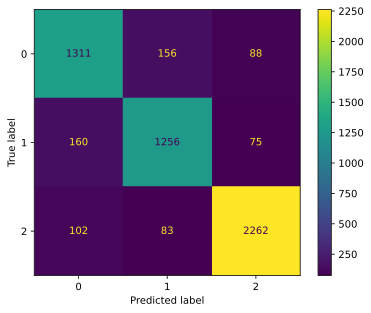

              precision    recall  f1-score   support

           0     0.8334    0.8431    0.8382      1555
           1     0.8401    0.8424    0.8413      1491
           2     0.9328    0.9244    0.9286      2447

    accuracy                         0.8791      5493
   macro avg     0.8688    0.8700    0.8694      5493
weighted avg     0.8795    0.8791    0.8793      5493



In [137]:
fp_dt_noelo_report, fp_dt_noelo_results =\
    hp.class_model_eval_logreg(
        fp_dt_noelo, X_train_noelo, X_test_noelo, y_train, y_test,
        num_class=3, has_coeffs=False)

In [ ]:
hp.tree_feature_importance(fp_dt_noelo, X_train_noelo)

-----

#### Random Forest

In [ ]:
fp_rf = hp.train_default_rf_model(X_train, y_train)

In [ ]:
fp_rf_report, fp_rf_results =\
    hp.class_model_eval_logreg(
        fp_rf, X_train, X_test, y_train, y_test,
        num_class=3, has_coeffs=False)

In [ ]:
hp.rf_trees_and_forest_strength(fp_rf, X_train, X_test, y_train, y_test);

In [ ]:
hp.tree_feature_importance(fp_rf, X_train)

In [ ]:
len(fp_rf.estimators_) # 100

In [ ]:
# decision_tree_train_scores = []
# for sub_tree in fp_rf.estimators_:
#     decision_tree_train_scores.append(fp_rf.score(X_train_, y_train))
    
# print("Performance on fitted data:")
# print(f"Average Decision Tree: {np.mean(decision_tree_train_scores)}")
# print(f"Random Forest: {fp_rf.score(X_train_, y_train)}")

In [ ]:
# decision_tree_test_scores = []
# for sub_tree in random_forest.estimators_:
#     decision_tree_test_scores.append(sub_tree.score(X_test_, y_test))

# print("Performance on Test data:")
# print(f"Average Decision Tree: {np.mean(decision_tree_test_scores)}")
# print(f"Random Forest: {random_forest.score(X_test_, y_test)}")

-----

###### NoElo

In [149]:
X_train_noelo = X_train.drop(columns=['WhiteElo', 'BlackElo'])
X_test_noelo = X_test.drop(columns=['WhiteElo', 'BlackElo'])

In [150]:
fp_rf_noelo = hp.train_default_rf_model(X_train_noelo, y_train)

The accuracy score on the training data is: 1.0
The accuracy score on the testing data is: 0.9541234298197706


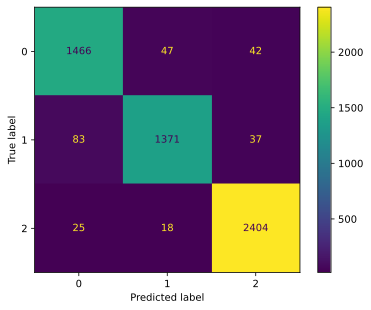

              precision    recall  f1-score   support

           0     0.9314    0.9428    0.9370      1555
           1     0.9547    0.9195    0.9368      1491
           2     0.9682    0.9824    0.9753      2447

    accuracy                         0.9541      5493
   macro avg     0.9514    0.9482    0.9497      5493
weighted avg     0.9541    0.9541    0.9540      5493



In [151]:
fp_rf_noelo_report, fp_rf_noelo_results =\
    hp.class_model_eval_logreg(
        fp_rf_noelo, X_train_noelo, X_test_noelo, y_train, y_test,
        num_class=3, has_coeffs=False)

In [152]:
hp.rf_trees_and_forest_strength(fp_rf_noelo, X_train_noelo, X_test_noelo, y_train, y_test);

Performance on fitted data:
Average Decision Tree: 0.9551351843422848
Random Forest: 1.0

Performance on Test data:
Average Decision Tree: 1.0
Random Forest: 0.9541234298197706


In [ ]:
hp.tree_feature_importance(fp_rf_noelo, X_train_noelo)

-----

-----

#### XGBoost

In [ ]:
fp_xgb = hp.train_default_xgboost_model(X_train, y_train)

In [ ]:
fp_xgb_report, fp_xgb_results =\
    hp.class_model_eval_logreg(
        fp_xgb, X_train, X_test, y_train, y_test,
        num_class=3, has_coeffs=False)

In [ ]:
hp.tree_feature_importance(fp_xgb, X_train)

----

###### NoElo

In [ ]:
X_train_noelo = X_train.drop(columns=['WhiteElo', 'BlackElo'])
X_test_noelo = X_test.drop(columns=['WhiteElo', 'BlackElo'])

In [ ]:
fp_xgb_noelo = hp.train_default_xgboost_model(X_train_noelo, y_train)

In [ ]:
fp_xgb_noelo_report, fp_xgb_noelo_results =\
    hp.class_model_eval_logreg(
        fp_xgb_noelo, X_train_noelo, X_test_noelo, y_train, y_test,
        num_class=3, has_coeffs=False)

In [ ]:
hp.tree_feature_importance(fp_xgb_noelo, X_train_noelo)

----

### With GridSearch

In [6]:
df_ffpm = joblib.load('E:/data/capstone/cleaned/df_for_fourth_pass_modelling.pkl')

In [7]:
df_ffpm.head()

,WhiteElo,WhiteRD,BlackElo,BlackRD,white_played_perc_top_move,black_played_perc_top_move,av_white_emt,av_black_emt,PlyCount,TimeControl_Base,TimeControl_Inc,ECO,WhiteIsComp,BlackIsComp,NoComp
0,2062,0.0,1946,0.0,0.481481,0.307692,6.43074,5.70123,53,300,0,D30,1,0,0
1,1952,0.0,2056,0.0,0.360000,0.400000,5.84124,5.30484,50,300,0,B50,0,1,0
2,2050,0.0,1958,0.0,0.565217,0.363636,4.65335,3.18377,45,300,0,C62,1,0,0
3,1745,0.0,2280,0.0,0.285714,0.619048,7.58914,15.22057,42,900,0,B13,0,1,0
4,1735,0.0,2279,0.0,0.388889,0.500000,12.53733,17.00678,36,900,0,B01,0,1,0


-----

#### X-y split, train-validation-test split, flatten y

In [8]:
X, y = hp.X_y_split_simple(df_ffpm)
y = hp.y_convert_to_ints(y)

Some games contain no cheaters


In [9]:
X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size=0.2,
                                                            random_state=22, stratify=y)

In [10]:
y_remainder, y_test = hp.flat_y(y_remainder, y_test)

In [11]:
# Print info on how the data has been split
print(f'The remainder set has {len(X_remainder)} data points.')
print(f'The test set has {len(X_test)} data points.')

# Print info on how the data has been split
print(f'The remainder set has {len(y_remainder)} data points.')
print(f'The test set has {len(y_test)} data points.')

The remainder set has 21970 data points.
The test set has 5493 data points.
The remainder set has 21970 data points.
The test set has 5493 data points.


----

#### Preparing pipeline

In [12]:
# column transformer with scaling
ct_scale = ColumnTransformer([
    ('normalize', StandardScaler(),
     ['WhiteElo', 'WhiteRD', 'BlackElo', 'BlackRD', 'white_played_perc_top_move',
                                     'black_played_perc_top_move', 'av_white_emt', 'av_black_emt', 'PlyCount',
                                     'TimeControl_Base', 'TimeControl_Inc']),
    ('OHE', OneHotEncoder(sparse=False, handle_unknown='ignore'), ['ECO'])], n_jobs=-1
    )

In [13]:
# column transformer without scaling
ct_unscale = ColumnTransformer([
    ('OHE', OneHotEncoder(sparse=False, handle_unknown='ignore'), ['ECO'])],
    n_jobs=-1,
    remainder='passthrough') # passthrough means that the other columns will be carried through

In [ ]:
# # testing
# ct_unscale.fit(X_remainder)
# ct_unscale.get_feature_names()[-12:]

# # ['OHE__x0_E99',
# #  'WhiteElo',
# #  'WhiteRD',
# #  'BlackElo',
# #  'BlackRD',
# #  'white_played_perc_top_move',
# #  'black_played_perc_top_move',
# #  'av_white_emt',
# #  'av_black_emt',
# #  'PlyCount',
# #  'TimeControl_Base',
# #  'TimeControl_Inc']

In [ ]:
# # testing
# ct_scale.fit(X_remainder)
# ct_scale.get_feature_names_out()

# # ['normalize__WhiteElo', 'normalize__WhiteRD', 'normalize__BlackElo',
# #        'normalize__BlackRD', 'normalize__white_played_perc_top_move',
# #        'normalize__black_played_perc_top_move', 'normalize__av_white_emt',
# #        'normalize__av_black_emt', 'normalize__PlyCount',
# #        'normalize__TimeControl_Base', 'normalize__TimeControl_Inc',
# #        'OHE__ECO_A00', 'OHE__ECO_A01', 'OHE__ECO_A02', 'OHE__ECO_A03',

In [16]:
cachedir_scale = mkdtemp()
cachedir_unscale = mkdtemp()

In [17]:
my_pipeline_scale = Pipeline(steps=[
    ('column_transform', ct_scale),
    ('model', LogisticRegression())],
    memory=cachedir_scale, verbose=True)

In [18]:
my_pipeline_unscale = Pipeline([
    ('column_transform', ct_unscale),
    ('model', DecisionTreeClassifier())],
    memory=cachedir_unscale, verbose=True)

-----

#### Logistic Regression

In [85]:
c_values = [.00001, .0001, .001, .1, 1, 10, 100, 1000, 10000]

logreg_param_grid = [

    {'column_transform': [ct_scale],
     'model__n_jobs': [-1], 'model__max_iter': [1000],
     'model__solver': ['lbfgs'], 'model__C': c_values, 'model__penalty': ['l2', 'none']},
    {'column_transform': [ct_scale],
     'model__random_state': [22], 'model__n_jobs': [-1], 'model__max_iter': [1000],
     'model__solver': ['liblinear'], 'model__C': c_values, 'model__penalty': ['l1', 'l2']}    
]

In [86]:
# # for testing that it  works

# c_values = [.1, 1, 10]

# logreg_param_grid = [
    
#     {'column_transform': [ct_scale],
#      'model': [LogisticRegression()], 'model__random_state':  [22],
#      'model__n_jobs': [-1], 'model__max_iter': [1000],
#      'model__solver': ['lbfgs'], 'model__C': c_values, 'model__penalty': ['l2', 'none']}
# ]

In [87]:
logreg_gs = GridSearchCV(
    estimator=my_pipeline_scale,
    param_grid=logreg_param_grid,
    cv=5, n_jobs=-1, verbose=10)

In [88]:
fitted_logreg_gs = logreg_gs.fit(X_remainder, y_remainder)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[Pipeline] ............. (step 2 of 2) Processing model, total=   4.7s


In [89]:
fitted_logreg_gs.best_params_

{'column_transform': ColumnTransformer(n_jobs=-1,
                   transformers=[('normalize', StandardScaler(),
                                  ['WhiteElo', 'WhiteRD', 'BlackElo', 'BlackRD',
                                   'white_played_perc_top_move',
                                   'black_played_perc_top_move', 'av_white_emt',
                                   'av_black_emt', 'PlyCount',
                                   'TimeControl_Base', 'TimeControl_Inc']),
                                 ('OHE',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  ['ECO'])]),
 'model__C': 1,
 'model__max_iter': 1000,
 'model__n_jobs': -1,
 'model__penalty': 'l2',
 'model__solver': 'lbfgs'}

In [90]:
# Print the accuracies
print(f"The best logistic regression's accuracy on the remainder set: {fitted_logreg_gs.score(X_remainder, y_remainder)}")
print(f"The best logistic regression's accuracy on the test set: {fitted_logreg_gs.score(X_test, y_test)}")

The best logistic regression's accuracy on the remainder set: 0.8941738734638143
The best logistic regression's accuracy on the test set: 0.8900418714727836


In [91]:
joblib.dump(fitted_logreg_gs.best_estimator_,
            'E:/data/capstone/pickled_models/gridsearch/best_logreg.pkl',
            compress=9)

['E:/data/capstone/pickled_models/gridsearch/best_logreg.pkl']

-----

#### Decision Tree

In [92]:
# for testing that it  works

dt_param_grid = [
    
    {'column_transform': [ct_unscale],
     'model': [DecisionTreeClassifier()],
     'model__criterion': ['gini', 'entropy'], 'model__splitter': ['best', 'random'],
     'model__max_depth': [None, 50, 100, 150], 'model__min_samples_split': [2, 4, 6],
     'model__min_samples_leaf': [1, 2, 4, 5], 'model__max_features': ['sqrt', 'auto', 'log2', None]
    }
]

In [93]:
dt_gs = GridSearchCV(
    my_pipeline_unscale,
    param_grid=dt_param_grid,
    cv=5, n_jobs=-1, verbose=10)

In [94]:
fitted_dt_gs = dt_gs.fit(X_remainder, y_remainder)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.9s


In [95]:
fitted_dt_gs.best_estimator_

Pipeline(memory='C:\\Users\\Emanuel\\AppData\\Local\\Temp\\tmp0drc9493',
         steps=[('column_transform',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['ECO'])])),
                ('model', DecisionTreeClassifier(max_depth=50))],
         verbose=True)

In [96]:
fitted_dt_gs.best_params_

{'column_transform': ColumnTransformer(n_jobs=-1, remainder='passthrough',
                   transformers=[('OHE',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  ['ECO'])]),
 'model': DecisionTreeClassifier(max_depth=50),
 'model__criterion': 'gini',
 'model__max_depth': 50,
 'model__max_features': None,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__splitter': 'best'}

In [97]:
# Print the accuracies
print(f"The best decistion tree's accuracy on the remainder set: {fitted_dt_gs.score(X_remainder, y_remainder)}")
print(f"The best decistion tree's accuracy on the test set: {fitted_dt_gs.score(X_test, y_test)}")

The best decistion tree's accuracy on the remainder set: 1.0
The best decistion tree's accuracy on the test set: 0.9746950664482068


In [98]:
joblib.dump(fitted_dt_gs.best_estimator_,
            'E:/data/capstone/pickled_models/gridsearch/best_dt.pkl',
            compress=9)

['E:/data/capstone/pickled_models/gridsearch/best_dt.pkl']

-----

#### Random Forest

In [ ]:
# depends on what the best dt was

In [99]:
# for testing that it  works

rf_param_grid = [
    
    {'column_transform': [ct_unscale],
     'model': [RandomForestClassifier()],
     'model__n_estimators': [25, 50, 100], 'model__criterion': ['gini', 'entropy'],
     'model__max_depth': [None, 50, 100, 150], 'model__min_samples_split': [2, 4, 6],
     'model__min_samples_leaf': [1], 'model__max_features': ['sqrt']
    }
]

In [100]:
rf_gs = GridSearchCV(
    my_pipeline_unscale,
    param_grid=rf_param_grid,
    cv=5, n_jobs=-1, verbose=10)

In [101]:
fitted_rf_gs = rf_gs.fit(X_remainder, y_remainder)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[Pipeline] ............. (step 2 of 2) Processing model, total=   5.2s


In [102]:
fitted_rf_gs.best_estimator_

Pipeline(memory='C:\\Users\\Emanuel\\AppData\\Local\\Temp\\tmp0drc9493',
         steps=[('column_transform',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['ECO'])])),
                ('model',
                 RandomForestClassifier(max_depth=150, min_samples_split=4))],
         verbose=True)

In [103]:
fitted_rf_gs.best_params_

{'column_transform': ColumnTransformer(n_jobs=-1, remainder='passthrough',
                   transformers=[('OHE',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  ['ECO'])]),
 'model': RandomForestClassifier(max_depth=150, min_samples_split=4),
 'model__criterion': 'gini',
 'model__max_depth': 150,
 'model__max_features': 'sqrt',
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 4,
 'model__n_estimators': 100}

In [104]:
# Print the accuracies
print(f"The best decistion tree's accuracy on the remainder set: {fitted_rf_gs.score(X_remainder, y_remainder)}")
print(f"The best decistion tree's accuracy on the test set: {fitted_rf_gs.score(X_test, y_test)}")

The best decistion tree's accuracy on the remainder set: 0.999954483386436
The best decistion tree's accuracy on the test set: 0.9863462588749318


In [105]:
joblib.dump(fitted_rf_gs.best_estimator_,
            'E:/data/capstone/pickled_models/gridsearch/best_rf.pkl',
            compress=9)

['E:/data/capstone/pickled_models/gridsearch/best_rf.pkl']

-----

#### XGBoost

In [106]:
# for testing that it  works

xgb_param_grid = [
    
    {'column_transform': [ct_unscale],
     'model': [XGBClassifier()],
     'model__n_estimators': [100], 'model__learning_rate': [0.3, 0.8, 1.5], 'model__gamma': [0],
     'model__max_depth': [6], 'model__max_delta_step': [0, 1],
     'model__sampling_method': ['uniform', 'gradient_based'],
     'model__lambda': [1], 'model__verbosity': [1]
    }
]

In [107]:
xgb_gs = GridSearchCV(
    my_pipeline_unscale,
    param_grid=xgb_param_grid,
    cv=5, n_jobs=-1, verbose=10)

In [108]:
fitted_xgb_gs = xgb_gs.fit(X_remainder, y_remainder)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[Pipeline] ............. (step 2 of 2) Processing model, total=   8.8s


In [109]:
fitted_xgb_gs.best_estimator_

Pipeline(memory='C:\\Users\\Emanuel\\AppData\\Local\\Temp\\tmp0drc9493',
         steps=[('column_transform',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['ECO'])])),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsa...
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='', lambda=1,
                               learning_rate=0.3, max_bin=256,
                               max_cat_threshold=64, max_cat_to_onehot=4,
                               max_delta_step=0, max_depth=6, max_leaves=0,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1,
                               objective='multi:softprob', ...))],
         verbose=True)

In [110]:
fitted_xgb_gs.best_params_

{'column_transform': ColumnTransformer(n_jobs=-1, remainder='passthrough',
                   transformers=[('OHE',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  ['ECO'])]),
 'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, lambda=1, learning_rate=0.3,
               max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=0, max_depth=6, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_paral

In [111]:
# Print the accuracies
print(f"The best decistion tree's accuracy on the remainder set: {fitted_xgb_gs.score(X_remainder, y_remainder)}")
print(f"The best decistion tree's accuracy on the test set: {fitted_xgb_gs.score(X_test, y_test)}")

The best decistion tree's accuracy on the remainder set: 0.9994538006372325
The best decistion tree's accuracy on the test set: 0.9881667576916076


In [113]:
joblib.dump(fitted_xgb_gs.best_estimator_,
            'E:/data/capstone/pickled_models/gridsearch/best_xgbost.pkl',
            compress=9)

['E:/data/capstone/pickled_models/gridsearch/best_xgbost.pkl']

-----

-----

-----

## To do:

1. Make draft narrative 
6. What is the difference in average time per move for humans vs computers:
    + Is it very different in different time length of games?
8. Retrain models using the new features (incrementally? - retrain every time I put a new feature in maybe)
9. Do GridSearches for the models (except KNN)


12. Do cursory overview of original variables and their distributions, multicollinearities and correlation to the outcome


13. Do overview of engineered variables and their distributions, multicollinearities and correlation to the outcome
    + Proportion of moves matching the top recommendation
    + Average time per move


5. How many different types of titled players are there? (Maybe it's an indication as to why there seems to be a bimodal distribution.)
    + In both rated and unrated
    + In rated
    + In unrated


14. Classification models to use are LogReg, DT, RF, XGBoost (maybe KNN)


15. Compare the evaluation scores from Muninn and from Vostro


"For each new feature created, take some time to review their distributions. If not normal, (i.e. hopefully bimodal), can you gain insight into why not. The hope is that the variable shows a bimodal distribution for cheaters and non-cheaters. Also check how relevant the feature is likely to be for your model by plotting it against the target variable, and check for multicollinearity."

-----


1. What is the largest difference in elo between players in a match as well as across all games: {done for now - this is leading me to prioritise games where both players elos are within an absolute elo range rather than pick games where players are within a certain elo-distance; this is because by comparing the abs_elo_diff in rated hour_ CvH and rated HvH games it seems the mean, std, and max are quite comparable so the elo distance will not be used as a feature/for filtering.}
    + Titled games:
        - Rated {done}
        - Unrated
    + CvH games:
        - Rated {done}
        - Unrated
3. Play with the hue setting on the CvH distribution graphs to understand why there is a bimodal distribution (i.e. is it the timeformat [lightning, blitz, standard], is it the rated/unrated etc.) {the computer program name is a big contributor}
4. Do CvH checks on non-filtered dataframe: (computers can lose)
    + Put conditionals in the clean pickles on what steps to keep or discard {done}
    + What is the distribution of how many computers beat people? {done - 61% of computers win}
    + What is the elo distribution if I keep games where the computer loses?
2. Set up how to train DT, KNN and XGBoost
6. Because most games are between 3-5 minutes (HvH games), what are the implications of picking games from CvH that last much longer? {too much of a rabbit hole - out of scope of project}
7. How many games are there between 1600-2857? {done - there are 224224 total}
2. Remove elos and retrain: {done}
    + Remove both elos and retrain models 
13. Using the calculated evaluations, make new features
    + Proportion of moves matching the top recommendation {done}
    + Proportion of moves matching a top 3 recommendation
    + In cases where the top recommendation was significantly better than the other recommendations (quanitfy with some threshold), how often was that particular move chosen?

-----

### Remove elos and retrain

--------

-------

## Getting Stockfish 

### Without chess module

In [ ]:
### Trying without using chess module:

# # df with event info to separate rated and unrated

# df_2022_2018_CvH_distinv = joblib.load(
#     './data/preprocessed/2022_2018_CvH_distinv_withevent.pkl')



# # starting with multi-pv, then do single-pv, 

# # Muninn has 8 cores => set threads to 4
# # Vostro has ...

# sf_ = Stockfish(path='./stockfish_15_win_x64_ssse/stockfish_15_x64_ssse.exe',
#         depth=20,
#         parameters={
#             "Threads": 7,
#             "Hash": 4096,
#             "MultiPV": 1,
#             "Skill Level": 20        
            
#             }
#         )

# # sf_ = Stockfish(path='./stockfish_15_win_x64_ssse/stockfish_15_x64_ssse.exe',
# #         depth=20,
# #         parameters={
# #             "Threads": 1,
# #             "Hash": 1024,
# #             "MultiPV": 5,
# #             "Skill Level": 20        
            
# #             }
# #         )

# # sf_ = Stockfish(path='./stockfish_15_win_x64_ssse/stockfish_15_x64_ssse.exe',
# #         depth=5,
# #         parameters={
# #             "Threads": 4,
# #             "Hash": 1024,
# #             "MultiPV": 1,
# #             "Skill Level": 20        
            
# #             }
# #         )

# # sf.update_engine_parameters()

# # chess.engine.SimpleEngine.popen_uci()

# eval_ = sf_.get_evaluation()
# eval_

# # eval_5 = sf_.get_evaluation()
# # eval_5 # {'type': 'cp', 'value': 19}

# best_move_timed = sf_.get_best_move_time()
# best_move_timed
# # Time for stockfish to determine best move in milliseconds (int)

# # best_move_timed_5 = sf_.get_best_move_time()
# # best_move_timed_5 # 'd2d4'
# # # Time for stockfish to determine best move in milliseconds (int)

# best_move_ = sf_.get_best_move()
# best_move_

# # best_move_5 = sf_.get_best_move()
# # best_move_5 # 'c2c4'

# top_moves_ = sf_.get_top_moves()
# top_moves_

# # top_moves_5 = sf_.get_top_moves()
# # top_moves_5
# # [{'Move': 'e2e4', 'Centipawn': 50, 'Mate': None},
# #  {'Move': 'g1f3', 'Centipawn': 50, 'Mate': None},
# #  {'Move': 'd2d4', 'Centipawn': 45, 'Mate': None},
# #  {'Move': 'c2c4', 'Centipawn': 34, 'Mate': None},
# #  {'Move': 'g2g3', 'Centipawn': 21, 'Mate': None}]

# # sf_.get_fen_position()
# # sf_.get_parameters()
# # sf_.info;

# display(type(eval_)) # dict
# display(type(best_move_timed)) # str
# display(type(best_move_)) # str
# display(type(top_moves_)) # list





# ----

# # sf_pv1 = Stockfish(path='./stockfish_15_win_x64_ssse/stockfish_15_x64_ssse.exe',
# #         depth=20,
# #         parameters={
# #             "Threads": 4,
# #             "Hash": 4096,
# #             "MultiPV": 1,
# #             "Skill Level": 20        
            
# #             }
# #         )

# # sf_pv1.get_best_move()

# # sf_pv1.get_top_moves()

# # sf_pv1.get_evaluation()

# # sf_pv1.info;

# # sf_pv1.make_moves_from_current_position()

# # As far as I know here on lichess it is pure mathematics:

# # inacc. = 0.5-1 deviation (EngineProposal-Your move)
# # mistake = 1-2 deviation
# # blunder > 2 deviation

# # (you'll find the exact values somewhere in the forum or the FAQ)

# # sf_pv1.

# -----

# sample = joblib.load('./data/raw/pickles/2018_CvH.pkl')

# sample.head(1)

# zipped_games_moves = zip(sample.moves)

# next(zipped_games_moves)[0][0]

# type(next(zipped_games_moves)[0]) # list

# next(zipped_games_moves)[0]

# next_game = next(zipped_games_moves)[0]

# next_game

# next_game[0]

# sf_.set_position()

# board=chess.Board()

# test__ = board.push_san(next_game[0])

# test__.uci()

# sf_.make_moves_from_current_position([test__.uci()])

# sf_.get_fen_position()

# top_moves_ = sf_.get_top_moves()
# top_moves_



# # For each game, 

# # # For each position,

# # # # Get the best 5 moves as a list, append to a list 

# # # Loop for moves in a single game
# # evaluations_ = []
# # sf_.set_position()
# # board=chess.Board()
# # for move in next_game:
# #     evalution_ = sf_.get_top_moves()
# #     move_ = board.push_san(move)
# #     sf_.make_moves_from_current_position([move_])
    
# #     evaluations_.append(evalution_)
    
    

# def get_evaluations(game):
#     # Loop for moves in a single game
#     evaluations_ = []
#     sf_.set_position()
#     board=chess.Board()
#     for move in game:
#         evalution_ = sf_.get_top_moves()
#         move_ = board.push_san(move)
#         sf_.make_moves_from_current_position([move_])

#         evaluations_.append(evalution_)
#     return evaluations_
    
    

# evaluations_test = get_evaluations(next_game)

# evaluations_test;

# # type(evaluations_test) # list

# # len(evaluations_test) # 19

# # len(next_game) # 19

# # sys.getsizeof(evaluations_) # 248

# # sys.getsizeof(evaluations_test) # 248

# # sys.getsizeof(next_game) # 216

# # sys.getsizeof(df_2022_2018_CvH_distinv) # 290903604

# # sys.getsizeof(df_2022_2018_CvH_distinv.moves) # 106755928

# # sys.getsizeof(np.uint8(0)) # 25

# # sys.getsizeof(np.int8(0)) # 25

# # sys.getsizeof(1) # 25

# testing = [get_evaluations(game[0]) for game in zip(sample.iloc[0:10].moves)]

# len(testing) # 10

# sys.getsizeof(testing) #184

# sys.getsizeof(testing[0])



# zipped_games_moves = zip(sample.moves)

# next(zipped_games_moves)[0]



# -----

# sf_ = Stockfish(path='./stockfish_15_win_x64_ssse/stockfish_15_x64_ssse.exe',
#         depth=20,
#         parameters={
#             "Threads": 7,
#             "Hash": 4096,
#             "MultiPV": 1,
#             "Skill Level": 20        
            
#             }
#         )

# def get_evaluations(game):
#     # Loop for moves in a single game
#     evaluations_ = []
#     sf_.set_position()
#     board=chess.Board()
#     for move in game:
#         evalution_ = sf_.get_top_moves()
#         move_ = board.push_san(move)
#         sf_.make_moves_from_current_position([move_])

#         evaluations_.append(evalution_)
#     return evaluations_
    
    

# def get_all_evaluations(df):
#     list_of_all_evaluations = [
#         get_evaluations(game[0]) for game in zip(df.moves)
#     ]
#     return list_of_all_evaluations

# # sys.getsizeof(df_2022_2018_CvH_distinv) # 290903604

# # sys.getsizeof(df_2022_2018_CvH_distinv.moves) # 106755928





# df_2021_2017_titled_distinv = joblib.load(
#     './data/preprocessed/2021_2017_titled_distinv.pkl')

# # sys.getsizeof(df_2021_2017_titled_distinv) # 163583172

# list_2021_2017_titled_distinv_evaluations = get_all_evaluations(df_2021_2017_titled_distinv)

# joblib.dump(list_2021_2017_titled_distinv_evaluations,
#            '~/Desktop/data/capstone/preprocessed/titled_evaluations.pkl',
#            compress=9)





# df_2022_2018_CvH_distinv = joblib.load('./data/preprocessed/2022_2018_CvH_distinv_withevent.pkl')

# # sys.getsizeof(df_2022_2018_HvH) # 138398944

# list_df_2022_2018_CvH_distinv_evaluations = get_all_evaluations(df_2022_2018_CvH_distinv)

# joblib.dump(list_df_2022_2018_CvH_distinv_evaluations,
#            '~/Desktop/data/capstone/preprocessed/2022_2018_CvH_distinv_evaluations.pkl',
#            compress=9)

# ----

# nums=[1,2,3]
# i_nums=iter(nums)

# while True:
#     try:
#         item=next(i_nums)
#         print(item)
#     except StopIteration:
#         break







----

### With chess module

In [ ]:
# path_Muninn='C:/Users/Emanuel/Desktop/data/capstone/preprocessed/evaluations/log.txt'
# path_Vostro='C:/Users/MaNiL/Desktop/data/capstone/preprocessed/evaluations/log.txt'

In [ ]:
# ## Muninn

# engine = chess.engine.SimpleEngine.popen_uci('./stockfish_15_win_x64_ssse/stockfish_15_x64_ssse.exe')

# engine.configure({"Hash": 4096})

# engine.configure({"Threads": 8})

# # engine.configure({"MultiPV": 5})

# engine.configure({"Skill level": 20})

# engine.configure({"Debug Log File": \
#                   f'{path_Muninn}'})

# engine.configure({"Move Overhead": 100})

# engine.configure({"Slow Mover": 20})

# limit = chess.engine.Limit(time=0.1, depth=25)

In [ ]:
# ## Vostro

# engine = chess.engine.SimpleEngine.popen_uci('./stockfish_15_win_x64_ssse/stockfish_15_x64_ssse.exe')

# engine.configure({"Hash": 1024})

# engine.configure({"Threads": 14})

# # engine.configure({"MultiPV": 5})

# engine.configure({"Skill level": 20})

# engine.configure({"Debug Log File": \
#                   f'{path_Vostro}'})

# engine.configure({"Move Overhead": 100})

# engine.configure({"Slow Mover": 20})

# limit = chess.engine.Limit(time=0.1, depth=25)

In [ ]:
# def evaluate_game(game):
#     # Loop for moves in a single game
#     evaluations_ = []
#     board=chess.Board()
#     for move in game:
#         evalution_ = engine.analyse(board, limit, multipv='5')
#         board.push_san(move)

#         evaluations_.append(evalution_)
    
    
#     return evaluations_

In [ ]:
# def evaluate_games(df, save_rate=1000, path='./'): # risky to use function on many games in case something goes wrong
#     list_of_evaluations = []
#     game_count = 0
    
#     for game in zip(df.moves):    
#         try:
#             game_eval_ = evaluate_game(game[0])
#             list_of_evaluations.append(game_eval_)

#             game_count+=1

#             if game_count%save_rate==0:
#                 print(f'{game_count} games completed\nSaving now...')
#                 joblib.dump(list_of_evaluations, 
#                             f'{path}{game_count}_.pkl',
#                            compress=3)
#                 t=time.localtime()[0:6]
#                 print(f'Saved at {t[0]}/{t[1]}/{t[2]} {t[3]}:{t[4]}:{t[5]}')
#             elif game_count%100==0:
#                 print(f'{game_count}')
#                 t=time.localtime()[0:6]
#                 print(f'At {t[0]}/{t[1]}/{t[2]} {t[3]}:{t[4]}:{t[5]}')
#             else:
#                 pass
    
#         except KeyboardInterrupt:
#             print('Keyboard Interrupt')
#             print(f'{game_count}')
#             return list_of_evaluations
# #             break
    
#         except:
#             list_of_evaluations.append(['Error occured'])

#             game_count+=1        

#             print(f'Error occured on game {game_count}')
        
#     return list_of_evaluations

In [ ]:
# ## Evaluating multiple games, starting at 0, with try-except
# df_=

# list_of_evaluations = []
# game_count = 0
# # path='C:/Users/Emanuel/Desktop/data/capstone/preprocessed/evaluations/'
# path='C:/Users/MaNiL/Desktop/data/capstone/preprocessed/evaluations/log.txt'
# for game in zip(df_.moves):
#     try:
#         game_eval_ = evaluate_game(game[0])
#         list_of_evaluations.append(game_eval_)

#         game_count+=1

#         if game_count%1000==0:
#             print(f'{game_count} games completed\nSaving now...')
#             joblib.dump(list_of_evaluations, 
#                         f'{path}{game_count}_.pkl',
#                        compress=3)
#             t=time.localtime()[0:6]
#             print(f'Saved at {t[0]}/{t[1]}/{t[2]} {t[3]}:{t[4]}:{t[5]}')
#         elif game_count%100==0:
#             print(f'{game_count}')
#             t=time.localtime()[0:6]
#             print(f'At {t[0]}/{t[1]}/{t[2]} {t[3]}:{t[4]}:{t[5]}')
#         else:
#             pass
        
#     except KeyboardInterrupt:
#         print('Keyboard Interrupt')
#         print(f'{game_count}')
#         break
        
#     except:
#         list_of_evaluations.append(['Error occured'])
                
#         game_count+=1
        
#         print(f'Error occured on game {game_count}')

-------

Testing for comparison between Muninn and Vostro

In [ ]:
# titled test

In [ ]:
# df_for_titled=joblib.load('./data/preprocessed/evaluations/titled/2021_2017_titled_distinv_allmoves.pkl')
# comparison_list=joblib.load('./data/preprocessed/evaluations/titled/6000_.pkl')

In [ ]:
# ## Evaluating multiple games, starting at 0, with try-except
# df_=df_for_titled

# list_of_evaluations = []
# game_count = 0
# # path='C:/Users/Emanuel/Desktop/data/capstone/preprocessed/evaluations/'
# path='C:/Users/MaNiL/Desktop/data/capstone/preprocessed/evaluations/'
# for game in zip(df_.moves):
#     try:
#         game_eval_ = evaluate_game(game[0])
#         list_of_evaluations.append(game_eval_)

#         game_count+=1

#         if game_count%1000==0:
#             print(f'{game_count} games completed\nSaving now...')
#             joblib.dump(list_of_evaluations, 
#                         f'{path}{game_count}_.pkl',
#                        compress=3)
#             t=time.localtime()[0:6]
#             print(f'Saved at {t[0]}/{t[1]}/{t[2]} {t[3]}:{t[4]}:{t[5]}')
#         elif game_count%100==0:
#             print(f'{game_count}')
#             t=time.localtime()[0:6]
#             print(f'At {t[0]}/{t[1]}/{t[2]} {t[3]}:{t[4]}:{t[5]}')
#         else:
#             pass
        
#     except KeyboardInterrupt:
#         print('Keyboard Interrupt')
#         print(f'{game_count}')
#         break
        
#     except:
#         list_of_evaluations.append(['Error occured'])
                
#         game_count+=1
        
#         print(f'Error occured on game {game_count}')

In [ ]:
# vostro_titled_test_list = list_of_evaluations.copy()

In [ ]:
# joblib.dump(vostro_titled_test_list,
#            f'./data/preprocessed/evaluations/titled/vostro_titled_test_list.pkl',
#            compress=9)

-------

## Functions to write:

In [ ]:
# Write function that compares ply count to 

In [ ]:
# Write function to check that the length of emt matches ply

In [ ]:
# Write function that checks all the emt have 'emt' in them and not 'clk'

In [ ]:
# Write function to check that none of the emt values are missing

-----

## Modeling

------

- For now, as I don't have engine evaluations, how do I go about making a classification when it isn't immediately binary i.e. 3 options: white cheating, black cheating, no cheating. 

- Do all the games start from the starting position?
- Does the game being an otb or online game influence how likely a win/draw is? 
- Is there any noticeable difference in patterns across different elo categories?
- What is the distribution of elo? Across humans and computers? How do I take into account the same player and that their elo is changing over time? Do I treat each as independent? 
- What is the distribution of game length? Does it vary by elo? (Probably yes ?)
- What is the distribution of computer-ELO? Are there bots that are low elo? Could this be because people are able to 'set' the strength of the computer opponent? If so this could mess up predictions, think about whether or not they should be removed, maybe they can be kept as 'test-cases' of how well we can predict 'cheaters' who cheat at low-elo.

# Considerations:

Using ELO difference/metric as a feature in predicting expected outcome of game.
- Using opening played as a feature in predicting if cheater or not.
- Use an engine to evaluate sequences of chess moves played in a game to learn average centipawn loss/gain, the centipawn loss/gain for each move, the number of innacuracies, mistakes, blunders. 
- How many opening moves to eliminate?



- Lichess games offer 

# Notes from Data Skeptic:

- Humans tend to make little blunders all the time "oh I didn't notice this idea, luckily my position still holds".
- Computers tend to keep their options open, X was able to demonstrate that humans, if they see an attack, will try to play it and force an early crisis in the game.
- In aggregates of 100-200 moves, X believes you can then determine with confidence if someone was cheating.
- "Distance metric (of two probabilities?)" : "You can't just say deterministically what is the computer's move. It depends on many variables such as the depth of search, [pv or multi-pv], the identity of the computer program, even how much hash memory you've given it. There's a variation there (i.e. a probability distribution). The human being is a distribution, often fallable distribution, of options."
- Originally going to use 'fidelity' which is a distance measure between distributions, which often comes up in computational physics. A former student recommended the 'Yensen-Shannon divergence (?)' which would solve a problem of 'Koblak-Leibler (?)' divergence of being too hair trigger in the treatment of blunders but it lacked other properties which X needed. 
- Wound up doing something 'highly elementary': maps given analysis of positions in a game, and parameters denoting the strength and particulars of the human player, he maps each chess move to probabilities, as if he were painting that move on the faces of many sided dice. And then he treats the chess position as a roll of those dice, so for this player, there's a 49% chance of selecting Ng5, 27% for Qg4, and so on down the line. After that, he can tap into the very simple stats theory of Bernoulli distributions (rolls of dice, flips of coins), and not only project the expected mean number of agreements, but also the projected variance, from the Bernoulli distribution theory, and thereby project confidence intervals, and since he's estimating a sample mean, the CLT comes into play, so he's working with a normal distribution and can use a z-score framework for his statistical projections. 
- If there is a clear stand-out move (e.g. only one move that keeps you alive in the position) then not only will the computer find it, it is highly likely that the good human player will find it. Whereas, even if you have just 10 moves in a game, where each move there were 4 highly reasonable options, which X's model would assign probabilities say between 20-25% each, and you consistently select the option that shows as preferred in X's computer test (...something about Modulo and distribution), if you match the computer's preferred move for 10 or more moves in a row, that a mllion to one probability.
- Two modes of chess analysis with comp: multi-pv mode where comp has equal depth of search to all reasonable options in a position, single-pv is regular playing mode where computer focuses its resources on the move it thinks best and one or two competing moves. A lot of the art of practical computers playig against each others is how quickly can they prune away the sub-optimal moves. For his model, he needs to know the values of all the reasonalbe moves that the player might be considering, and the general landscape or shape of the position (either forcing or lots of options etc.).
- For the training set, he has 10,000 games of multi-pv data, he took those games wehre each player is at one of the century points in the chess rating; for each of the levels above 2000 (Expert) he exhaustively chose games where both players were within 10 or so of those century points, run those games and he has his training data for yay-rated players. He is then therefor able to relate his two main model parameters to strength on that elo scale. Supplementing this he has a vast amount of single-pv (basically every top rated game in the recorded history of chess - over 200,000 games total). 
- He also routinely screens about 80,000 games out of the world's top events every year (codified as screening mode - he can get a first look at the play and relate it to the distributions of tens of thousands of performances of players at all ranks to see how much of an apparent outlier it is. 
- About a surprise winner: when he ran the screening test the player was on the edge of the red zone, but when he ran the full test based on the training data (multi-pv mode) it gave a z-score under 1.5 (the minimum was 2 for any kind of statistical significance) meaning it was unlikely that the player was cheaitng (his GM opponent was over-eager in trying to win and ended up losing). 
- He talks a little about how the arbiters, given their chess domain knowledge, likely made the right decision as they would have been able to see the situation on the ground (i.e. seen the critical positions, how the GM was winning, then made a mistake etc.). 
- Up until about 2+ years ago, the highest z-score he got in cases he was involved in was about 3.5, which corresponds to 4,300-to-1 odds against a Null hypothesis. Although very important, what it really means is that's the incidence of such a deviation occuring naturally among non-cheating players. Every week there are more than 1000 players taking part in tournaments around the globe, significant enough tto be aggregated on 'the week in chess'/'the weekend chess' by Mike 'Crowder'(?). You have to be aware of how your sample was selected or if there were any other factors which brought it to your attention apart from people going over the games with computers and noting a high correspondence. He believes that there has to be independent evidence. 
- [Section talking about comparing the quality of moves in a player's games in a tournament where there were known to be transmissions and expected-transmissionless games and how the differnce in quality of moves was about 3200 compared to 2550, so this was another indicator that the player was cheating.]
- Up until Jan 2013 he did not get any z-scores above 3.5, but then suddenly z-scores above 5 (even closer to 6) ...

# Appendix:

## Figuring out how to get emt:

In [ ]:
pgn = open("data/raw_data/2022/ficsgamesdb_search_262781.pgn")
game = chess.pgn.read_game(pgn)

In [ ]:
print(game)

%emt refers to the time used on a move. %clk refers to actual clock time. 

From the pgn we can see time spent per move. 

In [ ]:
type(game)

In [ ]:
game.mainline()

In [ ]:
game.board().san(game.variation(0).move)

In [ ]:
game.headers

In [ ]:
game.mainline()

In [ ]:
for node in game.mainline():
    print(node.move, node.emt(), node.clock())
    print(node.comment)

In [ ]:
help(game)

In [ ]:
# seems like the emt is in the game.comment

In [ ]:
game.variation(0).comment

In [ ]:
teste_ = pd.read_json("data/raw_data/json/2017/ficsgamesdb_search_262781.json")

In [ ]:
teste_.moves

In [ ]:
teste_.loc[0];

In [ ]:
teste_.columns

## Making df column and dtype helper:

In [ ]:
df.columns

In [ ]:
columns = list(df.columns)
columns

In [ ]:
list(df.dtypes);

In [ ]:
df.dtypes.reset_index().head()

In [ ]:
df.dtypes.reset_index().loc[:,0]

In [ ]:
df.WhiteElo.dtype == np.int64

In [ ]:
df.WhiteElo.dtype == 'int64'

In [ ]:
df.Event.dtype == 'O'

In [ ]:
df.Date.dtype == '<M8[ns]'

In [ ]:
df.Date.dtype == 'datetime64[ns]'

In [ ]:
#     def dtype_checker(df, schema):
#         wrong_dtypes = [[i, j] for i, j in schema.items() if i in df.columns and df[i].dtype!=j]
#         if len(wrong_dtypes)!=0:
#             for row in [f'Column {k[0]} does not match datatype {k[1]}' for k in wrong_dtypes]:
#                 print(row)
#             return False
#         else:
#             return True

In [ ]:
#     expected_schema = {
#         'Event': 'object',
#         'Site': 'object',
#         'Date': 'datetime64[ns]',
#         'Round': 'object',
#         'White': 'object',
#         'Black': 'object',
#         'Result': 'object',
#         'BlackClock': 'object',
#         'BlackElo':  'int64',
#         'BlackIsComp': 'object',
#         'BlackRD': 'float64',
#         'ECO': 'object',
#         'FICSGamesDBGameNo':  'int64',
#         'PlyCount':  'int64',
#         'Time': 'object',
#         'TimeControl': 'object',
#         'WhiteClock': 'object',
#         'WhiteElo':  'int64',
#         'WhiteRD': 'float64',
#         'emt': 'object',
#         'moves': 'object',
#         'WhiteIsComp': 'object'  
#     }

In [ ]:
# dtype_checker(df, expected_schema)

In [ ]:
# def schema_checker(df, cols):
#     missing_cols = [i for i in cols if i not in df.columns]
#     if len(missing_cols)!=0:
#         for col in [f'Column {i} not found' for i in missing_cols]:
#             print(col)
#         return False
#     else:
#         return True

In [ ]:
# schema_checker(df, expected_schema.keys())

In [ ]:
# df_wrong = df.copy().rename(columns={'BlackRD': 'Wrongs'})

In [ ]:
# schema_checker(df_wrong, expected_schema.keys())

## Making XIsComp helper:

In [ ]:
# def change_comp_columns(df):
#     ## make copy df

#     nocomp_df = df.copy()
    
#     ## check number of unique in blackiscomp and whiteiscomp (should be 2)
#     assert all([nocomp_df[x].nunique(dropna=False)==2 for x in ['WhiteIsComp', 'BlackIsComp']]), 'More than two unique values in a XIsComp column (including nan)'
    
#     ## check one of the unique values are 'Yes'
#     assert all(['Yes' in nocomp_df[x].unique() for x in ['WhiteIsComp', 'BlackIsComp']]), 'Missing "Yes" in one of the XIsComp column'

#     ## assign 1 and 0 to blackiscomp and whiteiscomp

#     nocomp_df['WhiteIsComp'] = np.where(nocomp_df['WhiteIsComp']=='Yes', np.int8(1), np.int8(0))
#     nocomp_df['BlackIsComp'] = np.where(nocomp_df['BlackIsComp']=='Yes', np.int8(1), np.int8(0))

#     ## make new 'nocomp' column which depends on blackiscomp==1 and whiteiscomp==1

#     nocomp_df['NoComp'] = np.where(zip(nocomp_df['WhiteIsComp'], nocomp_df['BlackIsComp'])==[0, 0], np.int8(1), np.int8(0))
    
#     return nocomp_df

In [ ]:
# nocomp_df_test = hp.change_comp_columns(df)

# # validating the shape is (2, 0) if there are only games with cheaters (i.e. XIsComp==1)
# nocomp_df_test[['BlackIsComp', 'WhiteIsComp', 'NoComp']].groupby(['BlackIsComp', 'WhiteIsComp', 'NoComp']).count()

# nocomp_df_test[['BlackIsComp', 'WhiteIsComp', 'NoComp']].groupby([
#     'BlackIsComp', 'WhiteIsComp', 'NoComp']).count().shape[0]; # 2


# # validating the shape is (3, 0) if there is at least one entry that is NoComp==1
# nocomp_df_test_2  = nocomp_df_test.copy()
# nocomp_df_test_2.loc[0,['BlackIsComp', 'WhiteIsComp', 'NoComp']] = [0, 0, 1]
# nocomp_df_test_2[['BlackIsComp', 'WhiteIsComp', 'NoComp']].iloc[0]
# nocomp_df_test_2[['BlackIsComp', 'WhiteIsComp', 'NoComp']].groupby(['BlackIsComp', 'WhiteIsComp', 'NoComp']).count()

# nocomp_df_test_2[['BlackIsComp', 'WhiteIsComp', 'NoComp']].groupby([
#     'BlackIsComp', 'WhiteIsComp', 'NoComp']).count().shape[0]; # 3

In [ ]:
# make 'nocomp' column:

## make copy df

nocomp_df = df.copy()

## check number of unique in blackiscomp and whiteiscomp (should be 2)

# white_comp_unique_num = nocomp_df.WhiteIsComp.nunique(dropna=False)
# black_comp_unique_num = nocomp_df.BlackIsComp.nunique(dropna=False)
# comp_unique_num = [nocomp_df[x].nunique(dropna=False) for x in ['WhiteIsComp', 'BlackIsComp']]
# print(comp_unique_num) # [2, 2]
# print(all(comp_unique_num))
# comp_unique_num_is2 = np.array([nocomp_df[x].nunique(dropna=False)==2 for x in ['WhiteIsComp', 'BlackIsComp']]).all()
# assert np.array([nocomp_df[x].nunique(dropna=False)==2 for x in ['WhiteIsComp', 'BlackIsComp']]).all()==True, 'More than two unique values in a XIsComp column (including nan)'
# print(comp_unique_num_is2)
comp_unique_num_is2 = all([nocomp_df[x].nunique(dropna=False)==2 for x in ['WhiteIsComp', 'BlackIsComp']])
# print(comp_unique_num_is2)

# bla = np.array([nocomp_df[x].nunique(dropna=False)==2 for x in ['WhiteIsComp', 'BlackIsComp']])
# bla[0]=False
# print(all(bla)) # False


## check one of the unique values are 'Yes'

has_yes_list = ['Yes' in nocomp_df[x].unique() for x in ['WhiteIsComp', 'BlackIsComp']]
# print(has_yes_list) # [True, True]
has_yes = all(has_yes_list)
# print(has_yes)

## assign 1 and 0 to blackiscomp and whiteiscomp

# nocomp_df['WhiteIsComp'] = nocomp_df['WhiteIsComp'].apply(lambda x: np.int8(1) if x=='Yes' else np.int8(0))
# nocomp_df['BlackIsComp'] = nocomp_df['BlackIsComp'].apply(lambda x: np.int8(1) if x=='Yes' else np.int8(0))

nocomp_df['WhiteIsComp'] = np.where(nocomp_df['WhiteIsComp']=='Yes', np.int8(1), np.int8(0))
nocomp_df['BlackIsComp'] = np.where(nocomp_df['BlackIsComp']=='Yes', np.int8(1), np.int8(0))


#---#

## make new 'nocomp' column which depends on blackiscomp==1 and whiteiscomp==1

# fastest is:
nocomp_df['NoComp'] = np.where(next(zip(nocomp_df['WhiteIsComp'], nocomp_df['BlackIsComp']))==(0, 0), 
                               np.int8(1),
                               np.int8(0))

# testing was done to compare speeds


In [ ]:
# compare speed of np.array(...).all() and all([...])

# all([...]) marginally faster

# # %%timeit # 1.58 ms ± 55.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
# nocomp_df = df.copy()
# comp_unique_num_is2 = np.array([nocomp_df[x].nunique(dropna=False)==2 for x in ['WhiteIsComp', 'BlackIsComp']]).all()
# comp_unique_num_is2

# # %%timeit # 1.51 ms ± 18.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
# nocomp_df = df.copy()
# comp_unique_num_is2 = all([nocomp_df[x].nunique(dropna=False)==2 for x in ['WhiteIsComp', 'BlackIsComp']])
# comp_unique_num_is2

In [ ]:
# Compare np.where and df.apply speed:

# # timing np.where
# nocomp_df = df.copy()
# nocomp_df['WhiteIsComp'] = np.where(nocomp_df['WhiteIsComp']=='Yes', np.int8(1), np.int8(0))
# nocomp_df['BlackIsComp'] = np.where(nocomp_df['BlackIsComp']=='Yes', np.int8(1), np.int8(0))


#-----#

# any([np.int8(0), np.int8(1)]) # True

# zip(nocomp_df['WhiteIsComp'], nocomp_df['BlackIsComp']) # <zip at 0x2ac85d24c40>

# for element in zip(nocomp_df['WhiteIsComp'], nocomp_df['BlackIsComp']):
#     print(element)

# [np.int8(0) if any(element) else np.int8(1) for element in zip(nocomp_df['WhiteIsComp'], nocomp_df['BlackIsComp'])]

# pd.Series([np.int8(1) if all(element) else np.int8(0) for element in zip(nocomp_df['WhiteIsComp'], nocomp_df['BlackIsComp'])])

# nocomp_df['NoComp'] = [np.int8(0) if any(element) else np.int8(1) for element in zip(nocomp_df['WhiteIsComp'], nocomp_df['BlackIsComp'])]

# nocomp_df['NoComp'].any() # False

# nocomp_df['NoComp'] = np.where(zip(nocomp_df['WhiteIsComp'], nocomp_df['BlackIsComp'])==[0, 0], np.int8(1), np.int8(0))
# np.int8(0)==0 # True
# np.int8(1)==1 # True

# nocomp_df['NoComp'].any() # False 

# nocomp_df['WhiteIsComp']==1 # Series of True and False

#------#

# # %%timeit # 54.6 ms ± 420 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
# # timing df.apply()
# nocomp_df = df.copy()
# nocomp_df['WhiteIsComp'] = nocomp_df['WhiteIsComp'].apply(lambda x: np.int8(1) if x=='Yes' else np.int8(0))
# nocomp_df['BlackIsComp'] = nocomp_df['BlackIsComp'].apply(lambda x: np.int8(1) if x=='Yes' else np.int8(0))

In [ ]:
# # Comparing 3 methods for making NoComp column (on Muninn):

nocomp_df = df_2018_test.copy()
nocomp_df['WhiteIsComp'] = np.where(nocomp_df['WhiteIsComp']=='Yes', np.int8(1), np.int8(0))
nocomp_df['BlackIsComp'] = np.where(nocomp_df['BlackIsComp']=='Yes', np.int8(1), np.int8(0))

# #--#

In [ ]:
# # %%timeit # 156 ms ± 517 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

# # .apply()

# nocomp_df['NoComp'] = nocomp_df.apply(lambda x: np.int8(1) if (x['WhiteIsComp']!=1 and \
#                                                                x['BlackIsComp']!=1) else np.int8(0), axis=1)

In [ ]:
# apply_ = nocomp_df['NoComp'].copy()

In [ ]:
# apply_;

In [ ]:
#--#

In [ ]:
# nocomp_df['NoComp'][0:5] # looks good

In [ ]:
# # %%timeit # 49.5 ms ± 164 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

# # list comprehension using 'for element in zip'

# nocomp_df['NoComp'] = [np.int8(1) if element==(0, 0) else np.int8(0) for element in \
#                        zip(nocomp_df['WhiteIsComp'], nocomp_df['BlackIsComp'])]

# # nocomp_df['NoComp'] = [np.int8(0) if any(element) else np.int8(1) for element in \
# #                        zip(nocomp_df['WhiteIsComp'], nocomp_df['BlackIsComp'])]

# # [element for element in \
# #  zip(nocomp_df['WhiteIsComp'], nocomp_df['BlackIsComp'])]

In [ ]:
# listcompforzip_ = nocomp_df['NoComp'].copy()

In [ ]:
# listcompforzip_;

In [ ]:
#--#

In [ ]:
# nocomp_df['NoComp'] # looks good

In [ ]:
# # %%timeit # 84.8 µs ± 689 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)

# # np.where(next(zip()))==(0, 0) 


# # DON'T WORK:
# # nocomp_df['NoComp'] = np.where(list(zip(nocomp_df['WhiteIsComp'], nocomp_df['BlackIsComp']))==(0, 0), # [0, 0] doesn't work
# #                                np.int8(1),
# #                                np.int8(0)) # doesn't work

# # nocomp_df['NoComp'] = np.where(np.array(list(zip(nocomp_df['WhiteIsComp'], nocomp_df['BlackIsComp']))).flat==[0, 0], 
# #                                np.int8(1),
# #                                np.int8(0))


# # DOES WORK:
# nocomp_df['NoComp'] = np.where(next(zip(nocomp_df['WhiteIsComp'], nocomp_df['BlackIsComp']))==(0, 0), 
#                                np.int8(1),
#                                np.int8(0))

# #-#

# # both of: 
# # # np.where(zip(nocomp_df['WhiteIsComp'], nocomp_df['BlackIsComp'])==(0, 0), 1, 0)

# # # np.where(zip(nocomp_df['WhiteIsComp'], nocomp_df['BlackIsComp'])==[0, 0], 1, 0)
# # return array(0), this is why 'list' is used


In [ ]:
# len(list(zip(*(zip(nocomp_df['WhiteIsComp'], nocomp_df['BlackIsComp'])))))
# list(zip(*(zip(nocomp_df['WhiteIsComp'], nocomp_df['BlackIsComp']))))
# list(zip(nocomp_df['WhiteIsComp'], nocomp_df['BlackIsComp']))
# #==(0, 0)
# np.array(list(zip(nocomp_df['WhiteIsComp'], nocomp_df['BlackIsComp'])), ndmin=1).shape

# next(zip(nocomp_df['WhiteIsComp'], nocomp_df['BlackIsComp']))

In [ ]:
# list(zip(nocomp_df['WhiteIsComp'], nocomp_df['BlackIsComp']))
# [(0, 0),
#  (0, 0),
#  (0, 0),
#  (0, 0),
#  (0, 0),
#  (0, 0),....

In [ ]:
# list(zip(nocomp_df['WhiteIsComp'], nocomp_df['BlackIsComp']))[0]==(0, 0)

In [ ]:
# bla = zip(nocomp_df['WhiteIsComp'], nocomp_df['BlackIsComp'])
# next(bla)
# next(bla)==(0, 0) # True

In [ ]:
# wherenextzip_ = nocomp_df['NoComp'].copy()

In [ ]:
wherenextzip_;

In [ ]:
#--#

In [ ]:
# nocomp_df['NoComp'] # looks good

In [ ]:
# # %%timeit # 309 µs ± 3.63 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

# # #np.where(df[['a', 'b']].values==[0, 0])

# nocomp_df['NoComp'] = np.where((nocomp_df['WhiteIsComp']==0)*(nocomp_df['BlackIsComp']==0),
#                                np.int8(1), np.int8(0))

In [ ]:
# wheredf_ = nocomp_df['NoComp'].copy()

In [ ]:
wheredf_;

In [ ]:
#--#

In [ ]:
# nocomp_df['NoComp'] # looks good

In [ ]:
#--#

In [ ]:
all(wheredf_==wherenextzip_) # True

In [ ]:
all(listcompforzip_==wherenextzip_) # True

In [ ]:
all(apply_==wherenextzip_) # True

In [ ]:
#--#

In [ ]:
#------#

In [ ]:
# trying to do both columns in one apply:

# nocomp_df = df.copy()
# nocomp_df[['WhiteIsComp', 'BlackIsComp']] = nocomp_df[['WhiteIsComp', 'BlackIsComp']].apply(lambda x: [np.int8(1) if x.loc[y]=='Yes' else np.int8(0) for y in ['WhiteIsComp', 'BlackIsComp']], axis=1)

# nocomp_df[['WhiteIsComp', 'BlackIsComp']] = nocomp_df.apply(lambda x: [np.int8(1) if x[y]=='Yes' else np.int8(0) for y in ['WhiteIsComp', 'BlackIsComp']], axis=1)

In [ ]:
# nocomp_df = df.copy()
# nocomp_df[['WhiteIsComp', 'BlackIsComp']] = nocomp_df[['WhiteIsComp', 'BlackIsComp']].apply(
#     lambda x: [np.int8(1) for y in ['WhiteIsComp', 'BlackIsComp'] if x.loc[y]=='Yes' else np.int8(0)], axis=1)

In [ ]:
# nocomp_df = df.copy()
# nocomp_df[['WhiteIsComp', 'BlackIsComp']] = nocomp_df[['WhiteIsComp', 'BlackIsComp']].apply(
#     lambda x: np.int8(1) if x=='Yes' else np.int8(0),
#     axis=1)

In [ ]:
# nocomp_df = df.copy()
# nocomp_df[['WhiteIsComp', 'BlackIsComp']] = [row_value.apply(lambda x: np.int8(1) if x=='Yes' else np.int8(0)) for ]



# nocomp_df[['WhiteIsComp', 'BlackIsComp']].apply(
#     lambda x: np.int8(1) if x=='Yes' else np.int8(0),
#     axis=1)

In [ ]:
# type(df.loc[0]) # Series
# display(df.loc[0])

In [ ]:
# row = df.loc[0]
# row.loc['ECO']

In [ ]:
# test = row[['BlackIsComp', 'WhiteIsComp']].copy()
# type(test) # series

In [ ]:
# row[['BlackIsComp', 'WhiteIsComp']] = ['yes', 'no'] # SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame

In [ ]:
# row[['BlackIsComp', 'WhiteIsComp']] 

## Editing Chess NaN Checker helper:

In [ ]:
# def chess_nan_checker(df, list_of_cols=['BlackIsComp', 'WhiteIsComp']): 
#     '''
#     checks for nan values in the dataframe

#     Args:
#         df (DataFrame): Pandas dataframe
#         list_of_cols (List): List of strings indicating what columns to ignore

#     Returns:
#         summary (String): returns a summary of nan values
#     '''

#     assert all([col in df.columns for col in list_of_cols]), f'Passed dataframe does not contain {list_of_cols}'   
    
#     # are there any nan values?
#     any_nan = all(
#         df[[x for x in df.columns if x not in list_of_cols]].notna()
#     ) # returns True if all values are not NaN
#     if any_nan == True:
#         return print(f"This dataframe has 0 NaN values in columns: {list(df[[x for x in df.columns if x not in list_of_cols]].columns)}")
        
#     # how many?
#     nan_series = df.isna().sum()
#     nan_num = nan_series.sum()

#     # which variables do they come from

#     # list_of_nan_column_loc = \
#     #     [ [df[column], df[column].isna().sum()] for \
#     #         column in df.columns ]

#     nan_cols = list(nan_series[nan_series > 0].index)

#     # any variables with more than 50% of data missing?
#     big_nan_cols = list(nan_series[nan_series/len(df) > 0.5])
    
#     #summary can be all the info about nans
#     summary = f'This dataframe has {nan_num} NaN values'

#     if len(nan_cols) > 0:
#         summary += f'\nThe NaN values come from: {nan_cols}'

#     if len(big_nan_cols) > 0:
#         summary += f'\nMore than 50% of the data is missing from: {big_nan_cols}'

#     return print(summary)

In [ ]:
# Testing assertion error of nan_checker

# test_list_of_cols = df.copy()
# test_list_of_cols.drop(columns='BlackIsComp', inplace=True)

# list_of_cols = ['BlackIsComp', 'WhiteIsComp']

# assert all([col in test_list_of_cols.columns for col in list_of_cols]), f'Passed dataframe does not contain {list_of_cols}'

# any_nan = all(
#     df[[x for x in test_list_of_cols.columns if x not in list_of_cols]].notna()
# ) # returns True if all values are not NaN
# if any_nan == True:
# #     return 
#     print(f"This dataframe has 0 NaN values in columns: {list(test_list_of_cols[[x for x in df.columns if x not in list_of_cols]].columns)}")

## Figuring out how to get average time per ply (average emt) for each player helper:

In [ ]:
def get_white_emts(list_of_emts):
    '''
    Will receive a list of a games emt values
    '''
    
    white_emts = list_of_emts[::2]
    return white_emts

In [ ]:
def get_black_emts(list_of_emts):
    '''
    Will receive a list of a games emt values
    '''
    
    black_emts = list_of_emts[1::2]
    return black_emts

In [ ]:
def separate_all_white_and_black_emts(df):
    '''
    This will receive a dataframe with a column of emt_time (Note: this is not the same as emt, emt_time has only float values)
    This will output the dataframe with two new columns: white_emt and black_emt
    '''
    
    df[['white_emt', 'black_emt']]=[[get_white_emts(list_of_emts[0]), get_black_emts(list_of_emts[0])] for list_of_emts in zip(df.emt_time)]
    
    return df

In [ ]:
def separate_all_white_and_black_average_emts(df, rounded_dp=5):
    '''
    This will receive a dataframe with a column of emt_time (Note: this is not the same as emt, emt_time has only float values)
    This will output the dataframe with two new columns: av_white_emt and av_black_emt
    '''
    
    df[['av_white_emt', 'av_black_emt']]=[[np.round(np.mean(get_white_emts(list_of_emts[0])), rounded_dp), np.round(np.mean(get_black_emts(list_of_emts[0])), rounded_dp)] for list_of_emts in zip(df.emt_time)]
    
    return df

In [ ]:
# def get_white_emts(list_of_emts):
#     '''
#     Will receive a list of a games emt values
#     '''
    
#     white_emts = list_of_emts[::2]
#     return white_emts


# def get_black_emts(list_of_emts):
#     '''
#     Will receive a list of a games emt values
#     '''
    
#     black_emts = list_of_emts[1::2]
#     return black_emts


# def separate_all_white_and_black_emts(df):
#     '''
#     This will receive a dataframe with a column of emt_time (Note: this is not the same as emt, emt_time has only float values)
#     This will output the dataframe with two new columns: white_emt and black_emt
#     '''
    
#     df[['white_emt', 'black_emt']]=[[get_white_emts(list_of_emts[0]), get_black_emts(list_of_emts[0])] for list_of_emts in zip(df.emt_time)]
    
#     return df


# def separate_all_white_and_black_average_emts(df, rounded_dp=5):
#     '''
#     This will receive a dataframe with a column of emt_time (Note: this is not the same as emt, emt_time has only float values)
#     This will output the dataframe with two new columns: av_white_emt and av_black_emt
#     '''
    
#     df[['av_white_emt', 'av_black_emt']]=[[np.round(np.mean(get_white_emts(list_of_emts[0])), rounded_dp), np.round(np.mean(get_black_emts(list_of_emts[0])), rounded_dp)] for list_of_emts in zip(df.emt_time)]
    
#     return df

In [ ]:
# # %%timeit # 163 ms ± 1.79 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

# zeta_[['white_emts', 'black_emts']]=[
#     [get_white_emts(list_of_emts[0]), get_black_emts(list_of_emts[0])] for list_of_emts in zip(zeta_.emt_time)]

In [ ]:
# # %%timeit # 175 ms ± 44.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

# zeta_[['white_emts', 'black_emts']]=[
#     [get_white_emts(list_of_emts), get_black_emts(list_of_emts)] for list_of_emts in zeta_.emt_time]

------

## Checking PlyCount matches length of moves

In [ ]:
# Testing:
#--#

In [ ]:
# np.where(next(zip(...,...))) way: [from previous tinkering]
#
#
# nocomp_df['NoComp'] = np.where(next(zip(nocomp_df['WhiteIsComp'], nocomp_df['BlackIsComp']))==(0, 0), 
#                                np.int8(1),
#                                np.int8(0))
#
# but maybe it doesn't work here; how can I check if each part is equal to it's respective counterpart?
# by calling the 'next(..)' twice and indexing each one?
# ==> not possible as it only ever takes the first component of the zip

# need to know what the next(zip(...,...)) returns (i.e. what does indexing only once give? is it a list?)...
# ...done below

In [ ]:
# test_ = next(zip(df_2022_2018_CvH_distinv.moves, df_2022_2018_CvH_distinv.PlyCount))
# display(test_)
# display(test_[0]) 
# display(type(test_[0])) # list
# display(len(test_[0])) # 53
# display(test_[1]) #53
# display(type(test_[1])) # int

In [ ]:
# # sanity check of is the np.where(next(zip())) doing what I think it's doing?

# df_2022_2018_CvH_distinv['testing_method'] = np.where(next(zip(df_2022_2018_CvH_distinv['WhiteIsComp'],
#                                                                df_2022_2018_CvH_distinv['BlackIsComp']))==(0, 0),
#                                                       np.int8(1),
#                                                       np.int8(0))

# all(df_2022_2018_CvH_distinv['testing_method']==df_2022_2018_CvH_distinv['NoComp']) # True


# df_2022_2018_HvH.head(1)

# df_2022_2018_HvH['testing_method'] = np.where(next(zip(df_2022_2018_HvH['WhiteIsComp'],
#                                                                df_2022_2018_HvH['BlackIsComp']))==(0, 0),
#                                                       np.int8(1),
#                                                       np.int8(0))

# all(df_2022_2018_HvH['testing_method']==df_2022_2018_HvH['NoComp']) # True


# # Seems like it....

In [ ]:
# display([next(zip(df_2022_2018_CvH_distinv.moves, df_2022_2018_CvH_distinv.PlyCount))[0], 
#         next(zip(df_2022_2018_CvH_distinv.moves, df_2022_2018_CvH_distinv.PlyCount))[1]])

# display([len(next(zip(df_2022_2018_CvH_distinv.moves, df_2022_2018_CvH_distinv.PlyCount))[0]), 
#         next(zip(df_2022_2018_CvH_distinv.moves, df_2022_2018_CvH_distinv.PlyCount))[1]]) # [53, 53]

# df_2022_2018_CvH_distinv['testing_method'] = np.where(
#     len(next(zip(df_2022_2018_CvH_distinv.moves, df_2022_2018_CvH_distinv.PlyCount))[0])==\
#         next(zip(df_2022_2018_CvH_distinv.moves, df_2022_2018_CvH_distinv.PlyCount))[1],
#     len(next(zip(df_2022_2018_CvH_distinv.moves, df_2022_2018_CvH_distinv.PlyCount))[0]),
#     next(zip(df_2022_2018_CvH_distinv.moves, df_2022_2018_CvH_distinv.PlyCount))[1])
# # the above ends up returning a series of all 53, which is wrong

# df_2022_2018_CvH_distinv['testing_method'] = np.where(
#     len(next(zip(df_2022_2018_CvH_distinv.moves, df_2022_2018_CvH_distinv.PlyCount))[0])==\
#         next(zip(df_2022_2018_CvH_distinv.moves, df_2022_2018_CvH_distinv.PlyCount))[1], True, False)

# df_2022_2018_CvH_distinv['testing_method']

In [ ]:
# Conclusion of above is that it is not possible to compare length of moves and PlyCount in this way (i.e. 
# by calling next(zip(...,...))) multiple times

In [ ]:
#--#

In [ ]:
# list comprehension for element in zip() way: !fastest of these tested methods!
#
#
# all([len(row[0])==row[1] for row in zip(...,...)])


In [ ]:
# [row for row in zip(df_2022_2018_CvH_distinv.moves, df_2022_2018_CvH_distinv.PlyCount)]

In [ ]:
# df_2022_2018_CvH_distinv['testing_method'] = \
# [[len(row[0]), row[1]] for row in zip(df_2022_2018_CvH_distinv.moves, df_2022_2018_CvH_distinv.PlyCount)]

# df_2022_2018_CvH_distinv['testing_method'].head()

# # 0    [53, 53]
# # 1    [50, 50]
# # 2    [45, 45]
# # 3    [42, 42]
# # 4    [36, 36]

In [ ]:
# %%timeit # 69 ms ± 580 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

# all([len(row[0])==row[1] for row in zip(df_2022_2018_CvH_distinv.moves, df_2022_2018_CvH_distinv.PlyCount)]) # True

In [ ]:
#--#

In [ ]:
# list comprehension with:
#
# [len(df.iloc[index].moves)==df.iloc[index].PlyCount[0] for index in range(df.shape[0])]
#
# make sure that df.iloc[index] does in fact return the whole row ==> it does

In [ ]:
# type(df_2022_2018_CvH_distinv.iloc[0].moves) # list !!!
# len(df_2022_2018_CvH_distinv.iloc[0].moves) # 53
# df_2022_2018_CvH_distinv.iloc[0].PlyCount # 53

In [ ]:
# %%timeit # 42.2 s ± 266 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

# list comp method using index:

# ply_movelen_check_list = [len(df_2022_2018_CvH_distinv.iloc[index].moves)==\
#                           df_2022_2018_CvH_distinv.iloc[index].PlyCount for \
#                           index in range(df_2022_2018_CvH_distinv.shape[0])]

# all([len(df_2022_2018_CvH_distinv.iloc[index].moves)==\
#      df_2022_2018_CvH_distinv.iloc[index].PlyCount for \
#      index in range(df_2022_2018_CvH_distinv.shape[0])]) # True

In [ ]:
# all(ply_movelen_check_list) # True - all the PlyCounts do match the number of ply in moves

In [ ]:
#--#

----

## Next

-----